# Meta-analysis

Load in processed data and explore model fits via meta-analysis

In [2]:
### autoreload
%reload_ext autoreload
%autoreload 2

# custom
from calcification.analysis import analysis, analysis_utils, meta_regression
from calcification.utils import config
from calcification.plotting import analysis as analysis_plot
from calcification.plotting import plot_utils, climatology, plot_config
from calcification.processing import (
    climatology as climatology_processing,
    process,
)

# custom plotting
import matplotlib.pyplot as plt

In [24]:
# load extracted data (with effect sizes)
data_df, cg_df = process.process_extracted_calcification_data(
    fp=config.data_dir / "Orlando_data.xlsx",
)

local_climatology_df, global_future_anomaly_df, global_anomaly_df = (
    process.process_climatology_data(
        data_df,
        config.climatology_data_dir
        / "ph_scenarios_output_table_site_locations_mod.csv",
        config.climatology_data_dir
        / "sst_scenarios_output_table_site_locations_mod.csv",
        config.resources_dir / "locations.yaml",
    )
)

/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/processing/cleaning.py:86: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace(" ", np.nan)
INFO:calcification.processing.locations:Using cached locations in /Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/resources/gmaps_locations.yaml
INFO:calcification.processing.taxonomy:Using species mapping in /Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/resources/species_mapping.yaml
INFO:calcification.processing.cleaning:Unit standardization complete: 3232/3232 rows converted successfully
INFO:calcification.process

Calculating carbonate chemistry:   0%|          | 0/3375 [00:00<?, ?it/s]

INFO:calcification.processing.carbonate_processing:Filled 8583.0 NaN values by combining dataframes


Assigning treatment groups:   0%|          | 0/329 [00:00<?, ?it/s]

INFO:root:Aggregating treatments with individual samples...


  0%|          | 0/144 [00:00<?, ?it/s]

control_df is empty for doi 10.1007/s00338-019-01775-y
losing 4 rows
control_df is empty for doi 10.1007/s00338-019-01775-y
losing 4 rows


/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/analysis/analysis.py:354: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(0, mean_value).infer_objects(copy=False)
INFO:root:Loading climatology data...
/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/processing/climatology.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(
/Users/rt582/Library/C

Generating batched anomalies for ph:   0%|          | 0/133 [00:00<?, ?it/s]

Generating batched anomalies for sst:   0%|          | 0/133 [00:00<?, ?it/s]

In [34]:
meta_regression.MetaforModel(
    df=data_df,
    effect_type="st_relative_calcification",
    treatment=["temp", "phtot", "temp_phtot"],
    formula="st_relative_calcification ~ temp + phtot + delta_ph + delta_t + I(delta_t^2) - 1",
)


----- PROCESSING SUMMARY -----
Treatment:  ['temp', 'phtot', 'temp_phtot']
Total samples in input data:  1071
Total samples of relevant investigation:  1071
Dropped due to NaN values:  112
	phtot: 112 NaNs
Dropped due to Cook's distance:  2
Final sample count: 957 (114 rows dropped)


array(['phtot', 'temp', 'temp_phtot'], dtype=object)

INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph + delta_t + I(delta_t^2)-1



----- PROCESSING SUMMARY -----
Treatment:  ['temp', 'phtot', 'temp_phtot']
Total samples in input data:  1071
Total samples of relevant investigation:  1071
Dropped due to NaN values:  0
Dropped due to Cook's distance:  2
Final sample count: 1069 (2 rows dropped)



INFO:calcification.analysis.meta_regression:Model fitting complete.



/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/plotting/analysis.py:540: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vars_df = vars_df.applymap(lambda x: np.round(x, self.round_dp))



Multivariate Meta-Analysis Model (k = 1069; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-5724.2710  11448.5421  11458.5421  11483.4004  11458.5987   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1601.5719  40.0196    119     no     original_doi 
sigma^2.2  1029.1762  32.0808   1069     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 1066) = 66758.7989, p-val < .0001

Test of Moderators (coefficients 1:3):
QM(df = 3) = 111.4530, p-val < .0001

Model Results:

              estimate      se     zval    pval    ci.lb    ci.ub      
delta_ph       63.5944  7.0495   9.0211  <.0001  49.7777  77.4111  *** 
delta_t        -2.4121  2.1003  -1.1485  0.2508  -6.5286   1.7044      
I(delta_t^2)   -0.5733  0.3371  -1.7008  0.0890  -1.2339   0.0873    . 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




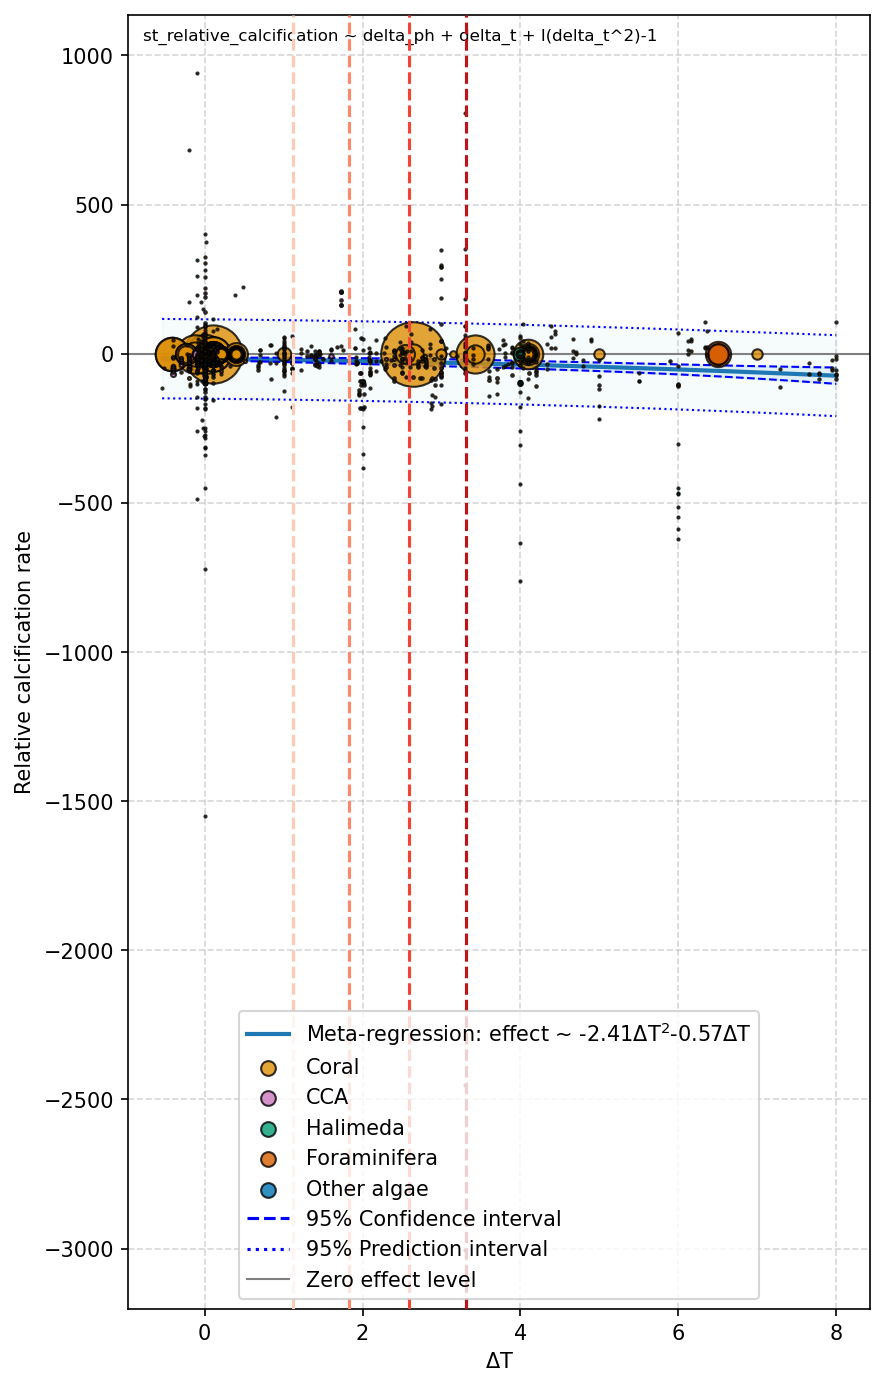

In [58]:
effect_type = "st_relative_calcification"
mass_data_df = data_df
# filter to temp treatment and mass data
model_df = data_df[
    #     # (data_df.treatment == "temp") | (data_df.treatment == "phtot_temp_mv")
    #     # &
    # (data_df.st_calcification_unit == "mgCaCO3 cm-2d-1")
    (data_df.st_calcification_unit == "mgCaCO3 g-1d-1")
]
# model_df = data_df
# remove rows with delta_t > 6
# model_df = model_df[model_df.delta_t <= 5.8]
model_df = data_df

metafor_model = meta_regression.MetaforModel(
    model_df,
    effect_type=effect_type,
    treatment=["temp", "phtot", "temp_phtot"],
    # formula=f"{effect_type} ~ delta_t + delta_ph",
    formula=f"{effect_type} ~ delta_ph + delta_t + I(delta_t^2)-1",
    # formula=f"{effect_type} ~ delta_t + I(delta_t**2) + factor(core_grouping)",
    # formula=f"{effect_type} ~ delta_t + I(delta_t**2)",
    # formula=f"{effect_type} ~ delta_t + I(delta_t**2) + factor(st_calcification_unit)",
).fit_model()
print(metafor_model.summary)

fig, ax = analysis_plot.MetaRegressionPlotter(
    model_object=metafor_model,  # type: ignore
    x_axis_moderator=["delta_t", "I(delta_t^2)"],
    # x_axis_moderator=["delta_ph"],
    # x_axis_moderator=["delta_t", "I(delta_t^2)"],
    ylabel="Relative calcification rate",
    # colorby="core_grouping",
    future_global_anomaly_df=global_future_anomaly_df,
).plot()

In [ ]:
data_df[data_df.st_relative_calcification_var < 0.01][
    [
        "doi",
        "st_relative_calcification",
        "st_relative_calcification_var",
        "calcification",
        "calcification_unit",
        "st_calcification_unit",
    ]
]

doi  st_relative_calcification  \
544   10.1093/icesjms/fsaa015                   0.023750   
803    10.1126/sciadv.aba9958                   0.005999   
804    10.1126/sciadv.aba9958                   0.000020   
807    10.1126/sciadv.aba9958                   0.033328   
1041  10.5194/bg-10-6807-2013                   0.059559   

      st_relative_calcification_var  calcification calcification_unit  \
544                        0.007958       0.023750   % changeBW day-1   
803                        0.002811       0.005999    delta %BW day-1   
804                        0.008433       0.000020    delta %BW day-1   
807                        0.008302       0.033328    delta %BW day-1   
1041                       0.003488       0.059559           %g day-1   

     st_calcification_unit  
544          deltaMass d-1  
803          deltaMass d-1  
804          deltaMass d-1  
807          deltaMass d-1  
1041         deltaMass d-1

In [95]:
influences.cooks_distance[0].max()

np.float64(870.8197641046781)

In [96]:
# influences.summary_table()

706    10.1111/gcb.13481-LOC-A
707    10.1111/gcb.13481-LOC-A
Name: doi, dtype: object


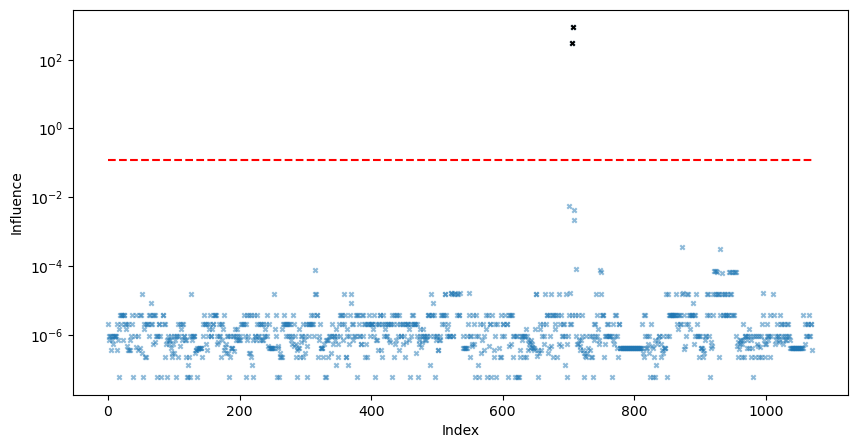

In [105]:
plt.figure(figsize=(10, 5))
influences, cooks_d = analysis.calc_cooks_distance(data_df.st_relative_calcification)
threshold = analysis.calc_cooks_threshold(data_df.st_relative_calcification, 3)
plt.scatter(
    data_df.index,
    influences.cooks_distance[0],
    alpha=0.5,
    s=10,
    marker="x",
)
plt.hlines(
    threshold,
    xmin=0,
    xmax=len(data_df),
    color="red",
    linestyle="--",
)
# add any points with cooks distance > threshold to plot in black

pts_above_threshold = data_df.index[influences.cooks_distance[0] > threshold]
plt.scatter(
    pts_above_threshold,
    influences.cooks_distance[0][pts_above_threshold],
    color="black",
    s=10,
    marker="x",
)
# get the dois for these points
dois = data_df.loc[pts_above_threshold, "doi"]
print(dois)
plt.xlabel("Index")
plt.ylabel("Influence")
plt.yscale("log")

In [67]:
area_df = data_df[data_df.st_calcification_unit == "mgCaCO3 cm-2d-1"]

area_df[area_df.delta_t > 5][
    cols + ["temp", "phtot", "control_temp", "control_phtot", "phnbs", "irr"]
]

doi  calcification  st_calcification  \
211   10.1007/s00442-005-0210-5       0.400000          0.000400   
214   10.1007/s00442-005-0210-5       0.060000          0.000060   
217   10.1007/s00442-005-0210-5       0.050000          0.000050   
537     10.1073/pnas.1502283112       1.018230          2.445876   
539     10.1073/pnas.1502283112       1.244430          2.989227   
812  10.1186/s40168-023-01653-4       0.002757          2.756596   
813  10.1186/s40168-023-01653-4       0.002859          2.858663   
814  10.1186/s40168-023-01653-4       0.004203          4.202577   

     calcification_unit st_calcification_unit  st_relative_calcification  \
211          ug cm-2d-1       mgCaCO3 cm-2d-1                 -64.601770   
214          ug cm-2d-1       mgCaCO3 cm-2d-1                 -92.500000   
217          ug cm-2d-1       mgCaCO3 cm-2d-1                 -90.566038   
537  umolCaCO3 cm-2hr-1       mgCaCO3 cm-2d-1                  69.795558   
539  umolCaCO3 cm-2hr-1       mgCaCO3 cm-2d-1                 107.515675   
812    gCaCO3 cm-2day-1       mgCaCO3 cm-2d-1                 -22.902665   
813    gCaCO3 cm-2day-1       mgCaCO3 cm-2d-1                 -20.048035   
814    gCaCO3 cm-2day-1       mgCaCO3 cm-2d-1                  17.538986   

     st_relative_calcification_var  st_control_calcification  \
211                    4127.073220                  0.001130   
214                    3765.241003                  0.000800   
217                   15639.993838                  0.000530   
537                     365.282299                  1.440483   
539                     585.687659                  1.440483   
812                     367.505481                  3.575475   
813                     628.689232                  3.575475   
814                     934.270669                  3.575475   

     st_treatment_calcification  delta_t  delta_ph  temp  phtot  control_temp  \
211                    0.000400      5.5       0.0  30.7    NaN          25.2   
214                    0.000060      5.5       0.0  30.7    NaN          25.2   
217                    0.000050      5.5       0.0  30.7    NaN          25.2   
537                    2.445876      6.0       0.0  30.0    NaN          24.0   
539                    2.989227      8.0       0.0  32.0    NaN          24.0   
812                    2.756596      6.0       0.0  32.0    NaN          26.0   
813                    2.858663      6.0       0.0  32.0    NaN          26.0   
814                    4.202577      6.0       0.0  32.0    NaN          26.0   

     control_phtot  phnbs    irr  
211            NaN    NaN    NaN  
214            NaN    NaN    NaN  
217            NaN    NaN    NaN  
537            NaN    NaN    NaN  
539            NaN    NaN    NaN  
812            NaN    NaN  150.0  
813            NaN    NaN  150.0  
814            NaN    NaN  150.0

In [ ]:
cols = [
    "doi",
    "calcification",
    "st_calcification",
    "calcification_unit",
    "st_calcification_unit",
    "st_relative_calcification",
    "st_relative_calcification_var",
    "st_control_calcification",
    "st_treatment_calcification",
    "delta_t",
    "delta_ph",
]
area_df[area_df.st_relative_calcification > 1000][cols]

doi  calcification  st_calcification  \
735  10.1111/gcb.13481-LOC-A       0.715143          0.715143   

    calcification_unit st_calcification_unit  st_relative_calcification  \
735  mg CaCO3 cm-2 d-1       mgCaCO3 cm-2d-1               27911.111111   

     st_relative_calcification_var  st_control_calcification  \
735                   1.444758e+13                 -0.002571   

     st_treatment_calcification  delta_t  delta_ph  
735                    0.715143      0.0      -0.3

In [44]:
from calcification.processing import cleaning
import pandas as pd

area_df = data_df[data_df.st_calcification_unit == "mgCaCO3 cm-2d-1"]
cleaning.standardise_calcification_rates(pd.DataFrame(area_df.loc[735]).T)[cols]

INFO:calcification.processing.cleaning:Unit standardization complete: 1/1 rows converted successfully


doi calcification st_calcification  \
735  10.1111/gcb.13481-LOC-A      0.715143         0.715143   

    calcification_unit st_calcification_unit st_relative_calcification  \
735  mg CaCO3 cm-2 d-1       mgCaCO3 cm-2d-1              27911.111111   

    st_relative_calcification_var st_control_calcification  \
735         14447577699474.677734                -0.002571   

    st_treatment_calcification delta_t delta_ph  
735                   0.715143     0.0     -0.3

In [113]:
results = analysis_plot.MetaRegressionResults(
    model_object=metafor_model,
    moderator_names=["delta_t", "I(delta_t^2)"],
).get_plotting_values()

In [ ]:
data_df[data_df.st_relative_calcification == data_df.st_relative_calcification.min()][
    [
        "doi",
        "calcification",
        "st_calcification",
        "calcification_unit",
        "st_calcification_unit",
        "st_relative_calcification",
        "st_relative_calcification_var",
        "st_control_calcification",
        "st_treatment_calcification",
        "delta_t",
        "delta_ph",
    ]
]

doi calcification st_calcification  \
728  10.1111/gcb.13481-LOC-A     -0.862714        -0.862714   

    calcification_unit st_calcification_unit st_relative_calcification  \
728  mg CaCO3 cm-2 d-1       mgCaCO3 cm-2d-1                  -33450.0   

     st_relative_calcification_var st_control_calcification  \
728                   2.102519e+13                -0.002571   

    st_treatment_calcification delta_t delta_ph  
728                  -0.862714     3.3     -0.3

In [ ]:
pd.read_csv(
    config.clean_data_dir / "analysis_ready_data.csv"
).st_relative_calcification.min()

np.float64(-33450.00000000058)

In [ ]:
data_df.loc[data_df.original_doi == "10.1007/s00338-011-0786-7"].sort_values(
    by="treatment_level_ph"
)[["delta_ph", "st_calcification", "st_relative_calcification", "treatment_level_ph"]]


delta_ph st_calcification st_relative_calcification treatment_level_ph
125   -0.175         1.599789                  3.536728                1.0
127   -0.175         1.160207                -24.912553                1.0
123   -0.275         1.400416                 -9.366498                2.0
128   -0.275          1.27791                -17.294986                2.0
121   -0.405         1.140991                -26.156238                3.0
126   -0.405         1.659841                  7.423241                3.0
122   -0.505         1.222662                -20.870579                4.0
124   -0.505         1.599789                  3.536728                4.0

In [175]:
mass_data_df.st_calcification_unit.value_counts()


st_calcification_unit
mgCaCO3 g-1d-1       227
mgCaCO3 mg-1d-1       38
umolCaCO3 g-1hr-1     35
umolCaCO3 g-1d-1      30
nmolCaCO3 mg-1d-1      4
nmolCaCO3 g-1d-1       2
Name: count, dtype: int64

In [ ]:
data_df[abs(data_df.st_calcification) > 200][
    [
        "doi",
        "calcification",
        "calcification_unit",
        "st_calcification",
        "st_calcification_unit",
    ]
]


doi calcification  calcification_unit  \
522       10.1073/pnas.0804478105         8.235         %BW month-1   
523       10.1073/pnas.0804478105        11.412         %BW month-1   
524       10.1073/pnas.0804478105         9.529         %BW month-1   
529       10.1073/pnas.0804478105          10.0         %BW month-1   
530       10.1073/pnas.0804478105         8.471         %BW month-1   
531       10.1073/pnas.0804478105         9.765         %BW month-1   
532       10.1073/pnas.0804478105         9.529         %BW month-1   
533       10.1073/pnas.0804478105         7.294         %BW month-1   
534       10.1073/pnas.0804478105        10.706         %BW month-1   
664        10.1098/rspb.2017.0778    -25.759768  μmolCaCO3 mm-2 d-1   
867  10.1371/journal.pone.0189122        8.8125      %changeSA/hour   
871  10.1371/journal.pone.0189122        8.5625      %changeSA/hour   
874  10.1371/journal.pone.0189122        8.4375      %changeSA/hour   
875  10.1371/journal.pone.0189122        8.6875      %changeSA/hour   
907             10.3354/meps12552      2755.268         umol g-1d-1   

    st_calcification st_calcification_unit  
522        250.48125         deltaMass d-1  
523          347.115         deltaMass d-1  
524       289.840417         deltaMass d-1  
529       304.166667         deltaMass d-1  
530       257.659583         deltaMass d-1  
531        297.01875         deltaMass d-1  
532       289.840417         deltaMass d-1  
533       221.859167         deltaMass d-1  
534       325.640833         deltaMass d-1  
664      -257.821537       mgCaCO3 cm-2d-1  
867            211.5           deltaSA d-1  
871            205.5           deltaSA d-1  
874            202.5           deltaSA d-1  
875            208.5           deltaSA d-1  
907       275.766233        mgCaCO3 g-1d-1

In [1]:
mass_df = data_df[data_df.st_calcification_unit == "mgCaCO3 g-1d-1"]

cntrl = mass_df.st_control_calcification
treat = mass_df.st_treatment_calcification


effect = (treat - cntrl) / cntrl
# plot control mean value against relative change
# plot absolute change with
plt.scatter(cntrl, effect)
plt.xlabel("Control mean")
plt.ylabel("Effect")
# plt.xlim(-1, 20)
# plt.ylim(-2, 2)
plt.show()

NameError: name 'data_df' is not defined

In [22]:
import numpy as np
import matplotlib.pyplot as plt


t_data = data_df[abs(data_df.delta_t) > 0.1]
t_data = t_data[(t_data.treatment != "phtot")]

# calculate drdT
drdT = t_data.st_relative_calcification / t_data.delta_t
# remove nans and infs
drdT = drdT.replace([np.inf, -np.inf], np.nan).dropna()

# print original_dois for top n largest drdT
# Show the rows in t_data corresponding to the 10 largest absolute drdT values
n = 100
top_drdT_idx = abs(drdT).sort_values(ascending=False).head(n).index
t_data.loc[:, "drdT"] = drdT
t_data.loc[top_drdT_idx].groupby("doi").agg(
    {
        "calcification": "max",
        "st_calcification": "max",
        "calcification": "max",
        "calcification_unit": "first",
        "st_calcification_unit": "first",
        "delta_t": "max",
        "delta_ph": "max",
        "irr_group": "first",
        "drdT": "max",
        "treatment": "first",
        "st_control_calcification": "first",
        "st_relative_calcification": "first",
    }
)

/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_38785/496978400.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  drdT = drdT.replace([np.inf, -np.inf], np.nan).dropna()


calcification st_calcification  \
doi                                                              
10.1002/lno.11863                        2.24             2.24   
10.1007/s00338-016-1405-4              -0.075        -0.000075   
10.1007/s00442-005-0210-5                1.46          0.00146   
10.1016/j.jembe.2016.10.002          0.648095         0.648095   
10.1016/j.marenvres.2020.105107          1.09         0.000001   
10.1016/j.marpolbul.2018.11.053     31.521739         0.756522   
10.1038/s42003-022-04353-1           0.018041         0.043337   
10.1038/srep19030                        0.01         0.024021   
10.1073/pnas.0804478105                11.412          347.115   
10.1073/pnas.1502283112                 1.209         2.904121   
10.1093/icesjms/fsw026                    3.5              3.5   
10.1093/icesjms/fsw078                   3.53             3.53   
10.1098/rspb.2015.1887                -0.2029          -0.2029   
10.1098/rspb.2019.0614             -11.198581        -0.011199   
10.1111/gcb.12658-LOC-A                  0.65             0.65   
10.1111/gcb.12658-LOC-B                 -0.22            -0.22   
10.1111/gcb.13481-LOC-A               1.07725          1.07725   
10.1371/journal.pone.0189122           8.8125            211.5   
10.3354/meps12552                    -1019.93      -102.081632   
10.4319/lo.2011.56.4.1200              0.0242           0.0242   

                                 calcification_unit st_calcification_unit  \
doi                                                                         
10.1002/lno.11863                 mg CaCO3 cm−2 d−1       mgCaCO3 cm-2d-1   
10.1007/s00338-016-1405-4                  mm day-1                 m d-1   
10.1007/s00442-005-0210-5                ug cm-2d-1       mgCaCO3 cm-2d-1   
10.1016/j.jembe.2016.10.002       mgCaCO3 cm-2day-1       mgCaCO3 cm-2d-1   
10.1016/j.marenvres.2020.105107            um day-1                 m d-1   
10.1016/j.marpolbul.2018.11.053    μgCaCO3 cm-2hr-1       mgCaCO3 cm-2d-1   
10.1038/s42003-022-04353-1       μmolCaCO3 cm-2hr-1       mgCaCO3 cm-2d-1   
10.1038/srep19030                 umolCaCO3 cm-2h-1       mgCaCO3 cm-2d-1   
10.1073/pnas.0804478105                 %BW month-1         deltaMass d-1   
10.1073/pnas.1502283112          umolCaCO3 cm-2hr-1       mgCaCO3 cm-2d-1   
10.1093/icesjms/fsw026             mg CaCO3 g−1 d−1        mgCaCO3 g-1d-1   
10.1093/icesjms/fsw078               mgCaCO3 g-1d-1        mgCaCO3 g-1d-1   
10.1098/rspb.2015.1887                 mg cm-2day-1       mgCaCO3 cm-2d-1   
10.1098/rspb.2019.0614                   μg cm-2d-1       mgCaCO3 cm-2d-1   
10.1111/gcb.12658-LOC-A                  mg cm-2d-1       mgCaCO3 cm-2d-1   
10.1111/gcb.12658-LOC-B                  mg cm-2d-1       mgCaCO3 cm-2d-1   
10.1111/gcb.13481-LOC-A           mg CaCO3 cm-2 d-1       mgCaCO3 cm-2d-1   
10.1371/journal.pone.0189122         %changeSA/hour           deltaSA d-1   
10.3354/meps12552                       umol g-1d-1        mgCaCO3 g-1d-1   
10.4319/lo.2011.56.4.1200               mgCaCO3 d-1                mg d-1   

                                  delta_t  delta_ph irr_group        drdT  \
doi                                                                         
10.1002/lno.11863                     4.1  0.027933        -1   54.683166   
10.1007/s00338-016-1405-4             2.1     -0.29        -1  -55.383023   
10.1007/s00442-005-0210-5             1.9       0.0        -1   43.421053   
10.1016/j.jembe.2016.10.002        0.6925    0.0075         1  -39.776533   
10.1016/j.marenvres.2020.105107       1.1    -0.169        -1   52.700922   
10.1016/j.marpolbul.2018.11.053      0.48 -0.005595        -1  520.467836   
10.1038/s42003-022-04353-1           1.98  0.055233         0  -46.681439   
10.1038/srep19030                    2.02      0.06         1  -47.135606   
10.1073/pnas.0804478105               3.0       0.0        -1  115.705000   
10.1073/pnas.1502283112              

In [107]:
import numpy as np
import matplotlib.pyplot as plt

ph_data = data_df[data_df.delta_ph != 0]
ph_data = ph_data[ph_data.delta_ph.abs() < 100]
drdpH = ph_data.st_relative_calcification / ph_data.delta_ph
drdpH = drdpH.replace([np.inf, -np.inf], np.nan).dropna()
n = 100
top_drdpH_idx = abs(drdpH).sort_values(ascending=False).head(n).index
ph_data.loc[:, "drdpH"] = drdpH
ph_data.loc[top_drdpH_idx].groupby("doi").agg(
    {
        "calcification": "max",
        "st_calcification": "max",
        "st_relative_calcification": "max",
        "calcification_unit": "first",
        "st_calcification_unit": "first",
        "delta_t": "max",
        "delta_ph": "max",
        "irr_group": "first",
        "drdpH": "max",
    }
)

calcification  \
doi                                                                
10.1002/lno.10952                                       0.000000   
10.1002/lno.11863                                       2.240000   
10.1007/s00227-022-04071-6                              0.010370   
10.1007/s00338-008-0380-9                              -0.900000   
10.1007/s00338-016-1405-4                               0.140000   
10.1007/s00338-016-1425-0                               0.670000   
10.1007/s00338-017-1634-1                              44.482151   
10.1016/j.jembe.2010.11.009                             2.785714   
10.1016/j.jembe.2013.12.013                             0.260000   
10.1016/j.jembe.2016.10.002                             0.648095   
10.1016/j.jembe.2020.151489                            -5.358876   
10.1016/j.marenvres.2020.105107                         1.030000   
10.1016/j.marpolbul.2018.11.053                        31.521739   
10.1038/s41598-022-06896-z                             16.730460   
10.1038/s42003-022-04353-1                              0.107342   
10.1038/srep19030                                       0.200000   
10.1073/pnas.0804478105                                11.412000   
10.1093/icesjms/fsv162                                 50.600000   
10.1098/rspb.2019.0614                                261.225476   
10.1098/rspb.2021.0923                                  0.001861   
10.1111/gcb.13481-LOC-A                                 0.715143   
10.1111/gcb.14379                                       0.012800   
10.1111/gcb.14998                                       3.929245   
10.1111/jpy.13158                                      11.125828   
10.1111/jpy.13290                                       2.408759   
10.1242/jeb.217000                                      0.224986   
10.1371/journal.pone.0075049                            0.451600   
10.1371/journal.pone.0189122                            8.812500   
10.3354/meps11591                                      29.000000   
10.3354/meps12552                                    1873.246000   
10.3389/fmars.2021.660196                               0.900000   
10.3389/fmars.2022.964803                               0.082000   
10.4319/lo.2011.56.4.1200                               0.260000   
10.4319/lo.2014.59.3.1081                               0.110000   
https://api.semanticscholar.org/CorpusID:56267143       6.000000   

                                                   st_calcification  \
doi                                                                   
10.1002/lno.10952                                      0.000000e+00   
10.1002/lno.11863                                      2.240000e+00   
10.1007/s00227-022-04071-6                             1.037007e+01   
10.1007/s00338-008-0380-9                             -2.465753e+00   
10.1007/s00338-016-1405-4                              1.400000e-04   
10.1007/s00338-016-1425-0                              6.700000e-01   
10.1007/s00338-017-1634-1                              4.448215e-02   
10.1016/j.jembe.2010.11.009                            2.785714e-03   
10.1016/j.jembe.2013.12.013                            2.600000e-01   
10.1016/j.jembe.2016.10.002                            6.480952e-01   
10.1016/j.jembe.2020.151489                           -1.287248e+01   
10.1016/j.marenvres.2020.105107                        1.030000e-06   
10.1016/j.marpolbul.2018.11.053                        7.565217e-01   
10.1038/s41598-022-06896-z                             1.674500e+00   
10.1038/s42003-022-04353-1                             2.578443e-01   
10.1038/srep19030                                      4.804171e-01   
10.1073/pnas.0804478105                                3.471150e+02   
10.1093/icesjms/fsv162                                 5.060000e+01   
10.1098/rspb.2019.0614                                 2.612255e-01   
10.1098/rspb.2021.0923                     

In [108]:
drdT = drdT[drdT.abs() < 1000]  # filter drdT to +-1000
# plot histogram of drdT
plt.hist(drdT, bins=20)
# plt.yscale("log")
plt.xlabel(r"$\frac{d\ln(Calcification)}{dT}$")
plt.ylabel("Frequency")
plt.show()
drdT.describe()

NameError: name 'drdT' is not defined

count      944.000000
mean       109.993168
std       4186.784354
min     -93037.037037
25%         -3.893469
50%         55.574501
75%        149.643761
max      39846.177877
dtype: float64


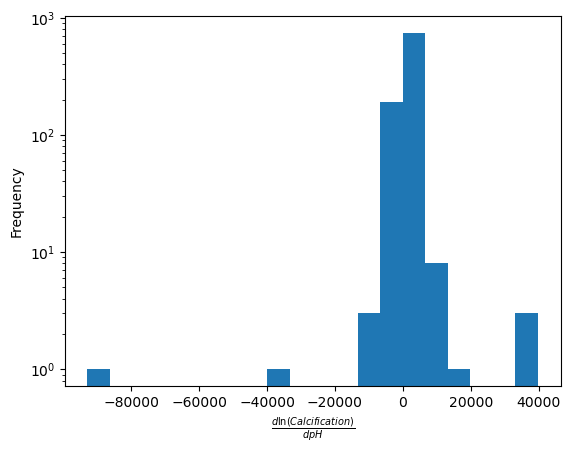

In [109]:
import numpy as np
import matplotlib.pyplot as plt


# calculate drdpH
data = data_df[data_df.delta_ph != 0]
drdpH = data.st_relative_calcification / data.delta_ph

# remove nans and infs
drdpH = drdpH.replace([np.inf, -np.inf], np.nan).dropna()
drdpH = drdpH[drdpH.abs() < 1e5]  # filter drdpH to +-1000
# plot histogram of drdpH
plt.hist(drdpH, bins=20)
plt.yscale("log")
plt.xlabel(r"$\frac{d\ln(Calcification)}{dpH}$")
print(drdpH.describe())
plt.ylabel("Frequency")
plt.show()
# outlier detection to formalise removal

In [413]:
data_df.columns[50:]


Index(['omegaa_se', 'omegac', 'omegac_sd', 'omegac_se', 'original_doi', 'pco2',
       'pco2_sd', 'pco2_se', 'phnbs', 'phnbs_sd', 'phnbs_se', 'phtot',
       'phtot_sd', 'phtot_se', 'realm', 'sal', 'sal_sd', 'sal_se',
       'secondary_check', 'species', 'species_types', 'st_calcification',
       'st_calcification_sd', 'st_calcification_unit', 'ta', 'ta_sd', 'ta_se',
       'taxa', 'temp', 'temp_sd', 'temp_se', 'year', 'treatment_group',
       'treatment_level_t', 'treatment_level_ph', 'irr_group', 'treatment',
       'delta_t', 'delta_ph', 'cohens_d', 'cohens_d_var', 'hedges_g',
       'hedges_g_var', 'relative_calcification', 'relative_calcification_var',
       'absolute_calcification', 'absolute_calcification_var',
       'st_relative_calcification', 'st_relative_calcification_var',
       'st_absolute_calcification', 'st_absolute_calcification_var',
       'control_temp', 'treatment_temp', 'control_phtot', 'treatment_phtot',
       'treatment_val', 'control_calcification', 'cont

In [78]:
local_climatology_df, global_future_anomaly_df, global_anomaly_df = (
    process.process_climatology_data(
        data_df,
        config.climatology_data_dir / "ph_scenarios_output_table_site_locations.csv",
        config.climatology_data_dir / "sst_scenarios_output_table_site_locations.csv",
        config.resources_dir / "locations.yaml",
    )
)


INFO:root:Loading climatology data...
/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/processing/climatology.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(
/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/processing/climatology.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(
INFO:root:Unique locations in climatology: 198, locations in working

Generating batched anomalies for ph:   0%|          | 0/76 [00:00<?, ?it/s]

Generating batched anomalies for sst:   0%|          | 0/76 [00:00<?, ?it/s]

### Initial model exploration

An intercept is included in models which only include abiotic treatments (i.e. changes in pH/temperature). In this case, the following can be interpreted:
- Intercept – represents the estimated calcification reponse when all moderators are zero (i.e. control condition). This relates to the baseline calcification rate before experimental manipulation, averaged across all the organism types.
- Coefficients – the coefficients represent the estimated change in calcification for a one-unit change in pH or temperature (note difference in signs, since for experimental treatments $\Delta$ pH < 0 while $\Delta$ T > 0) while holding the other coefficient constant.

Including an intercept allows the regression to find its baseline/natural position rather than forcing it through the origin. This would force the assumption that zero change in pH and temperature must result in zero change in calcification (which may not be true, especially given experimental/methodological uncertainty).

The following code blocks illustrate the effect on the significance of the moderators in both the presence and absence of a model intercept.

In [79]:
# declare effect type for subsequent investigation
effect_type = "st_relative_calcification"

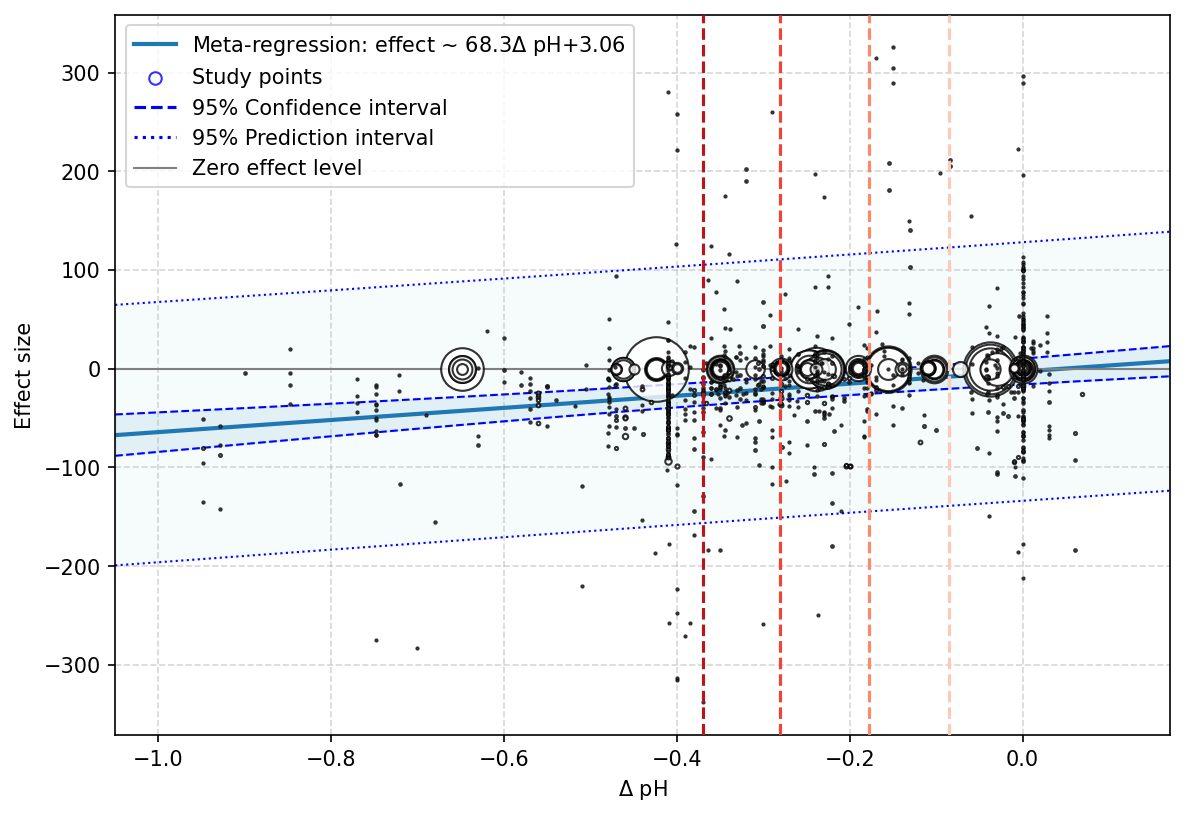

In [81]:
metafor_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
).fit_model()
print(metafor_model.summary)

fig, ax = analysis_plot.MetaRegressionPlotter(
    model=metafor_model.model,
    x_axis_moderator="delta_ph",
    future_global_anomaly_df=global_future_anomaly_df,
).plot()

In [ ]:
### ILLUSTRATING INTERCEPT (CARBONATE CHEMISTRY ONLY)
metafor_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
).fit_model()
metafor_model.get_model_summary()

metafor_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t - 1",
).fit_model()
metafor_model.get_model_summary()

In [ ]:
### ILLUSTRATING INTERCEPT (WITH CORE GROUPINGS)
metafor_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t + factor(core_grouping)",
).fit_model()
metafor_model.get_model_summary()

metafor_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t + factor(core_grouping) - 1",
).fit_model()
metafor_model.get_model_summary()


##### Interpretation: shifts in intercept value as more moderators are added
 
In the case of including taxonomical information (via `core_groupings` factor), an intercept is unnecessary. In this case an intercept would result in a random value of `core_groupings` being assigned as baseline and all other factor values compared against it. While this is useful to investigate comparisons between organisms and a particular reference taxon, it is not the current goal. Removing the intercept means that each `core_grouping` is assigned its own coefficient representing its baseline effect (the expected value of calcification rate for this grouping when the other moderators are zero).   

The addition of the `core_grouping` variable improves the model (test of moderators statistic increases, residual heterogeneity decreases, AICc decreases), suggesting that taxonomic group is an important moderator.

The coefficients for delta_ph and delta_t remain remarkably stable between models, suggesting their effects are robust regardless of which organisms are being considered.

The large discrepency between the magnitudes of the coefficients is perhaps surprising, although it should be noted that due to the logarithmic nature of the pH scale a change by 1 unit represents a 10 times increase in acidity. This puts the temperature slope in perspective. Additionally, a number of studies suggest a non-linear trend in calcification rate with increasing temperature. The suggested quadratic would result in a linear slope under-representing the likely ultimately-negative impact of increasing temperature with respect to the control. Finally, multiple studies reported sample mortality at more extreme treatment conditions, and the resulting survivorship effect may represent resistant species with only smaller sample sizes at the higher temperatures: especially since such mortalities are rarely reported consistently.

In [ ]:
### INIITAL NAIVE (ILLUSTRATION)
metafor_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ 1",
).fit_model()
metafor_model.get_model_summary()

##### Interpretation

As above, the model intercept represents the estimated overall mean effect of the treatments (changing pH and temperature) on calcification rates across all studies and organisms in the meta-analysis, after accounting for the nested random effects structure relating to the nested structure of the dataset (multiple treatments within studies).

A negative intercept indicates that, on average across all studies and organisms, the calcification rates decreased in response to the experimental treatments. A high statistical significance (e.g. p < 0.0001) indicates that this decrease is unlikely due to chance. The confidence interval (95%) shows the range in which the true mean effect is likely to fall.

However, the substantial between-study variance (sigma^2.1 = 1775.21) suggests that the response varies considerably across different organisms and/or experimental conditions.

In [ ]:
### INIITAL CORE GROUPINGS (ILLUSTRATION)
metafor_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ factor(core_grouping) - 1",
).fit_model()
metafor_model.get_model_summary()

In [ ]:
### A MORE REASONABLE MODEL (DELTA PH AND DELTA T, ADDITIVE)
metafor_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph + delta_t",
).fit_model()
metafor_model.get_model_summary()


analysis_plot.plot_multiple_metaregression_axes(
    model=metafor_model.model,
    x_axis_moderators=["delta_ph", "delta_t"],
    future_global_anomaly_df=global_future_anomaly_df,
)

INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph + delta_t



Removed 14 outlier(s) (from 860 samples) based on Cook's distance threshold of 0.12

----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1101
Total samples of relevant investigation:  860
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 14
Final sample count: 846 (241 rows dropped)


INFO:calcification.analysis.meta_regression:Model fitting complete.





Multivariate Meta-Analysis Model (k = 846; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4238.8602   8477.7204   8487.7204   8511.4052   8487.7920   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1054.8209  32.4780    110     no     original_doi 
sigma^2.2   630.3492  25.1068    846     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 843) = 57751.2616, p-val < .0001

Test of Moderators (coefficients 2:3):
QM(df = 2) = 49.0182, p-val < .0001

Model Results:

          estimate      se     zval    pval     ci.lb    ci.ub      
intrcpt    -3.6606  4.2943  -0.8524  0.3940  -12.0772   4.7561      
delta_ph   48.1369  7.5084   6.4110  <.0001   33.4207  62.8532  *** 
delta_t    -3.7995  0.9166  -4.1453  <.0001   -5.5960  -2.0030  *** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




(<Figure size 1800x900 with 2 Axes>,
 array([<Axes: xlabel='$\\Delta$ pH', ylabel='Effect size'>,
        <Axes: xlabel='$\\Delta$ T', ylabel='Effect size'>], dtype=object))

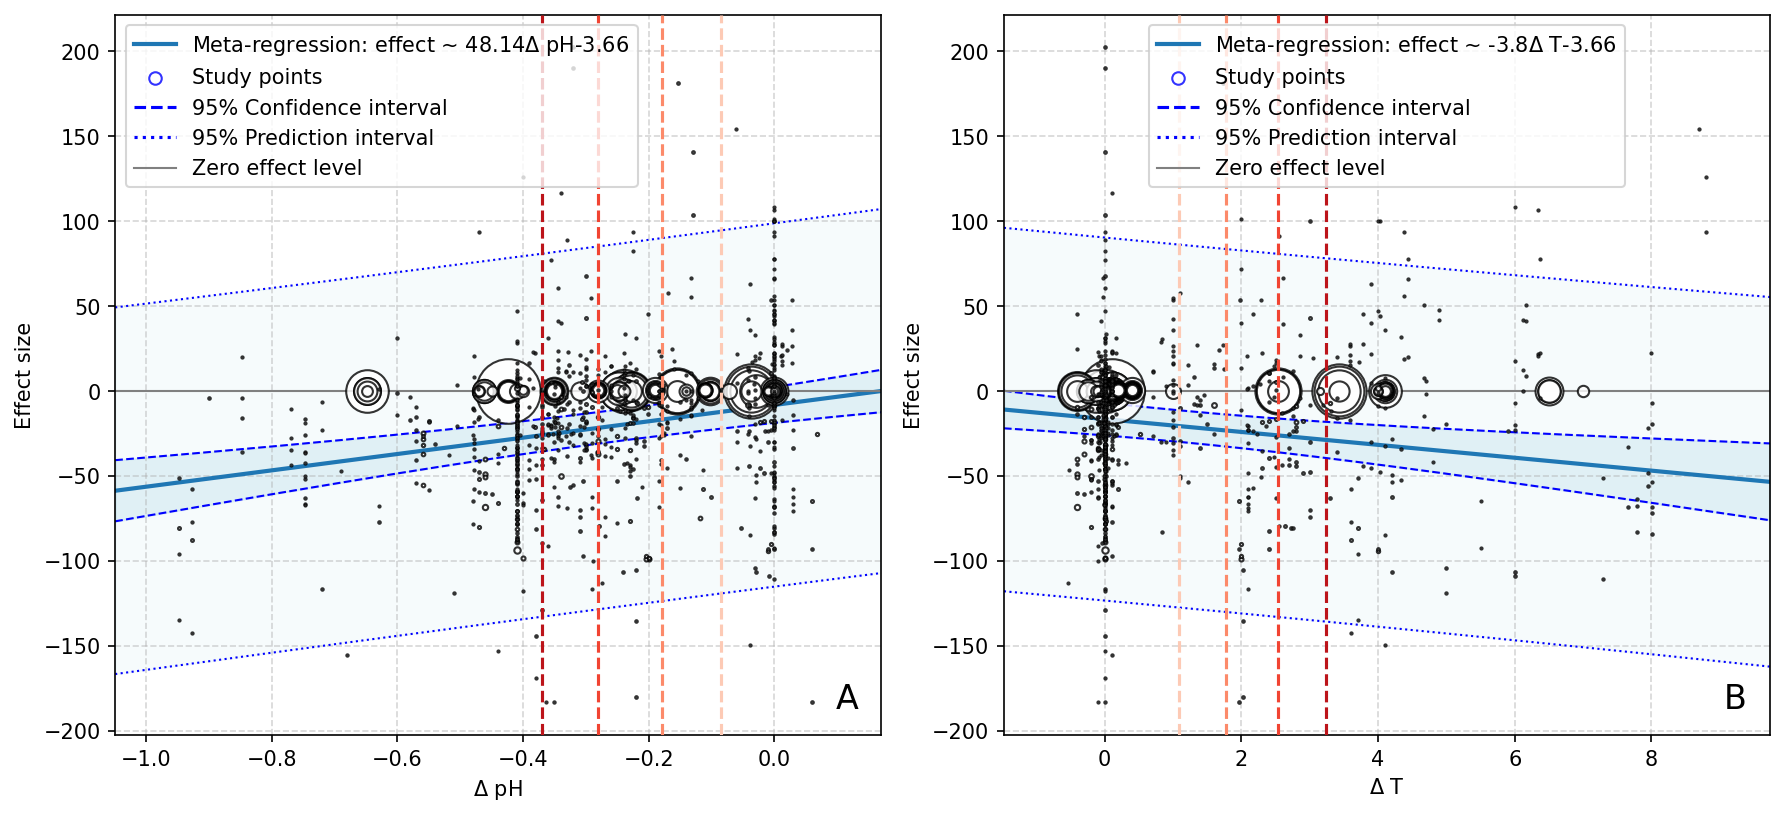

In [28]:
### FILTERING FOR OUTLIERS
filtered_effects_df = data_df.copy()

filtered_effects_df = filtered_effects_df[
    analysis_utils.filter_robust_zscore(
        filtered_effects_df["st_relative_calcification"]
    )
    & analysis_utils.filter_robust_zscore(
        filtered_effects_df["st_relative_calcification_var"]
    )
]

additive_model = meta_regression.MetaforModel(
    filtered_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph + delta_t",
).fit_model()
additive_model.get_model_summary()

analysis_plot.plot_multiple_metaregression_axes(
    model=additive_model.model,
    x_axis_moderators=["delta_ph", "delta_t"],
    future_global_anomaly_df=global_future_anomaly_df,
)

(<Figure size 1000x800 with 2 Axes>,
 <Axes: xlabel='delta_ph', ylabel='delta_t'>)

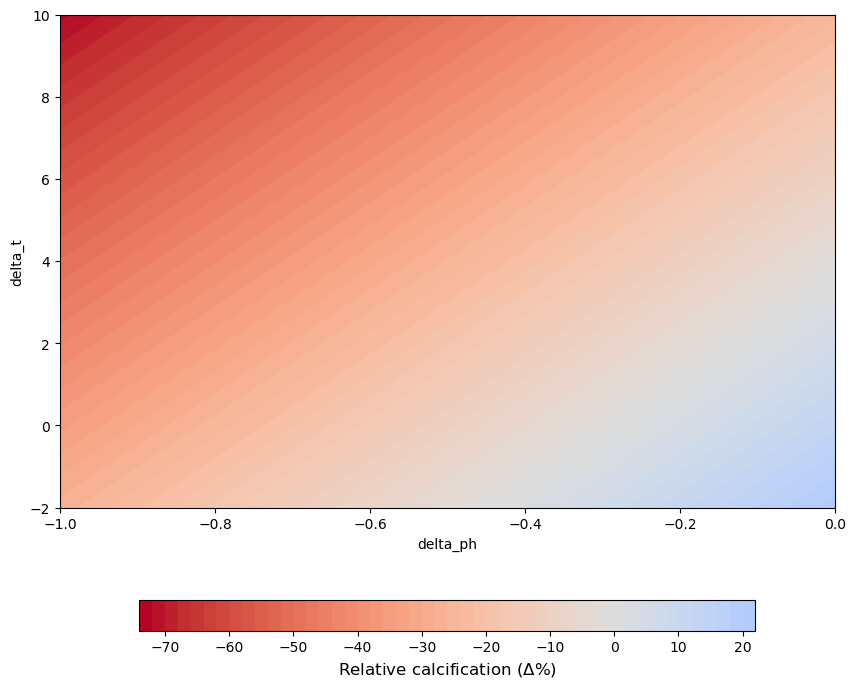

In [29]:
analysis_plot.plot_model_surface_2d(
    additive_model.model,
    ["delta_ph", "delta_t"],
    prediction_limits={"delta_ph": (-1, 0), "delta_t": (-2, 10)},
)

##### Interpretation
Group Effects (Absolute Estimates)
Each coefficient now represents the actual mean calcification response for that organism group:

CCA (Crustose Coralline Algae): -35.72 (p < 0.0001)
Shows a strong negative calcification response to pH and temperature treatments
Coral: -10.56 (p = 0.0316)
Shows a moderate negative calcification response
Foraminifera: +22.08 (p = 0.3524)
Shows a positive mean response, but it's not statistically significant (wide confidence interval crossing zero)
Halimeda: -43.90 (p = 0.0004)
Shows a strong negative calcification response
Other algae: -48.51 (p < 0.0001)
Shows the strongest negative calcification response among all groups

Direct Group Comparisons
Now you can directly compare the magnitude of effects across groups:

Most resistant to calcification decline: Foraminifera (+22.08, though not significant)
Moderate decline: Coral (-10.56)
Stronger decline: CCA (-35.72)
Severe decline: Halimeda (-43.90) and Other algae (-48.51)

The significant negative values for most groups indicate that pH and temperature treatments generally reduce calcification rates, but the magnitude varies substantially across taxonomic groups. Notably, Foraminifera appear potentially resilient (showing a non-significant positive trend), while algae groups (especially "Other algae" and Halimeda) appear most vulnerable with the largest negative responses.

In [ ]:
### A MORE REASONABLE MODEL, MORE COMPLEX MODEL (DELTA PH AND DELTA T, INTERACTIVE)
interaction_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
).fit_model()
interaction_model.get_model_summary()

analysis_plot.plot_multiple_metaregression_axes(
    model=interaction_model.model,
    x_axis_moderators=["delta_ph", "delta_t"],
    future_global_anomaly_df=global_future_anomaly_df,
)

In [ ]:
analysis_plot.plot_model_surface_2d(
    interaction_model.model,
    ["delta_ph", "delta_t"],
    prediction_limits={"delta_ph": (-1, 0), "delta_t": (-2, 10)},
)

(<Figure size 1800x900 with 2 Axes>,
 array([<Axes: xlabel='$\\Delta$ pH', ylabel='Effect size'>,
        <Axes: xlabel='$\\Delta$ T', ylabel='Effect size'>], dtype=object))

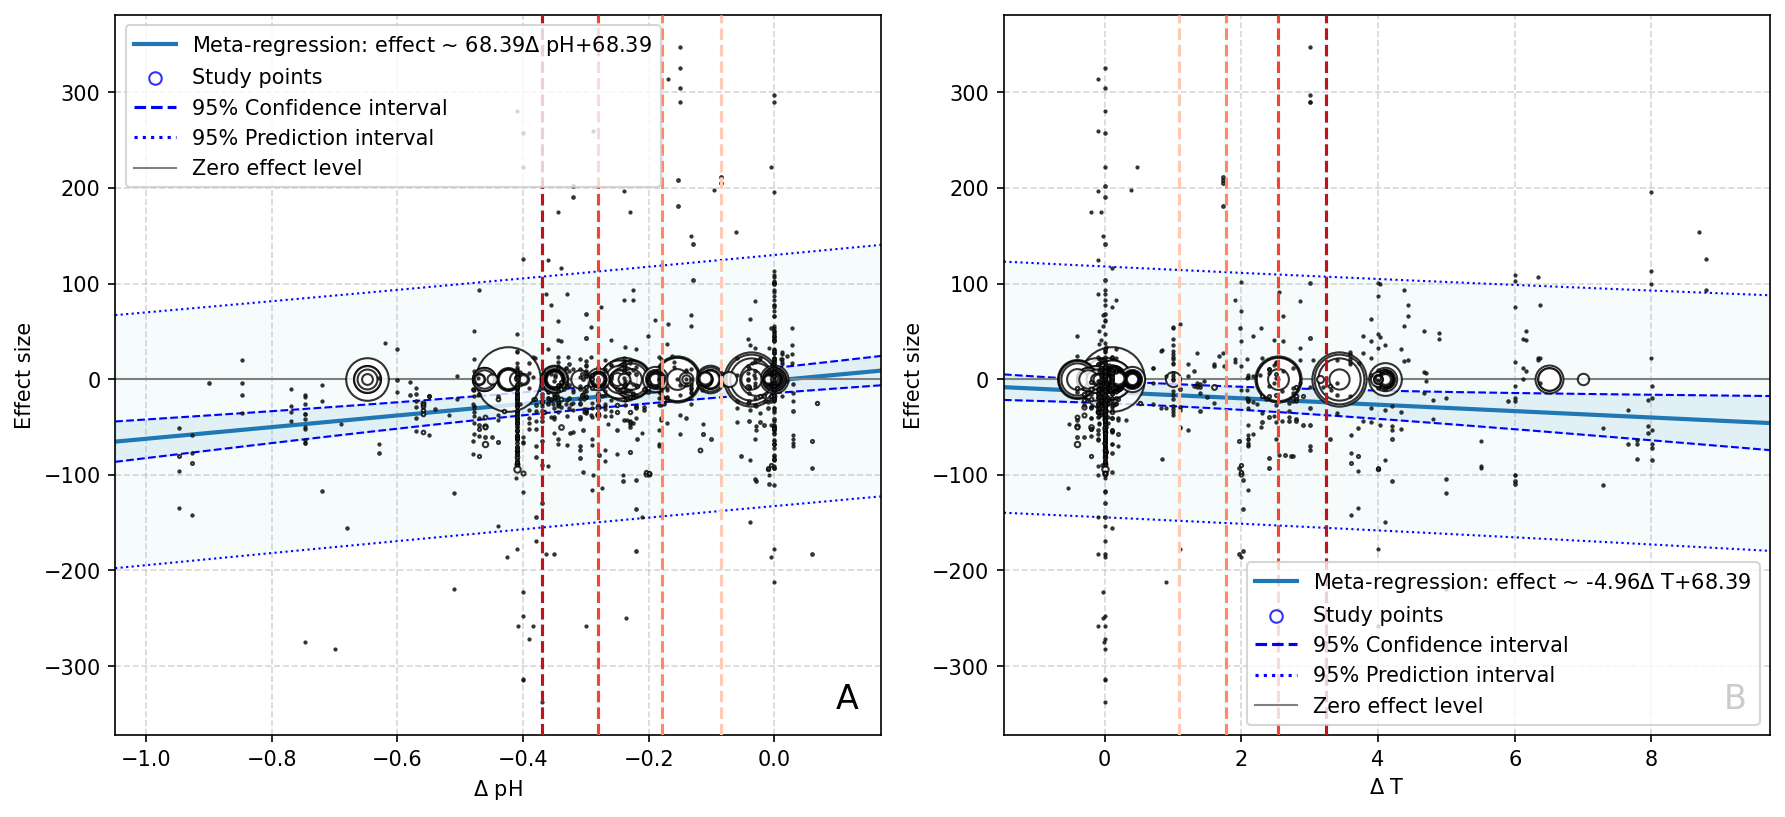

In [344]:
### NOW CAPTURING DIFFERENCES BETWEEN CORE GROUPINGS

# interaction_cg_model = meta_regression.MetaforModel(
#     data_df,
#     effect_type=effect_type,
#     treatment=["phtot", "temp", "phtot_temp_mv"],
#     formula=f"{effect_type} ~ delta_ph * delta_t + factor(core_grouping) - 1",
# ).fit_model()
# interaction_cg_model.get_model_summary()

analysis_plot.plot_multiple_metaregression_axes(
    model_object=interaction_cg_model,
    x_axis_moderators=["delta_ph", "delta_t"],
    future_global_anomaly_df=global_future_anomaly_df,
)

### Investigating absolute values

In [ ]:
### SIMPLEST ABSOLUTE VALUES
phtot_abs_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "phtot_temp_mv"],
    formula=f"{effect_type} ~ phtot",
    required_columns=["phtot", "temp"],
).fit_model()
phtot_abs_model.get_model_summary()

temp_abs_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ temp",
    required_columns=["temp", "phtot"],
).fit_model()
temp_abs_model.get_model_summary()

phtot_plus_temp_abs_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ phtot + temp",
    required_columns=["phtot", "temp"],
).fit_model()
phtot_plus_temp_abs_model.get_model_summary()

phtot_cross_temp_abs_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ phtot * temp",
    required_columns=["phtot", "temp"],
).fit_model()
phtot_cross_temp_abs_model.get_model_summary()

phtot_cross_temp_abs_cgs_model = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ phtot * temp + factor(core_grouping)",
    required_columns=["phtot", "temp"],
).fit_model()
phtot_cross_temp_abs_cgs_model.get_model_summary()

### Comparing between units

TODO: commentary

In [ ]:
### AREA-NORMALISED VS MASS-NORMALISED


mass_norm_model = meta_regression.MetaforModel(
    data_df[data_df["st_calcification_unit"] == "mgCaCO3 g-1d-1"],
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t + factor(core_grouping)",
).fit_model()

area_norm_model = meta_regression.MetaforModel(
    data_df[data_df["st_calcification_unit"] == "mgCaCO3 cm-2d-1"],
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t + factor(core_grouping)",
).fit_model()


analysis_plot.plot_multiple_metaregression_axes(
    # ax=axes[0, :],
    model=mass_norm_model.model,
    x_axis_moderators=["delta_ph", "delta_t"],
    future_global_anomaly_df=global_future_anomaly_df,
)

analysis_plot.plot_multiple_metaregression_axes(
    # ax=axes[1, :],
    model=area_norm_model.model,
    x_axis_moderators=["delta_ph", "delta_t"],
    future_global_anomaly_df=global_future_anomaly_df,
)

### Testing for publication bias

In [ ]:
### FUNNEL PLOTTING FOR PUBLICATION BIAS

# TODO
analysis_plot.plot_funnel_from_model(
    interaction_cg_model.model,
    main="Funnel plot of effect sizes",
    effect_type="Effect Size",
    shade_colors=["#d6d6d6", "#b8b8b8", "#8a8a8a"],
    back_color="white",
    level=[0.1, 0.05, 0.01],
    legend=True,
    hlines=[0],
    yaxis="seinv",
    digits=[1, 3],
    las=1,
    xaxs="i",
    yaxs="i",
    xlim=[
        -max(
            abs(interaction_cg_model.df[effect_type].min()),
            abs(interaction_cg_model.df[effect_type].max()),
        ),
        max(
            abs(interaction_cg_model.df[effect_type].min()),
            abs(interaction_cg_model.df[effect_type].max()),
        ),
    ],
    ylim=[0, 4],
    plot_in_python=True,
    figsize=(10, 8),
    save_path=config.fig_dir / "benthic_organsism_funnel_plot.png",
)

##### Interpretation

TODO

## More formally: using MuMIn

In [ ]:
# ### scan potential interactive models via MuMIn dredge
# temp_formula, temp_df = analysis.preprocess_df_for_meta_model(data_df, treatment = ['phtot', 'temp', 'phtot_temp_mv'])
# analysis.run_parallel_dredge(temp_df, global_formula=f"{effect_type} ~ delta_ph + delta_t", n_cores=16)

In [ ]:
# ### scan potential interactive models via MuMIn dredge
# temp_formula, temp_df = analysis.preprocess_df_for_meta_model(data_df, treatment = ['phtot', 'temp', 'phtot_temp_mv'])
# analysis.run_parallel_dredge(temp_df, global_formula=f"{effect_type} ~ delta_ph * delta_t", n_cores=16)

In [ ]:
# ### scan potential interactive models via MuMIn dredge (absolute values)
# temp_formula, temp_df = analysis.preprocess_df_for_meta_model(data_df, treatment=['temp', 'phtot', 'phtot_temp_mv'])
# analysis.run_parallel_dredge(temp_df, global_formula=f"{effect_type} ~ phtot + temp", n_cores=16)

In [ ]:
# ### scan potential interactive models via MuMIn dredge (absolute values)
# temp_formula, temp_df = analysis.preprocess_df_for_meta_model(data_df, treatment=['temp', 'phtot', 'phtot_temp_mv'])
# analysis.run_parallel_dredge(temp_df, global_formula=f"{effect_type} ~ phtot * temp", n_cores=16)

In [ ]:
%reload_ext autoreload
%autoreload 2

In [18]:
dredgeConfig = meta_regression.DredgeConfig(
    effect_type=effect_type,
    global_formula=f"{effect_type} ~ phtot * temp + factor(core_grouping)",
    treatment=["temp", "phtot", "phtot_temp_mv"],
)

meta_regression.DredgeAnalysis(data_df, dredgeConfig).run_parallel()

INFO:calcification.analysis.meta_regression:Running parallel dredge analysis with formula: st_relative_calcification ~ phtot * temp + factor(core_grouping)
INFO:calcification.analysis.meta_regression:Using 16 cores for parallel processing



Removed 13 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.11

----- PROCESSING SUMMARY -----
Treatment:  ['temp', 'phtot', 'phtot_temp_mv']
Total samples in input data:  1239
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 13
Final sample count: 929 (297 rows dropped)


/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "duration". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "loc". Fall back to string conversion. The error is: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
  warnings.warn('Error while trying to convert '
/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "notes++". Fall back to string conversion. The

(Intercept)  factor(core_grouping)  phtot  temp  phtot:temp  df  \
15            1                    1.0    NaN   NaN         NaN  10   
7             1                    1.0    NaN   NaN         NaN   9   
3             1                    1.0    NaN   NaN         NaN   8   
14            1                    NaN    NaN   NaN         NaN   6   
6             1                    NaN    NaN   NaN         NaN   5   
2             1                    NaN    NaN   NaN         NaN   4   
5             1                    1.0    NaN   NaN         NaN   8   
1             1                    1.0    NaN   NaN         NaN   7   
4             1                    NaN    NaN   NaN         NaN   4   
0             1                    NaN    NaN   NaN         NaN   3   

         logLik         AICc        delta         weight  
15 -4155.622355  8331.522487     0.000000   9.939029e-01  
7  -4161.742088  8341.711163    10.188676   6.093981e-03  
3  -4170.340418  8356.862195    25.339708   3.125332e-06  
14 -4188.343035  8388.791598    57.269111   3.643464e-13  
6  -4194.344827  8398.764937    67.242450   2.487892e-15  
2  -4203.199223  8414.448572    82.926085   9.776273e-19  
5  -4867.081910  9750.320342  1418.797855  8.115294e-309  
1  -4877.982336  9770.086280  1438.563793  4.141765e-313  
4  -4900.001889  9808.047068  1476.524581  2.366574e-321  
0  -4910.728604  9827.483154  1495.960667   0.000000e+00

In [25]:
dredgeConfig = meta_regression.DredgeConfig(
    effect_type=effect_type,
    global_formula=f"{effect_type} ~ delta_ph * delta_t + factor(core_grouping)",
    treatment=["temp", "phtot", "phtot_temp_mv"],
)

meta_regression.DredgeAnalysis(data_df, dredgeConfig).run_parallel()

INFO:calcification.analysis.meta_regression:Running parallel dredge analysis with formula: st_relative_calcification ~ delta_ph * delta_t + factor(core_grouping)
INFO:calcification.analysis.meta_regression:Using 16 cores for parallel processing
/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "duration". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "loc". Fall back to string conversion. The error is: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()



Removed 13 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.11

----- PROCESSING SUMMARY -----
Treatment:  ['temp', 'phtot', 'phtot_temp_mv']
Total samples in input data:  1239
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 13
Final sample count: 929 (297 rows dropped)






INFO:calcification.analysis.meta_regression:Parallel dredge analysis completed successfully. Found 10 model combinations.


(Intercept)   delta_ph   delta_t  factor(core_grouping)  delta_ph:delta_t  \
16            1  68.394361 -4.963222                    1.0         -6.160131   
8             1  57.915821 -3.961409                    1.0               NaN   
6             1  51.268117       NaN                    1.0               NaN   
12            1  69.466379 -4.709120                    NaN         -6.071015   
7             1        NaN -2.461516                    1.0               NaN   
4             1  59.173493 -3.728880                    NaN               NaN   
5             1        NaN       NaN                    1.0               NaN   
2             1  52.889046       NaN                    NaN               NaN   
3             1        NaN -2.194485                    NaN               NaN   
1             1        NaN       NaN                    NaN               NaN   

    df       logLik         AICc       delta        weight  
16  10 -4836.869888  9693.979427    0.000000  9.918453e-01  
8    9 -4842.692767  9703.581399    9.601972  8.154591e-03  
6    8 -4854.751635  9725.659791   31.680364  1.309605e-07  
12   6 -4869.950442  9751.991991   58.012564  2.507124e-13  
7    8 -4870.177278  9756.511078   62.531651  2.617390e-14  
4    5 -4875.733580  9761.532166   67.552739  2.125950e-15  
5    7 -4877.982336  9770.086280   76.106853  2.951555e-17  
2    4 -4886.828855  9781.701001   87.721574  8.870461e-20  
3    4 -4903.523525  9815.090340  121.110913  4.983602e-27  
1    3 -4910.728604  9827.483154  133.503727  1.015028e-29

In [26]:
### scan potential interactive models via MuMIn dredge (absolute values and core groupings)
dredgeConfig = meta_regression.DredgeConfig(
    effect_type=effect_type,
    global_formula=f"{effect_type} ~ phtot * temp + delta_t * delta_ph + factor(core_grouping)",
    treatment=["temp", "phtot", "phtot_temp_mv"],
)

meta_regression.DredgeAnalysis(data_df, dredgeConfig).run_parallel()

INFO:calcification.analysis.meta_regression:Running parallel dredge analysis with formula: st_relative_calcification ~ phtot * temp + delta_t * delta_ph + factor(core_grouping)
INFO:calcification.analysis.meta_regression:Using 16 cores for parallel processing
/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "duration". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.
  warnings.warn('Error while trying to convert '
/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning: Error while trying to convert the column "loc". Fall back to string conversion. The error is: The truth value of an array with more than one element is ambiguous. Use a.an


Removed 12 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.13

----- PROCESSING SUMMARY -----
Treatment:  ['temp', 'phtot', 'phtot_temp_mv']
Total samples in input data:  1239
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 12
Final sample count: 930 (297 rows dropped)







INFO:calcification.analysis.meta_regression:Parallel dredge analysis completed successfully. Found 50 model combinations.


(Intercept)    delta_ph   delta_t  factor(core_grouping)       phtot  \
128            1  230.354440  2.110721                    1.0  171.134403   
96             1  232.831397  1.357325                    1.0  122.873826   
64             1  230.866626 -0.757192                    1.0 -162.746976   
94             1  230.580117       NaN                    1.0  121.927242   
32             1  219.241998  0.928905                    1.0 -163.682103   
48             1  221.926468 -5.474376                    1.0 -154.940836   
30             1  217.623445       NaN                    1.0 -161.903021   
16             1  210.833309 -3.740118                    1.0 -155.944503   
14             1  201.480559       NaN                    1.0 -151.915742   
95             1         NaN -0.353932                    1.0  245.924881   
124            1  236.564142  3.193649                    NaN  157.637979   
93             1         NaN       NaN                    1.0  246.309209   
31             1         NaN -0.566167                    1.0   47.817423   
92             1  238.662885  2.560758                    NaN  117.224033   
60             1  236.823418  0.335412                    NaN -167.417132   
29             1         NaN       NaN                    1.0   47.673037   
15             1         NaN -3.219508                    1.0   47.610012   
90             1  234.956882       NaN                    NaN  113.914041   
28             1  224.573199  2.062916                    NaN -168.158645   
44             1  227.279800 -5.454649                    NaN -159.409188   
13             1         NaN       NaN                    1.0   43.204151   
26             1  221.660509       NaN                    NaN -164.879323   
12             1  215.758878 -3.685836                    NaN -160.182776   
10             1  205.414149       NaN                    NaN -155.059530   
91             1         NaN  0.838906                    NaN  240.636993   
89             1         NaN       NaN                    NaN  238.627289   
27             1         NaN  0.594121                    NaN   48.371833   
25             1         NaN       NaN                    NaN   48.518086   
11             1         NaN -3.095492                    NaN   48.090450   
9              1         NaN       NaN                    NaN   43.885223   
56             1   71.343816  1.520583                    1.0         NaN   
24             1   59.328063  2.462606                    1.0         NaN   
22             1   59.837964       NaN                    1.0         NaN   
40             1   68.428129 -4.964729                    1.0         NaN   
8              1   57.935784 -3.961585                    1.0         NaN   
6              1   51.288042       NaN                    1.0         NaN   
52             1   72.830850  2.363783                    NaN         NaN   
20             1   60.692818  3.304445                    NaN         NaN   
23             1         NaN  3.227870                    1.0         NaN   
18             1   61.477059       NaN                    NaN         NaN   
21             1         NaN       NaN                    1.0         NaN   
36             1   69.498652 -4.710829                    NaN         NaN   
7              1         NaN -2.461124                    1.0         NaN   
4              1   59.192285 -3.729296                    NaN         NaN   
5              1         NaN       NaN                    1.0         NaN   
2              1   52.907434       NaN                    NaN         NaN   
19             1         NaN  4.184537                    NaN         NaN   
17             1         NaN       NaN                    NaN         NaN   
3              1         NaN -2.194418                    NaN         NaN   
1              1         NaN       NaN                    NaN         NaN   

          temp  delta_ph:delta_t  phtot:temp  df       logLik         AICc  \

#### MuMIn interpretation

- Index – model number (simply position in the queue of permutations).
- df (degrees of freedom) – number of moderators in the model (i.e., the number of predictors or independent variables included).
- logLik (log likelihood) – measure of model fit; higher values indicate a better fit to the data. A very negative log likelihood isn't inherently a problem; it often occurs when the scale of the data or the number of observations is large. What matters is the relative comparison of log likelihoods between models, as it is used to compute metrics like such as AIC (Akaike Information Criterion)
- AICc (corrected AIC) – measure of model fit which rewards good fit and penalises model complexity (number of parameters): lower is better.
- delta – difference between the AICc of the current model and the AICc of the best-performing model (delta = 0 for the best model).
- weight – the relative likelihood of the model compared to all other models in the set, normalized to sum to 1 (useful for model averaging).
- Additional Notes:
    - logLik is particularly useful for comparing nested models.
    - AICc is preferred over AIC for small sample sizes, as it includes a correction for finite sample sizes.
    - delta values:
        - models with delta < 2 are considered to have substantial support.
        - models with delta between 4 and 7 have considerably less support.
        - models with delta > 10 are unlikely to be good candidates.
    - weight can be interpreted as the probability that a given model is the best model in the set.

##### Interpretation of model statistics:


'Test of Moderators'
- quantification of the extent to which a set of moderators collectively explain a significant amount of variation in the outcome variable.


## Extending to predictions

In [ ]:
### IDEAL
# temp_out = pd.DataFrame(
#     analysis.generate_location_specific_predictions(
#         model=interaction_cg_model,
#         df=local_climatology_df,
#         scenario_var="sst",
#         moderator_pos=2,
#     )
# )

# temp_out[temp_out["percentile"] == "mean"].predicted_effect_size

In [ ]:
# sst_all = pd.DataFrame(
#     analysis.generate_location_specific_predictions(
#         model=interaction_cg_model, df=local_climatology_df, scenario_var="sst"
#     )
# )
# sst_preds = (
#     sst_all.groupby(["scenario", "time_frame", "percentile"])[
#         ["anomaly_value", "predicted_effect_size"]
#     ]
#     .mean()
#     .reset_index()
# )
# sst_preds_shortform = sst_preds.pivot(
#     index=["scenario", "time_frame"],
#     columns="percentile",
#     values=["anomaly_value", "predicted_effect_size"],
# )
# sst_preds_shortform.columns = [
#     "_".join(col).strip() for col in sst_preds_shortform.columns.values
# ]
# sst_preds_shortform.reset_index(inplace=True)
# # sst_preds_shortform.set_index(['scenario', 'time_frame'], inplace=True)

# ph_all = pd.DataFrame(
#     analysis.generate_location_specific_predictions(
#         model=interaction_cg_model, df=local_climatology_df, scenario_var="ph"
#     )
# )
# ph_preds = (
#     ph_all.groupby(["scenario", "time_frame", "percentile"])[
#         ["anomaly_value", "predicted_effect_size"]
#     ]
#     .mean()
#     .reset_index()
# )
# ph_preds_shortform = ph_preds.pivot(
#     index=["scenario", "time_frame"],
#     columns="percentile",
#     values=["anomaly_value", "predicted_effect_size"],
# )
# ph_preds_shortform.columns = [
#     "_".join(col).strip() for col in ph_preds_shortform.columns.values
# ]
# ph_preds_shortform.reset_index(inplace=True)
# # ph_preds_shortform.set_index(['scenario', 'time_frame'], inplace=True)
# ph_preds_shortform["scenario_var"] = "ph"
# sst_preds_shortform["scenario_var"] = "sst"

# predictions_shortform = pd.concat([sst_preds_shortform, ph_preds_shortform], axis=0)
# spatial_predictions = pd.concat([sst_all, ph_all], axis=0)

In [ ]:
### TODO: visualise prediction of each model component. Requires more flexible function which takes each model component and plots it
# _,_ = plotting.plot_global_timeseries(predictions_shortform, plot_vars=['sst', 'ph'], figsize=(10, 10), dpi=300)

## Investigating groupings

In [8]:
### create a dataframe for each grouping
coral_effects_df = data_df[data_df.core_grouping == "Coral"]
cca_effects_df = data_df[data_df.core_grouping == "CCA"]
foraminifera_effects_df = data_df[data_df.core_grouping == "Foraminifera"]
other_algae_effects_df = data_df[data_df.core_grouping == "Other algae"]
halimeda_effects_df = data_df[data_df.core_grouping == "Halimeda"]

INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph * delta_t



Removed 13 outlier(s) (from 683 samples) based on Cook's distance threshold of 0.11

----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  868
Total samples of relevant investigation:  683
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 13
Final sample count: 670 (185 rows dropped)


INFO:calcification.analysis.meta_regression:Model fitting complete.




(<Figure size 1800x900 with 2 Axes>,
 array([<Axes: xlabel='$\\Delta$ pH', ylabel='Effect size'>,
        <Axes: xlabel='$\\Delta$ T', ylabel='Effect size'>], dtype=object))

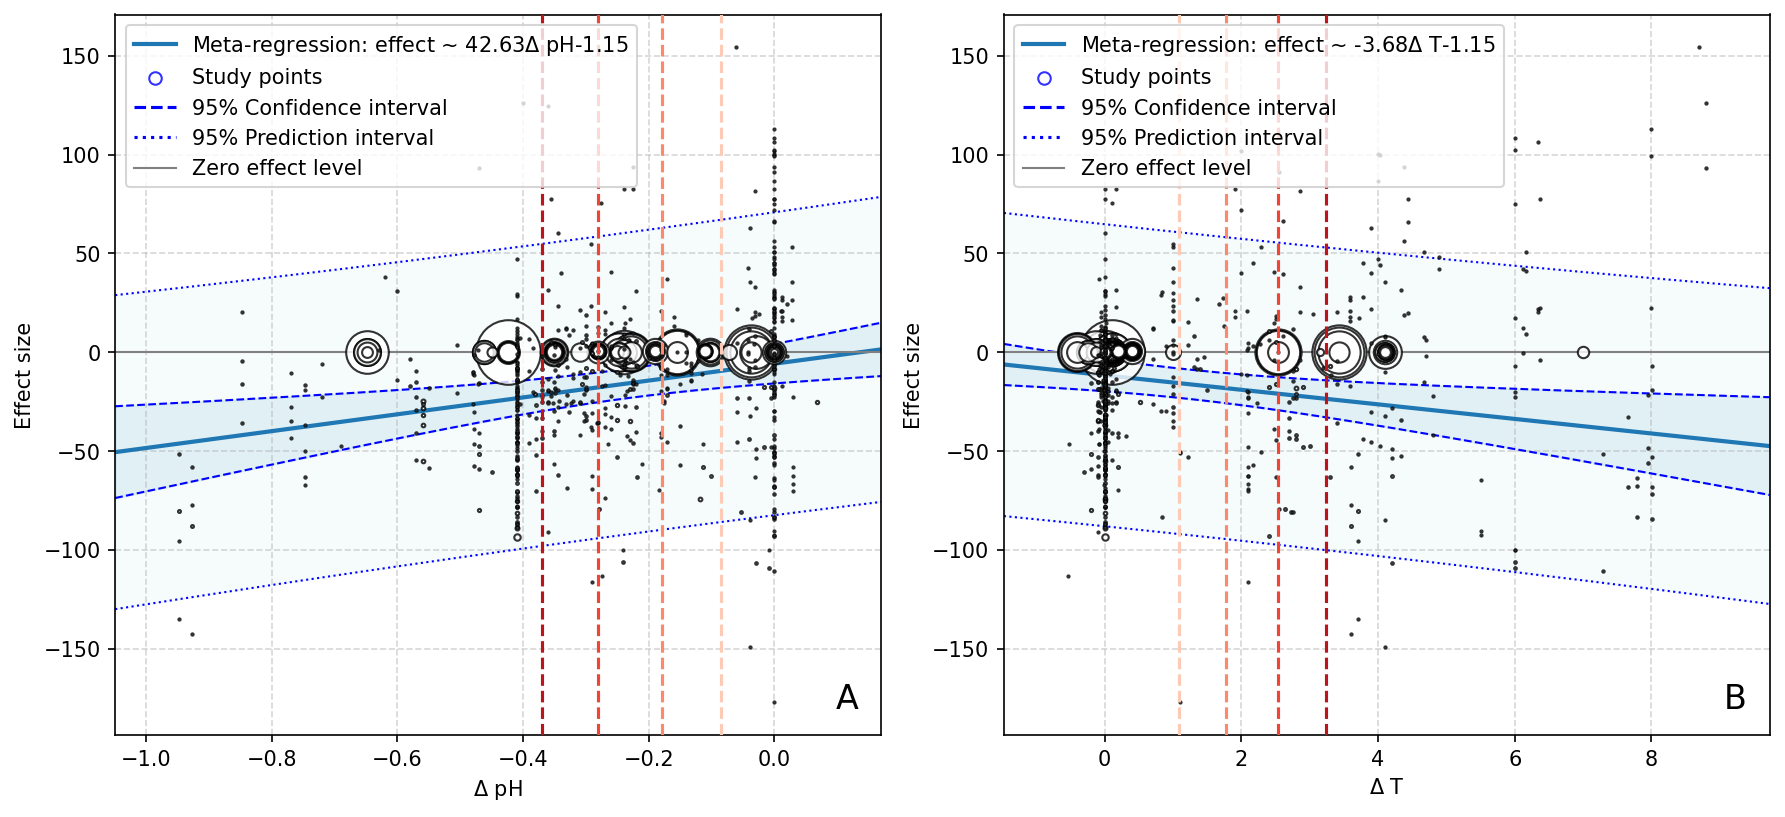

In [13]:
### CORAL
coral_model = meta_regression.MetaforModel(
    coral_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
).fit_model()

# plot regression
analysis_plot.plot_multiple_metaregression_axes(
    model=coral_model.model,
    x_axis_moderators=["delta_ph", "delta_t"],
    future_global_anomaly_df=global_future_anomaly_df,
)

INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph * delta_t
INFO:calcification.analysis.meta_regression:Model fitting complete.





Removed 4 outlier(s) (from 161 samples) based on Cook's distance threshold of 0.22

----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  217
Total samples of relevant investigation:  161
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 4
Final sample count: 157 (56 rows dropped)


(<Figure size 1800x900 with 2 Axes>,
 array([<Axes: xlabel='$\\Delta$ pH', ylabel='Effect size'>,
        <Axes: xlabel='$\\Delta$ T', ylabel='Effect size'>], dtype=object))

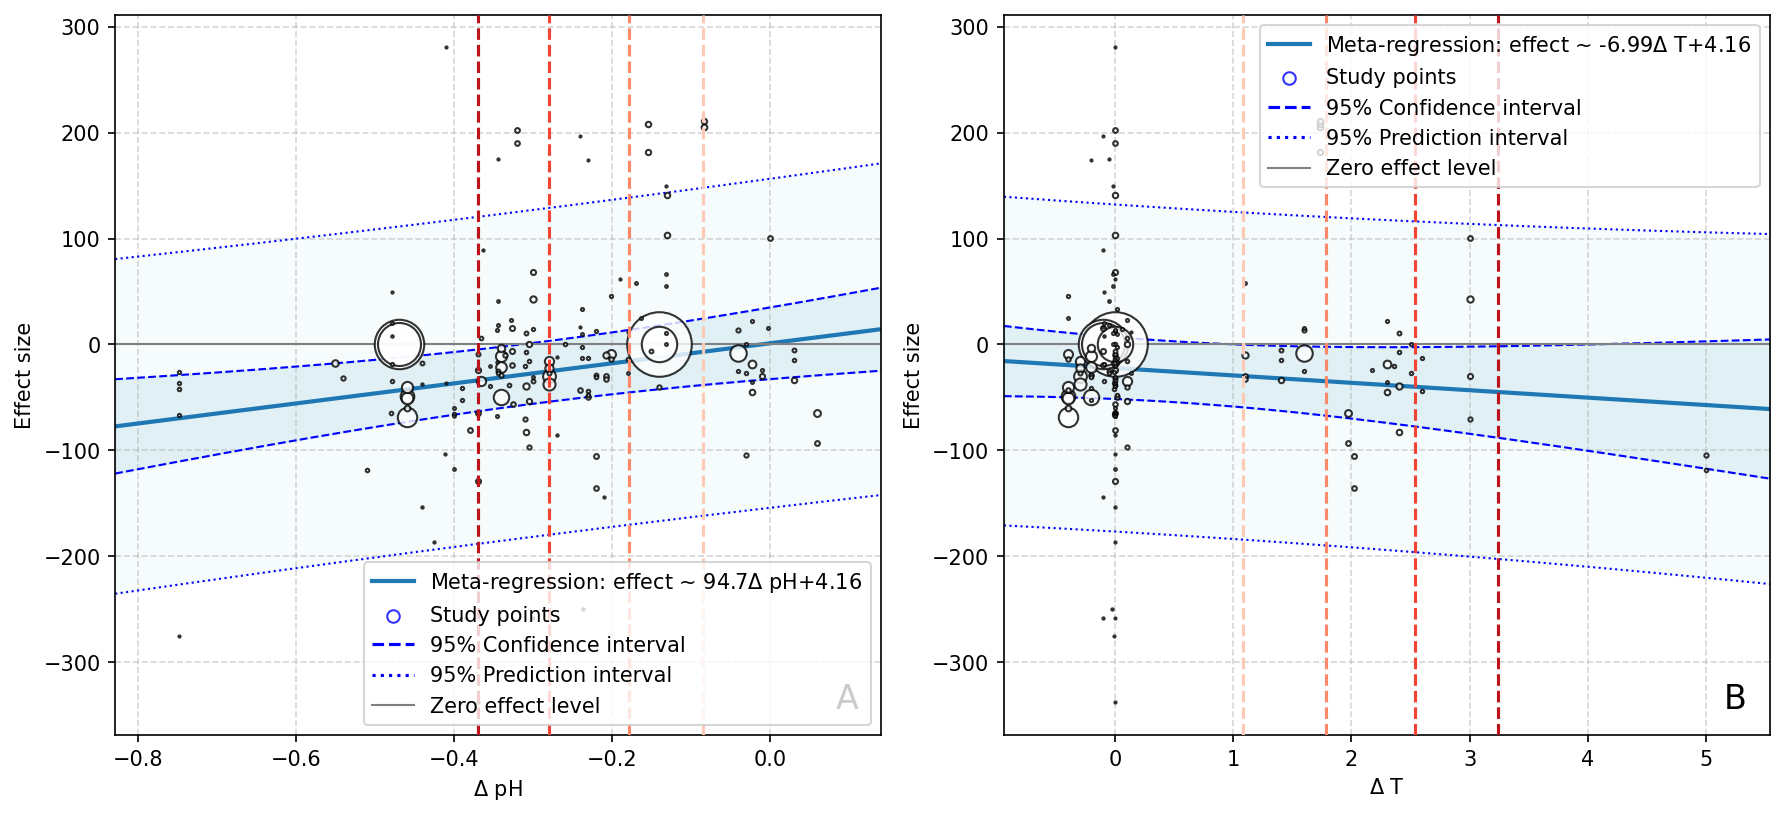

In [12]:
### CCA
cca_model = meta_regression.MetaforModel(
    cca_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
).fit_model()
# plot regression
analysis_plot.plot_multiple_metaregression_axes(
    model=cca_model.model,
    x_axis_moderators=["delta_ph", "delta_t"],
    future_global_anomaly_df=global_future_anomaly_df,
)

INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph * delta_t
INFO:calcification.analysis.meta_regression:Model fitting complete.



Removed 1 outlier(s) (from 21 samples) based on Cook's distance threshold of 0.65

----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  31
Total samples of relevant investigation:  21
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 1
Final sample count: 20 (10 rows dropped)


(<Figure size 1800x900 with 2 Axes>,
 array([<Axes: xlabel='$\\Delta$ pH', ylabel='Effect size'>,
        <Axes: xlabel='$\\Delta$ T', ylabel='Effect size'>], dtype=object))

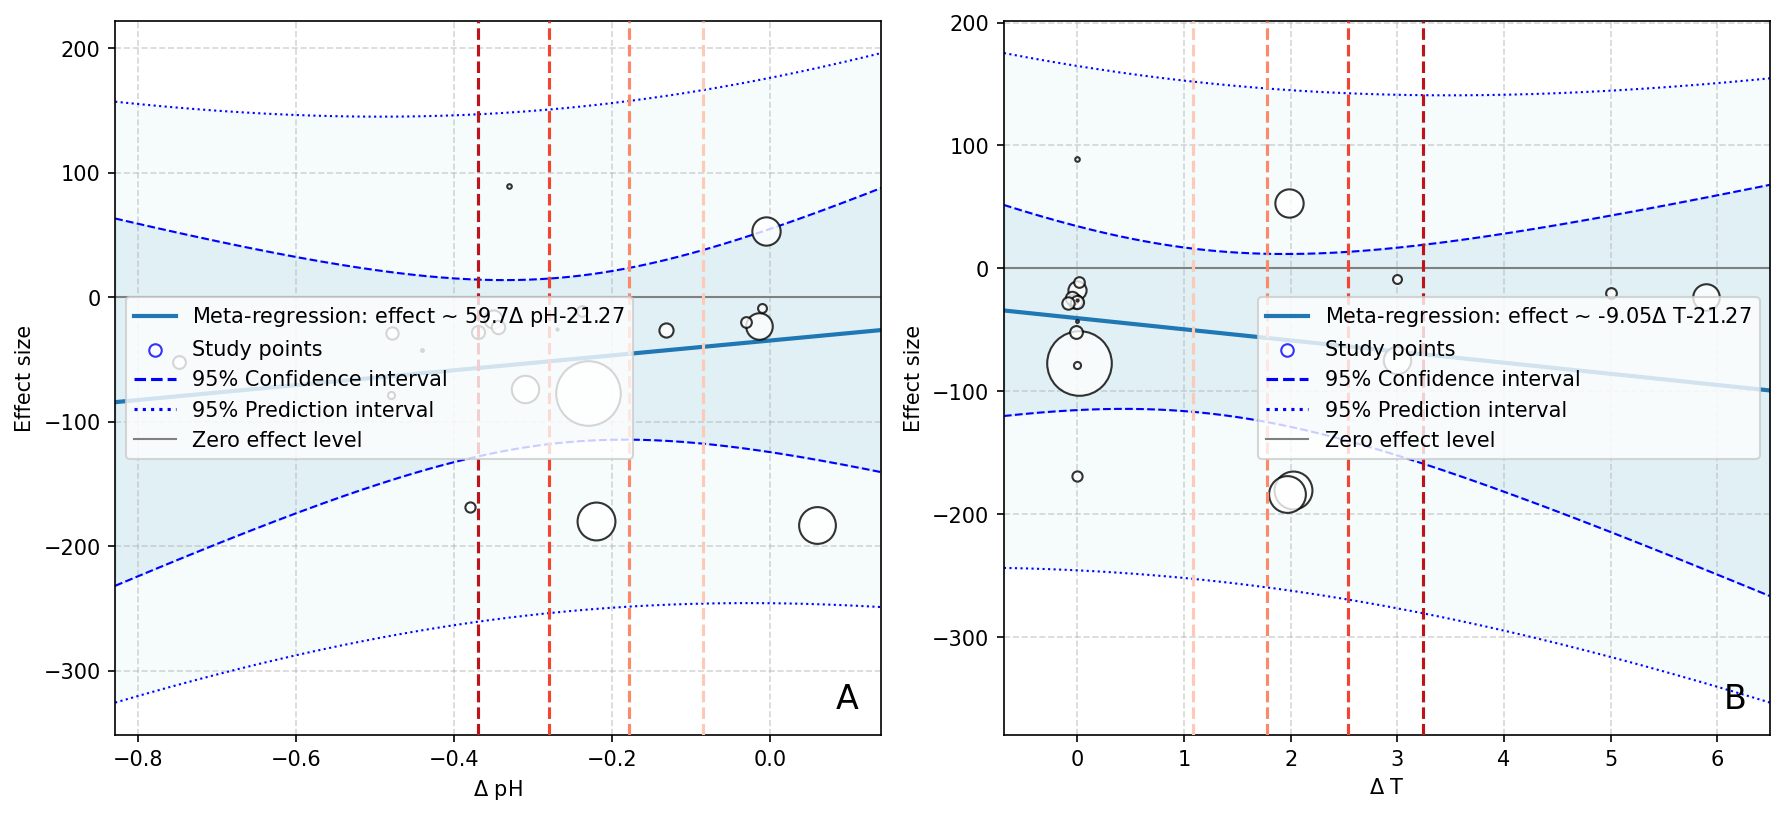

In [14]:
### OTHER ALGAE
other_algae_model = meta_regression.MetaforModel(
    other_algae_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
).fit_model()
# plot regression
analysis_plot.plot_multiple_metaregression_axes(
    model=other_algae_model.model,
    x_axis_moderators=["delta_ph", "delta_t"],
    future_global_anomaly_df=global_future_anomaly_df,
)

In [306]:
halimeda_effects_df.core_grouping.unique()


array(['Halimeda'], dtype=object)

(<Figure size 1800x900 with 2 Axes>,
 array([<Axes: xlabel='$\\Delta$ pH', ylabel='Effect size'>,
        <Axes: xlabel='$\\Delta$ T', ylabel='Effect size'>], dtype=object))

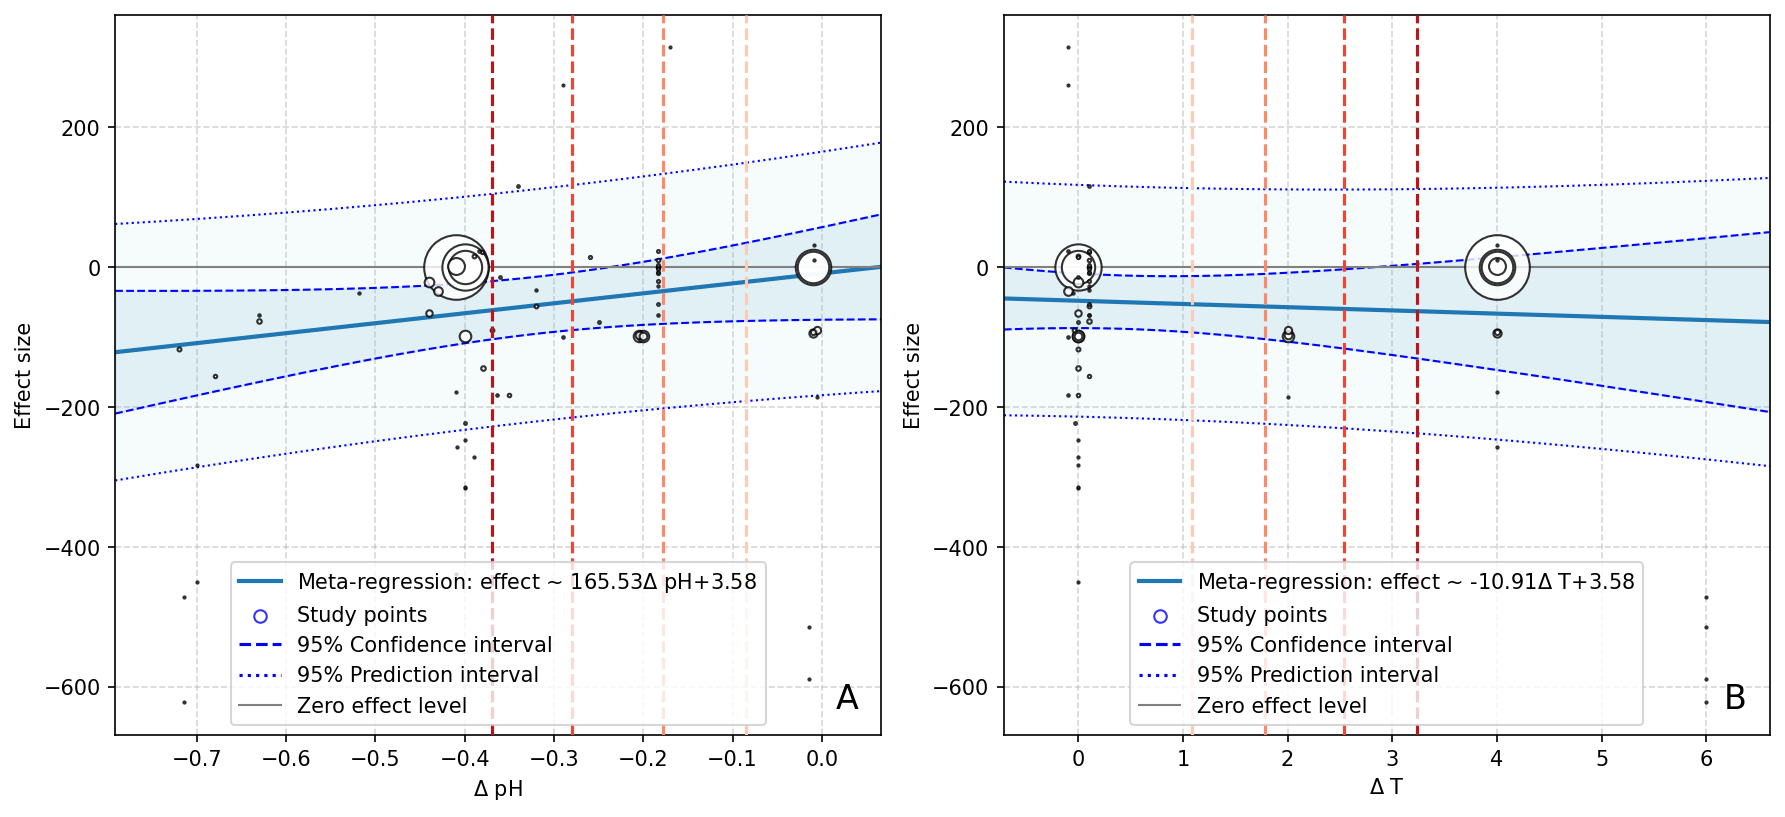

In [310]:
### HALIMEDA
# halimeda_model = meta_regression.MetaforModel(
#     halimeda_effects_df,
#     effect_type=effect_type,
#     treatment=["phtot", "temp", "phtot_temp_mv"],
#     formula=f"{effect_type} ~ delta_ph * delta_t",
# ).fit_model()
# plot regression
analysis_plot.plot_multiple_metaregression_axes(
    model=halimeda_model.model,
    x_axis_moderators=["delta_ph", "delta_t"],
    future_global_anomaly_df=global_future_anomaly_df,
    colorby=["core_grouping"],
)

In [ ]:
from calcification.plotting import plot_config

list(plot_config.CG_COLOURS.keys())

['Coral', 'CCA', 'Halimeda', 'Other algae', 'Foraminifera']

I want to be able to run the code and it plot the results automatically coloured by the core_groupings, if specified in the config
I also want to be able to run the code with a list of values supplied to the plot function representing different plot colours e.g.  

In [335]:
foraminifera_model.df


authors  calcification  \
263  Marques J.A.; de Barros Marangoni L.F.; Bianch...       0.035047   
264  Marques J.A.; de Barros Marangoni L.F.; Bianch...        0.03618   
265  Marques J.A.; de Barros Marangoni L.F.; Bianch...       0.037645   
275                                        Stuhr et al         0.0732   
276                                        Stuhr et al         0.0992   
277                                        Stuhr et al         0.2102   
473  Kinoshita S.; Kuroyanagi A.; Kawahata H.; Fuji...      15.333333   

     calcification_sd  calcification_se       calcification_unit  \
263          0.005723          0.000826                 mm day-1   
264          0.005825          0.000841                 mm day-1   
265          0.010385          0.001499                 mm day-1   
275          0.032736            0.0189       % surface area d-1   
276          0.020438            0.0118       % surface area d-1   
277          0.032736            0.0189       % surface area d-1   
473          3.847077              <NA>  μg day-1 (per specimen)   

     cleaned_coords   co3  co3_sd  co3_se                          coords  \
263            <NA>  <NA>    <NA>    <NA>                            <NA>   
264            <NA>  <NA>    <NA>    <NA>                            <NA>   
265            <NA>  <NA>    <NA>    <NA>                            <NA>   
275            <NA>  <NA>    <NA>    <NA>  24°44′41.67′′N, 80°46′55.82′′W   
276            <NA>  <NA>    <NA>    <NA>   24°45′8.33′′N, 80°45′26.33′′W   
277            <NA>  <NA>    <NA>    <NA>   6°07′13.66′′S, 39°09′43.08′′E   
473            <NA>  <NA>    <NA>    <NA>                            <NA>   

     ... treatment_calcification  treatment_calcification_sd  \
263  ...                0.035047                    0.005723   
264  ...                 0.03618                    0.005825   
265  ...                0.037645                    0.010385   
275  ...                  0.0732                    0.032736   
276  ...                  0.0992                    0.020438   
277  ...                  0.2102                    0.032736   
473  ...               15.333333                    3.847077   

     st_control_calcification  st_control_calcification_sd  \
263                  0.000037                     0.000019   
264                  0.000037                     0.000019   
265                  0.000037                     0.000019   
275                    0.6165                     0.151381   
276                    0.2457                     0.028579   
277                    0.4606                     0.143241   
473                  0.016833                     0.006595   

     st_treatment_calcification  st_treatment_calcification_sd  treatment_n  \
263                    0.000035                       0.000006           48   
264                    0.000036                       0.000006           48   
265                    0.000038                        0.00001           48   
275                      0.0732                       0.032736            3   
276                      0.0992                       0.020438            3   
277                      0.2102                       0.032736            3   
473                    0.015333                       0.003847            6   

    control_n   ID   cooks_d  
263        48  263  0.041145  
264        48  264  0.003421  
265        48  265  0.007202  
275         3  275  0.000275  
276         3  276  0.000202  
277         3  277  0.000090  
473         6  473  0.698647  

[7 rows x 118 columns]

In [320]:
### FORAMINIFERA (INSUFFICIENT DATA)
foraminifera_model = meta_regression.MetaforModel(
    foraminifera_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
).fit_model()
# # plot regression
# analysis_plot.plot_multiple_metaregression_axes(
#     model=foraminifera_model.model,
#     x_axis_moderators=["delta_ph", "delta_t"],
#     future_global_anomaly_df=global_future_anomaly_df,
#     point_fill_colors="core_grouping",
# )


INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph * delta_t
INFO:calcification.analysis.meta_regression:Model fitting complete.



Removed 1 outlier(s) (from 8 samples) based on Cook's distance threshold of 1.15

----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  8
Total samples of relevant investigation:  8
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 1
Final sample count: 7 (0 rows dropped)


In [ ]:
# # TODO. What would I want this to do?
# analysis_utils.summarize_metafor_models(
#     [
#         interaction_cg_model_summary,
#         coral_model_summary,
#         cca_model_summary,
#         other_algae_model_summary,
#         halimeda_model_summary,
#     ],
#     ["all", "coral", "CCA", "Other Algae", "Halimeda"],
# )


# Additional model exploration

### ANOVA model comparison

### Temperature and/or pH as categorical variables

### Temperature and/or pH as non-linear variables

In [363]:
delta_t_2 = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ poly(delta_t, 2)",
).fit_model()
delta_ph_2 = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ poly(delta_ph, 2)",
).fit_model()

INFO:root:Fitting metafor model with formula: st_relative_calcification ~ poly(delta_t, 2)



Removed 14 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.09

----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1239
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 14
Final sample count: 928 (297 rows dropped)


INFO:calcification.analysis.meta_regression:Model fitting complete.
INFO:root:Fitting metafor model with formula: st_relative_calcification ~ poly(delta_ph, 2)



Removed 14 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.09

----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1239
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 14
Final sample count: 928 (297 rows dropped)


INFO:calcification.analysis.meta_regression:Model fitting complete.


In [366]:
delta_t_2.get_model_summary()


Multivariate Meta-Analysis Model (k = 928; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4880.8259   9761.6519   9771.6519   9795.8008   9771.7172   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1683.3200  41.0283    114     no     original_doi 
sigma^2.2   938.6323  30.6371    928     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 925) = 64095.2156, p-val < .0001

Test of Moderators (coefficients 2:3):
QM(df = 2) = 10.5548, p-val = 0.0051

Model Results:

                    estimate       se     zval    pval      ci.lb     ci.ub 
intrcpt             -19.5953   4.4115  -4.4418  <.0001   -28.2418  -10.9488 
poly(delta_t, 2)1  -130.8807  63.3487  -2.0660  0.0388  -255.0418   -6.7196 
poly(delta_t, 2)2  -105.6406  46.6517  -2.2645  0.0235  -197.0762  -14.2050 
                       
intrcpt            *** 
poly(delta_t, 2)1    * 
poly(delta_t, 2)2    * 

---
Signif. codes:  0 ‘***’ 0.001 

In [372]:
data_df.columns[-40:]

Index(['taxa', 'temp', 'temp_sd', 'temp_se', 'year', 'treatment_group',
       'treatment_level_t', 'treatment_level_ph', 'irr_group', 'treatment',
       'delta_t', 'delta_ph', 'cohens_d', 'cohens_d_var', 'hedges_g',
       'hedges_g_var', 'relative_calcification', 'relative_calcification_var',
       'absolute_calcification', 'absolute_calcification_var',
       'st_relative_calcification', 'st_relative_calcification_var',
       'st_absolute_calcification', 'st_absolute_calcification_var',
       'control_temp', 'treatment_temp', 'control_phtot', 'treatment_phtot',
       'treatment_val', 'control_calcification', 'control_calcification_sd',
       'treatment_calcification', 'treatment_calcification_sd',
       'st_control_calcification', 'st_control_calcification_sd',
       'st_treatment_calcification', 'st_treatment_calcification_sd',
       'treatment_n', 'control_n', 'ID'],
      dtype='object')

In [405]:
mod_stats = analysis_plot.MetaRegressionResults(delta_t_2)._get_moderator_stats()
mod_stats

beta         se      zval      pval       ci.lb  \
moderator                                                                  
intrcpt            -19.595302   4.411544 -4.441824  0.000009  -28.241770   
poly(delta_t, 2)1 -130.880702  63.348680 -2.066037  0.038825 -255.041833   
poly(delta_t, 2)2 -105.640606  46.651673 -2.264455  0.023546 -197.076204   

                       ci.ub  
moderator                     
intrcpt           -10.948835  
poly(delta_t, 2)1  -6.719571  
poly(delta_t, 2)2 -14.205008

In [406]:
mod_stats["beta"].values

array([ -19.59530221, -130.88070201, -105.64060603])

(-400.0, 400.0)

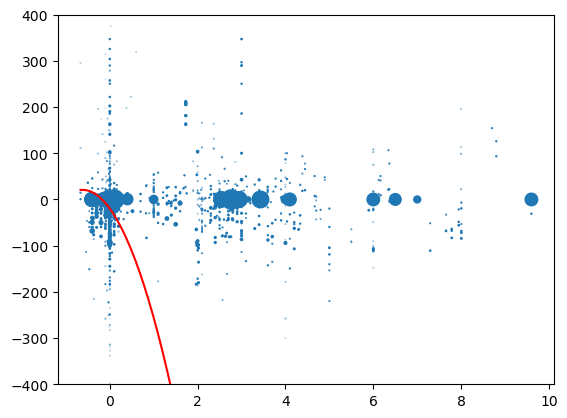

In [409]:
xs = data_df["delta_t"]
ys = data_df["st_relative_calcification"]

intrcpt, poly1, poly2 = mod_stats["beta"].values

# fit x^2 line
reg_xs = np.linspace(xs.min(), xs.max(), 100)
reg_ys = intrcpt + poly1 * reg_xs + poly2 * reg_xs**2

plt.scatter(xs, ys, s=np.sqrt(1 / data_df["st_relative_calcification_var"]) * 10)
plt.plot(reg_xs, reg_ys, color="red")

plt.ylim(-400, 400)

In [364]:
delta_ph_2.get_model_summary()



Multivariate Meta-Analysis Model (k = 928; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4865.6152   9731.2303   9741.2303   9765.3793   9741.2956   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1590.6765  39.8833    114     no     original_doi 
sigma^2.2   910.5030  30.1745    928     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 925) = 64055.2491, p-val < .0001

Test of Moderators (coefficients 2:3):
QM(df = 2) = 41.7170, p-val < .0001

Model Results:

                    estimate       se     zval    pval      ci.lb     ci.ub 
intrcpt             -19.6309   4.3035  -4.5616  <.0001   -28.0656  -11.1963 
poly(delta_ph, 2)1  285.4439  53.8406   5.3017  <.0001   179.9183  390.9694 
poly(delta_ph, 2)2  -90.0243  49.4211  -1.8216  0.0685  -186.8880    6.8393 
                        
intrcpt             *** 
poly(delta_ph, 2)1  *** 
poly(delta_ph, 2)2    . 

---
Signif. codes:  0 ‘***’ 0.0

In [ ]:
effect_type = "st_relative_calcification"  # redefine: can be played around with

# assign categorial levels to delta_t: <0.5 no change, 0.5-1.5 low, 1.5-2.5 medium, >2.5 high
data_df["delta_t_category"] = data_df["delta_t"].apply(
    processing.assign_delta_t_category
)
print(data_df["delta_t_category"].value_counts())

# process single_control_df for r
single_control_df = data_df[
    data_df["treatment"].isin(["phtot", "temp", "phtot_temp_mv"])
].copy()
df_r_ready = analysis.process_df_for_r(single_control_df)

# Convert pandas dataframe to R dataframe
r_data = pandas2ri.py2rpy(df_r_ready)

### Initialisation and ANOVAs

In [26]:
### INITIAL NAIVE MODELS

model1 = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph + delta_t",
    # verbose=False,
).fit_model()
model2 = meta_regression.MetaforModel(
    data_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
).fit_model()
# model3 = meta_regression.MetaforModel(
#     data_df,
#     effect_type=effect_type,
#     treatment=["phtot", "temp", "phtot_temp_mv"],
#     formula=f"{effect_type} ~ factor(core_grouping)",
# ).fit_model()
# model4 = meta_regression.MetaforModel(
#     data_df,
#     effect_type=effect_type,
#     treatment=["phtot", "temp", "phtot_temp_mv"],
#     formula=f"{effect_type} ~ factor(core_grouping) + delta_ph",
# ).fit_model()
# model5 = meta_regression.MetaforModel(
#     data_df,
#     effect_type=effect_type,
#     treatment=["phtot", "temp", "phtot_temp_mv"],
#     formula=f"{effect_type} ~ factor(core_grouping) + delta_t",
# ).fit_model()
# model6 = meta_regression.MetaforModel(
#     data_df,
#     effect_type=effect_type,
#     treatment=["phtot", "temp", "phtot_temp_mv"],
#     formula=f"{effect_type} ~ factor(core_grouping) + delta_ph + delta_t",
# ).fit_model(verbose=False)
# model7 = meta_regression.MetaforModel(
#     data_df,
#     effect_type=effect_type,
#     treatment=["phtot", "temp", "phtot_temp_mv"],
#     formula=f"{effect_type} ~ factor(core_grouping) + delta_ph * delta_t",
# ).fit_model()

INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph + delta_t



Removed 13 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.11

----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1239
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 13
Final sample count: 929 (297 rows dropped)


INFO:calcification.analysis.meta_regression:Model fitting complete.
INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph * delta_t



Removed 14 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.09

----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1239
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Dropped due to Cook's distance: 14
Final sample count: 928 (297 rows dropped)


INFO:calcification.analysis.meta_regression:Model fitting complete.


In [27]:
import rpy2

metafor = rpy2.robjects.packages.importr("metafor")
### experimental anovas
# anova_add_int = metafor.anova_rma(model1.model, model2.model)  # additive vs interactive
# TODO: can't compare since k different by 1 due to Cook's distance filtering

## Predicting on climate anomalies

(<Figure size 2700x750 with 2 Axes>,
 array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object))

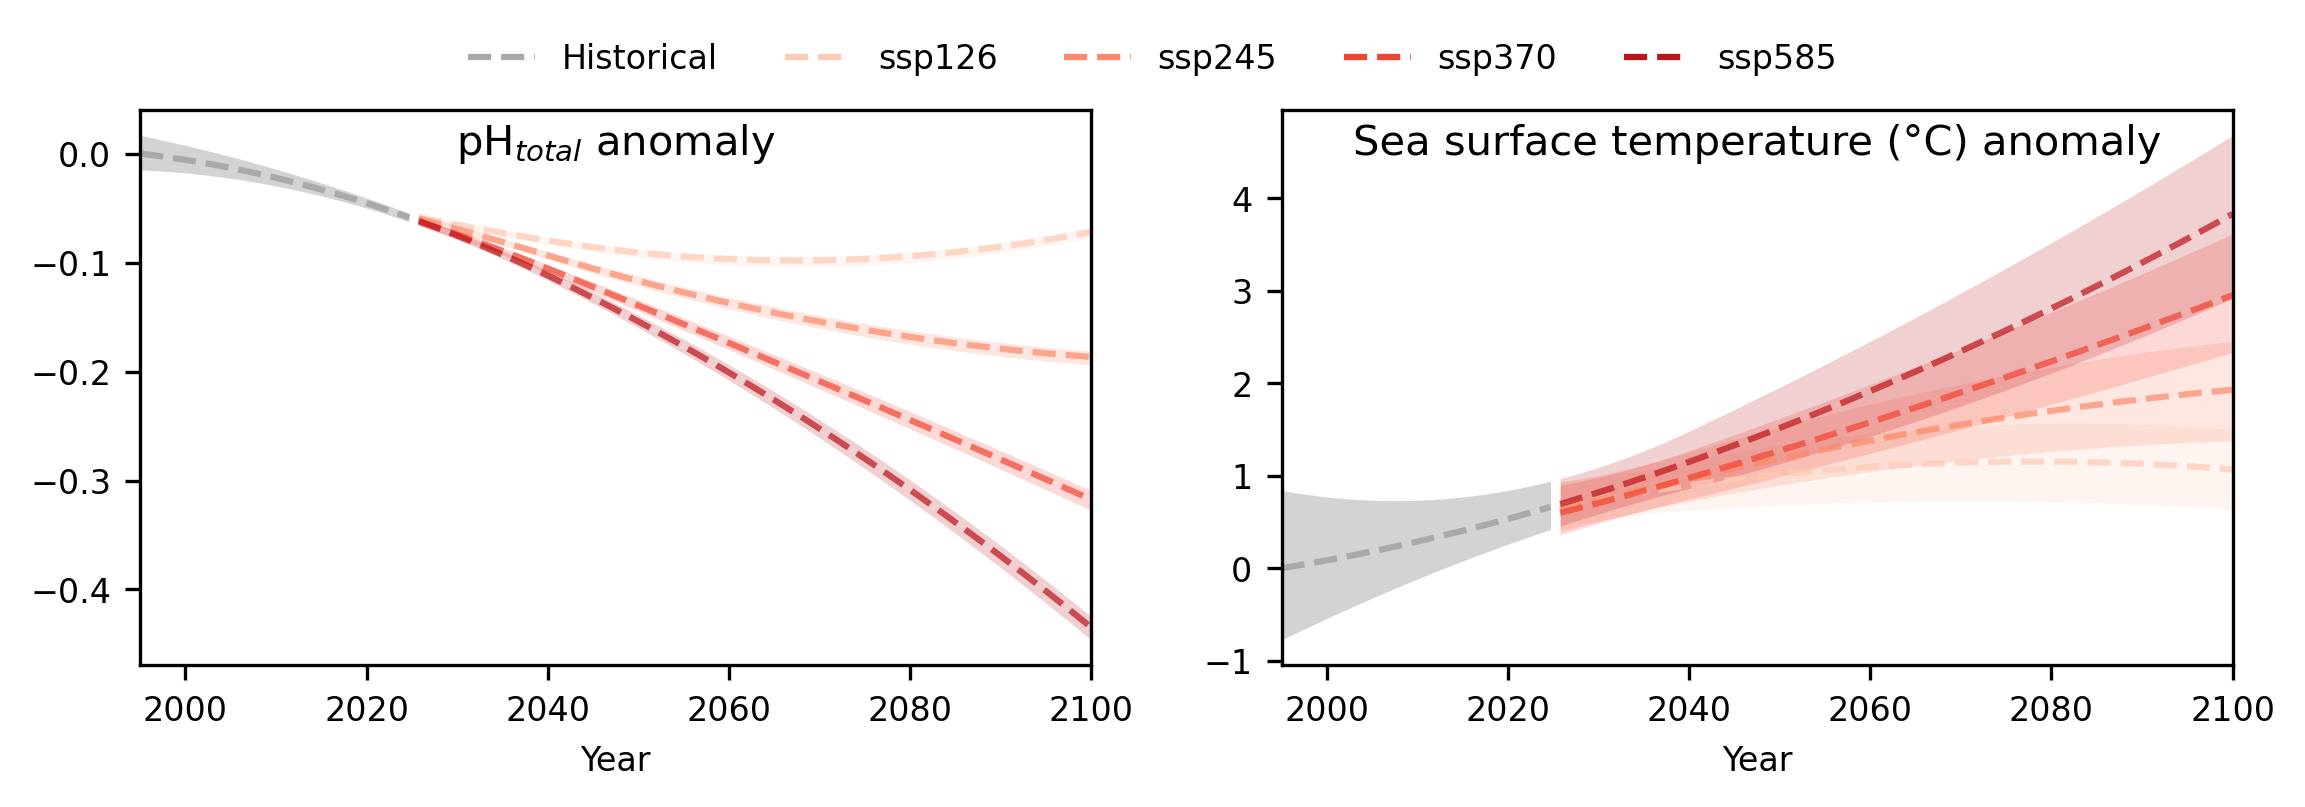

In [82]:
### plot temporal anomalies
climatology.plot_climate_anomalies(
    global_anomaly_df,
    plot_vars=["ph", "sst"],
    figsize=(9, 2.5),
    dpi=300,
)

INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph * delta_t
INFO:calcification.analysis.meta_regression:Model fitting complete.




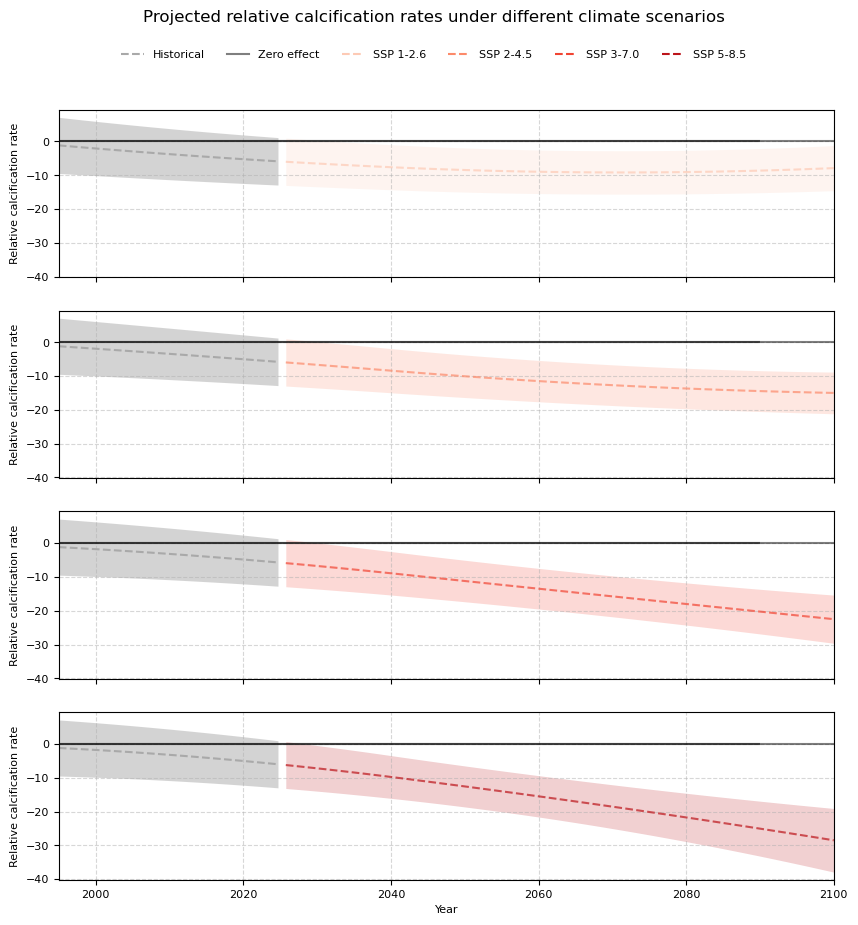

In [152]:
### CORAL
coral_model = meta_regression.MetaforModel(
    coral_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
    verbose=False,
).fit_model()

coral_prediction_df = meta_regression.prediction_df_from_model(
    coral_model.model,
    ["delta_ph", "delta_t"],
    global_anomaly_df[["anomaly_value_ph", "anomaly_value_sst"]].values.T,
    npoints=len(global_anomaly_df),
)

climatology.plot_global_timeseries(
    pd.concat([global_anomaly_df, coral_prediction_df], axis=1)
);


INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph * delta_t
INFO:calcification.analysis.meta_regression:Model fitting complete.




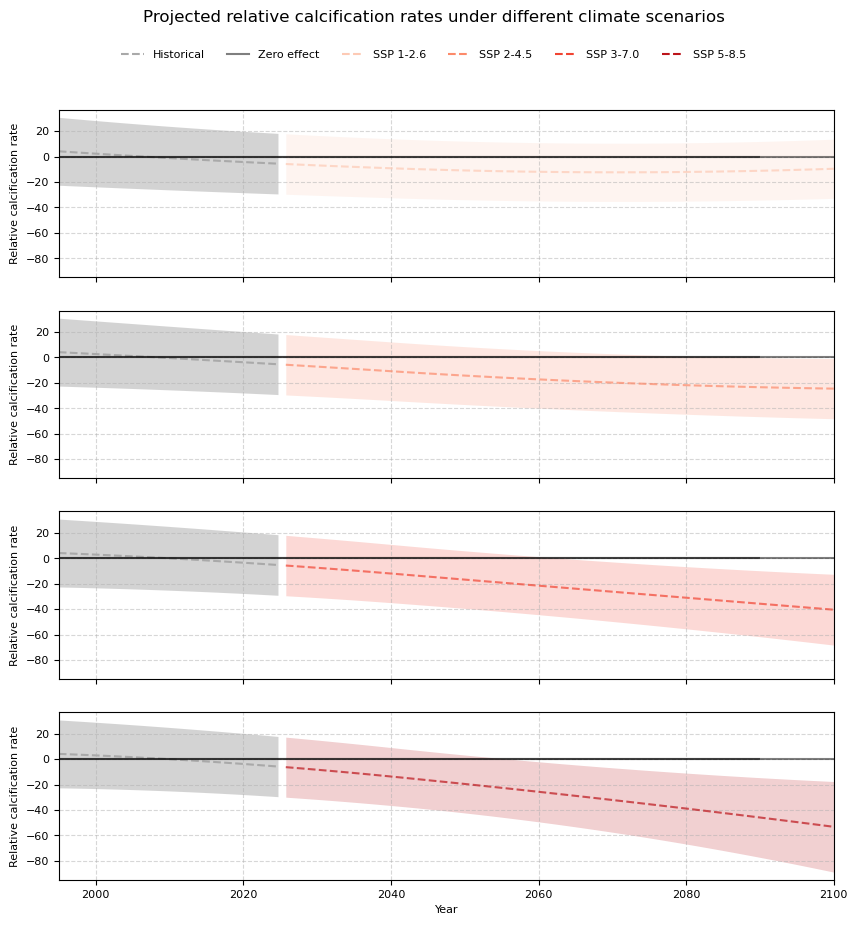

In [153]:
### CCA
cca_model = meta_regression.MetaforModel(
    cca_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
    verbose=False,
).fit_model()

cca_prediction_df = meta_regression.prediction_df_from_model(
    cca_model.model,
    ["delta_ph", "delta_t"],
    global_anomaly_df[["anomaly_value_ph", "anomaly_value_sst"]].values.T,
    npoints=len(global_anomaly_df),
)

climatology.plot_global_timeseries(
    pd.concat([global_anomaly_df, cca_prediction_df], axis=1)
);


INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph * delta_t
INFO:calcification.analysis.meta_regression:Model fitting complete.


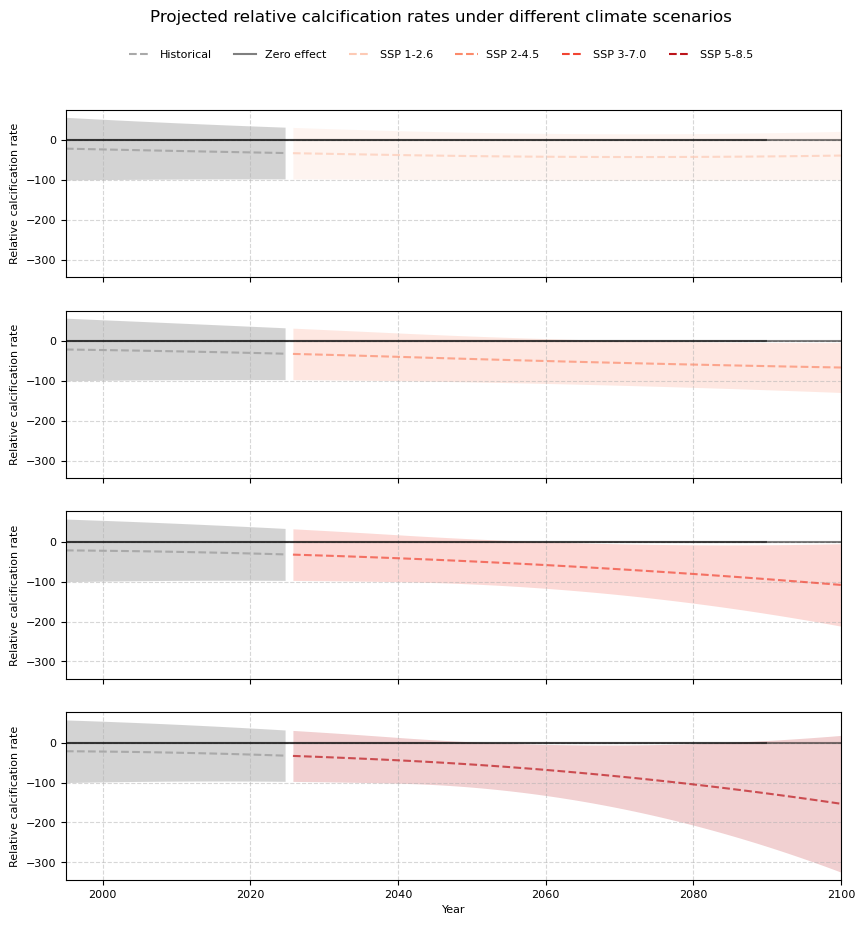

In [154]:
### OTHER ALGAE
other_algae_model = meta_regression.MetaforModel(
    other_algae_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
    verbose=False,
).fit_model()

other_algae_prediction_df = meta_regression.prediction_df_from_model(
    other_algae_model.model,
    ["delta_ph", "delta_t"],
    global_anomaly_df[["anomaly_value_ph", "anomaly_value_sst"]].values.T,
    npoints=len(global_anomaly_df),
)

climatology.plot_global_timeseries(
    pd.concat([global_anomaly_df, other_algae_prediction_df], axis=1)
);


INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph * delta_t
INFO:calcification.analysis.meta_regression:Model fitting complete.




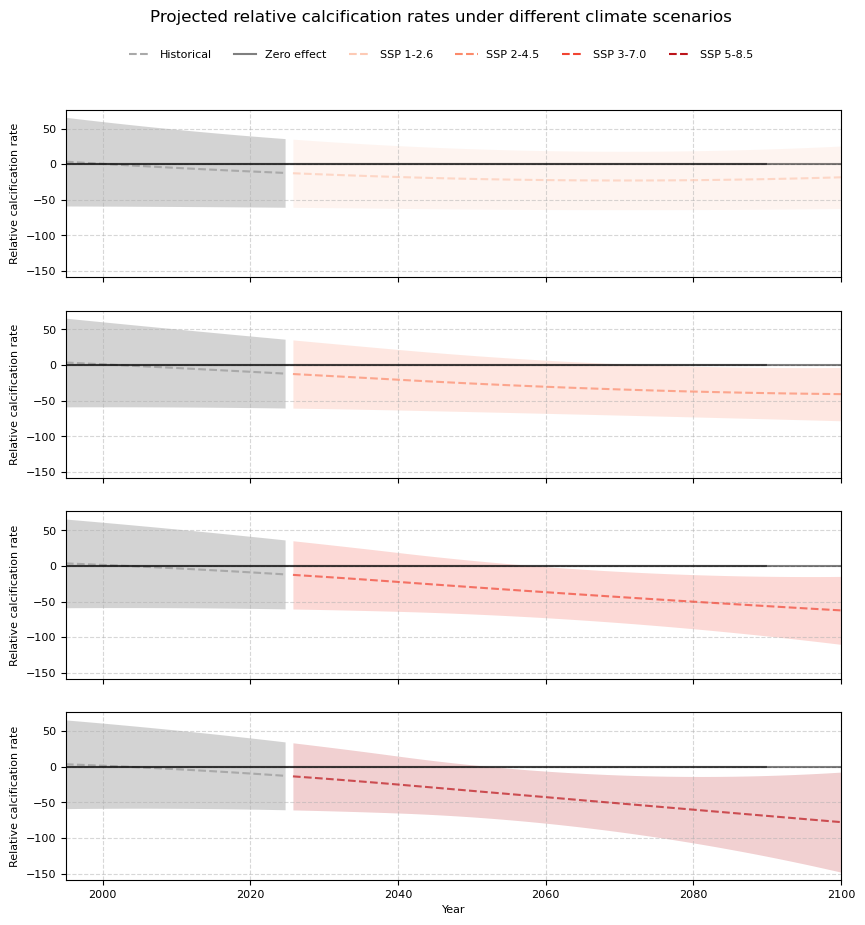

In [155]:
### HALIMEDA
halimeda_model = meta_regression.MetaforModel(
    halimeda_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
    verbose=False,
).fit_model()

halimeda_prediction_df = meta_regression.prediction_df_from_model(
    halimeda_model.model,
    ["delta_ph", "delta_t"],
    global_anomaly_df[["anomaly_value_ph", "anomaly_value_sst"]].values.T,
    npoints=len(global_anomaly_df),
)

climatology.plot_global_timeseries(
    pd.concat([global_anomaly_df, halimeda_prediction_df], axis=1)
);


INFO:root:Fitting metafor model with formula: st_relative_calcification ~ delta_ph * delta_t
INFO:calcification.analysis.meta_regression:Model fitting complete.




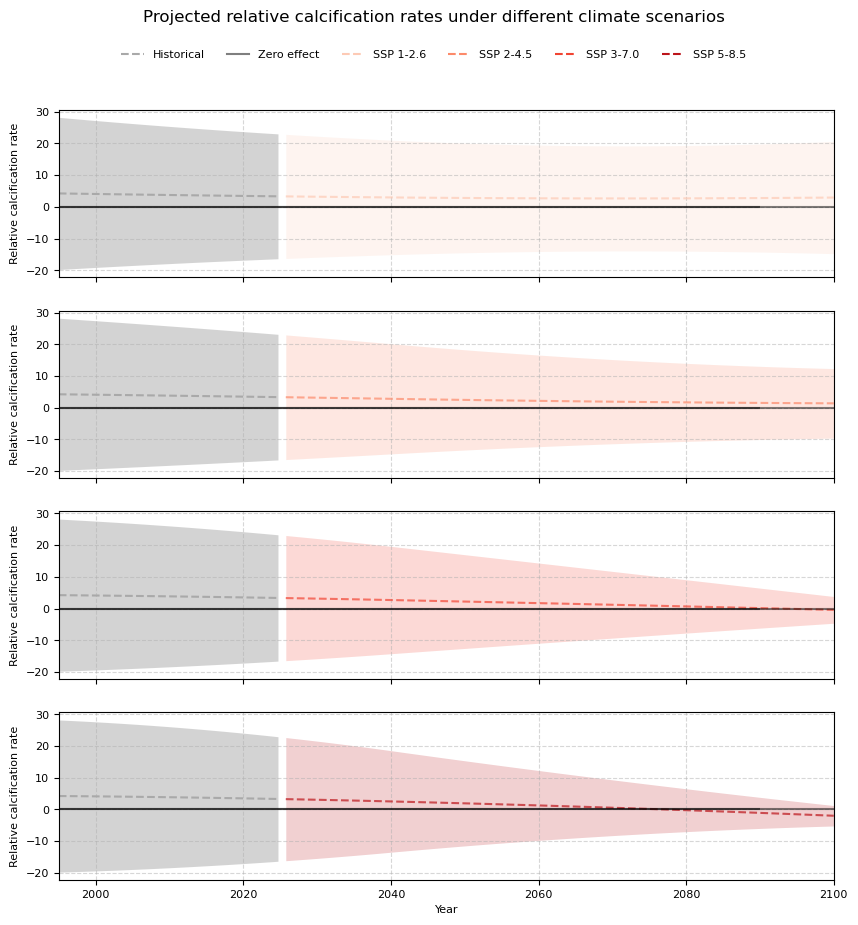

In [156]:
### FORAMINIFERA
foraminifera_model = meta_regression.MetaforModel(
    foraminifera_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
    verbose=False,
).fit_model()

foraminifera_prediction_df = meta_regression.prediction_df_from_model(
    foraminifera_model.model,
    ["delta_ph", "delta_t"],
    global_anomaly_df[["anomaly_value_ph", "anomaly_value_sst"]].values.T,
    npoints=len(global_anomaly_df),
)

climatology.plot_global_timeseries(
    pd.concat([global_anomaly_df, foraminifera_prediction_df], axis=1)
);


(<Figure size 3000x3000 with 4 Axes>,
 array([<Axes: ylabel='Relative calcification rate'>,
        <Axes: ylabel='Relative calcification rate'>,
        <Axes: ylabel='Relative calcification rate'>,
        <Axes: xlabel='Year', ylabel='Relative calcification rate'>],
       dtype=object))

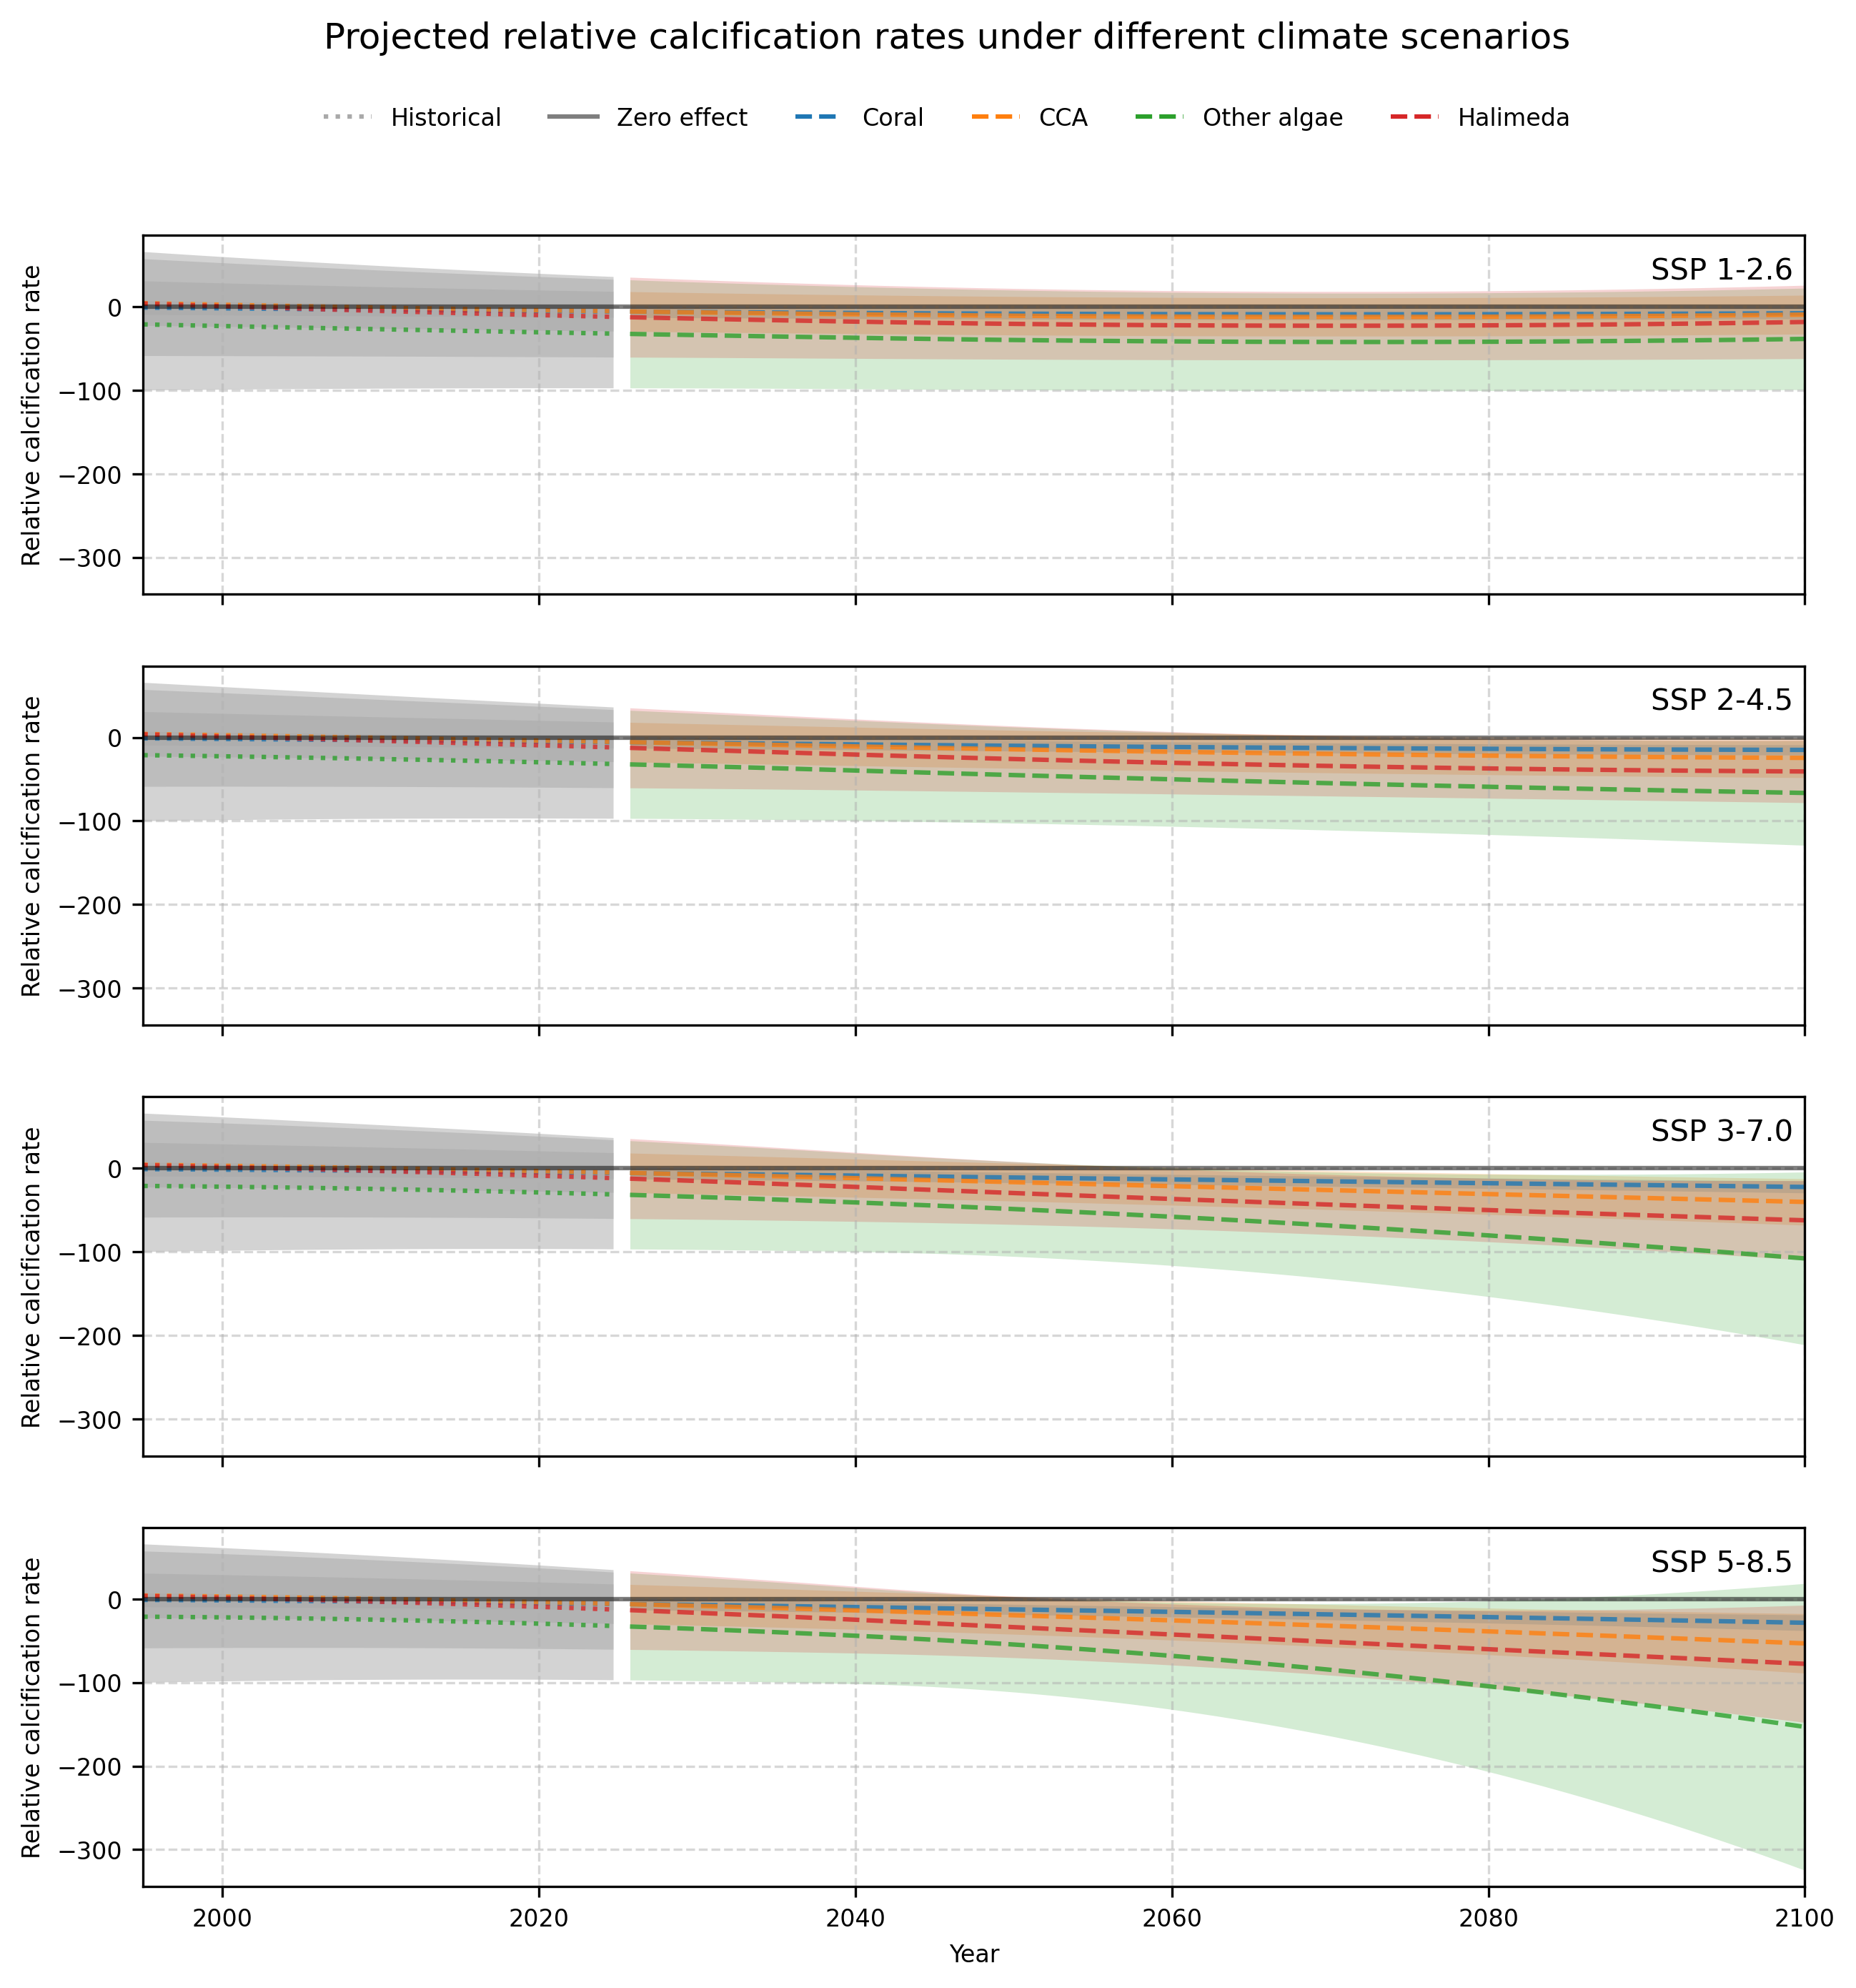

In [145]:
analysis_plot.plot_global_timeseries_multi(
    groups={
        "Coral": pd.concat([global_anomaly_df, coral_prediction_df], axis=1),
        "CCA": pd.concat([global_anomaly_df, cca_prediction_df], axis=1),
        "Other algae": pd.concat(
            [global_anomaly_df, other_algae_prediction_df], axis=1
        ),
        "Halimeda": pd.concat([global_anomaly_df, halimeda_prediction_df], axis=1),
    },
    figsize=(10, 10),
    dpi=300,
)


In [146]:
predictions_bioerosion_df = pd.read_csv(
    config.tmp_data_dir / "bioerosion_predictions.csv"
)

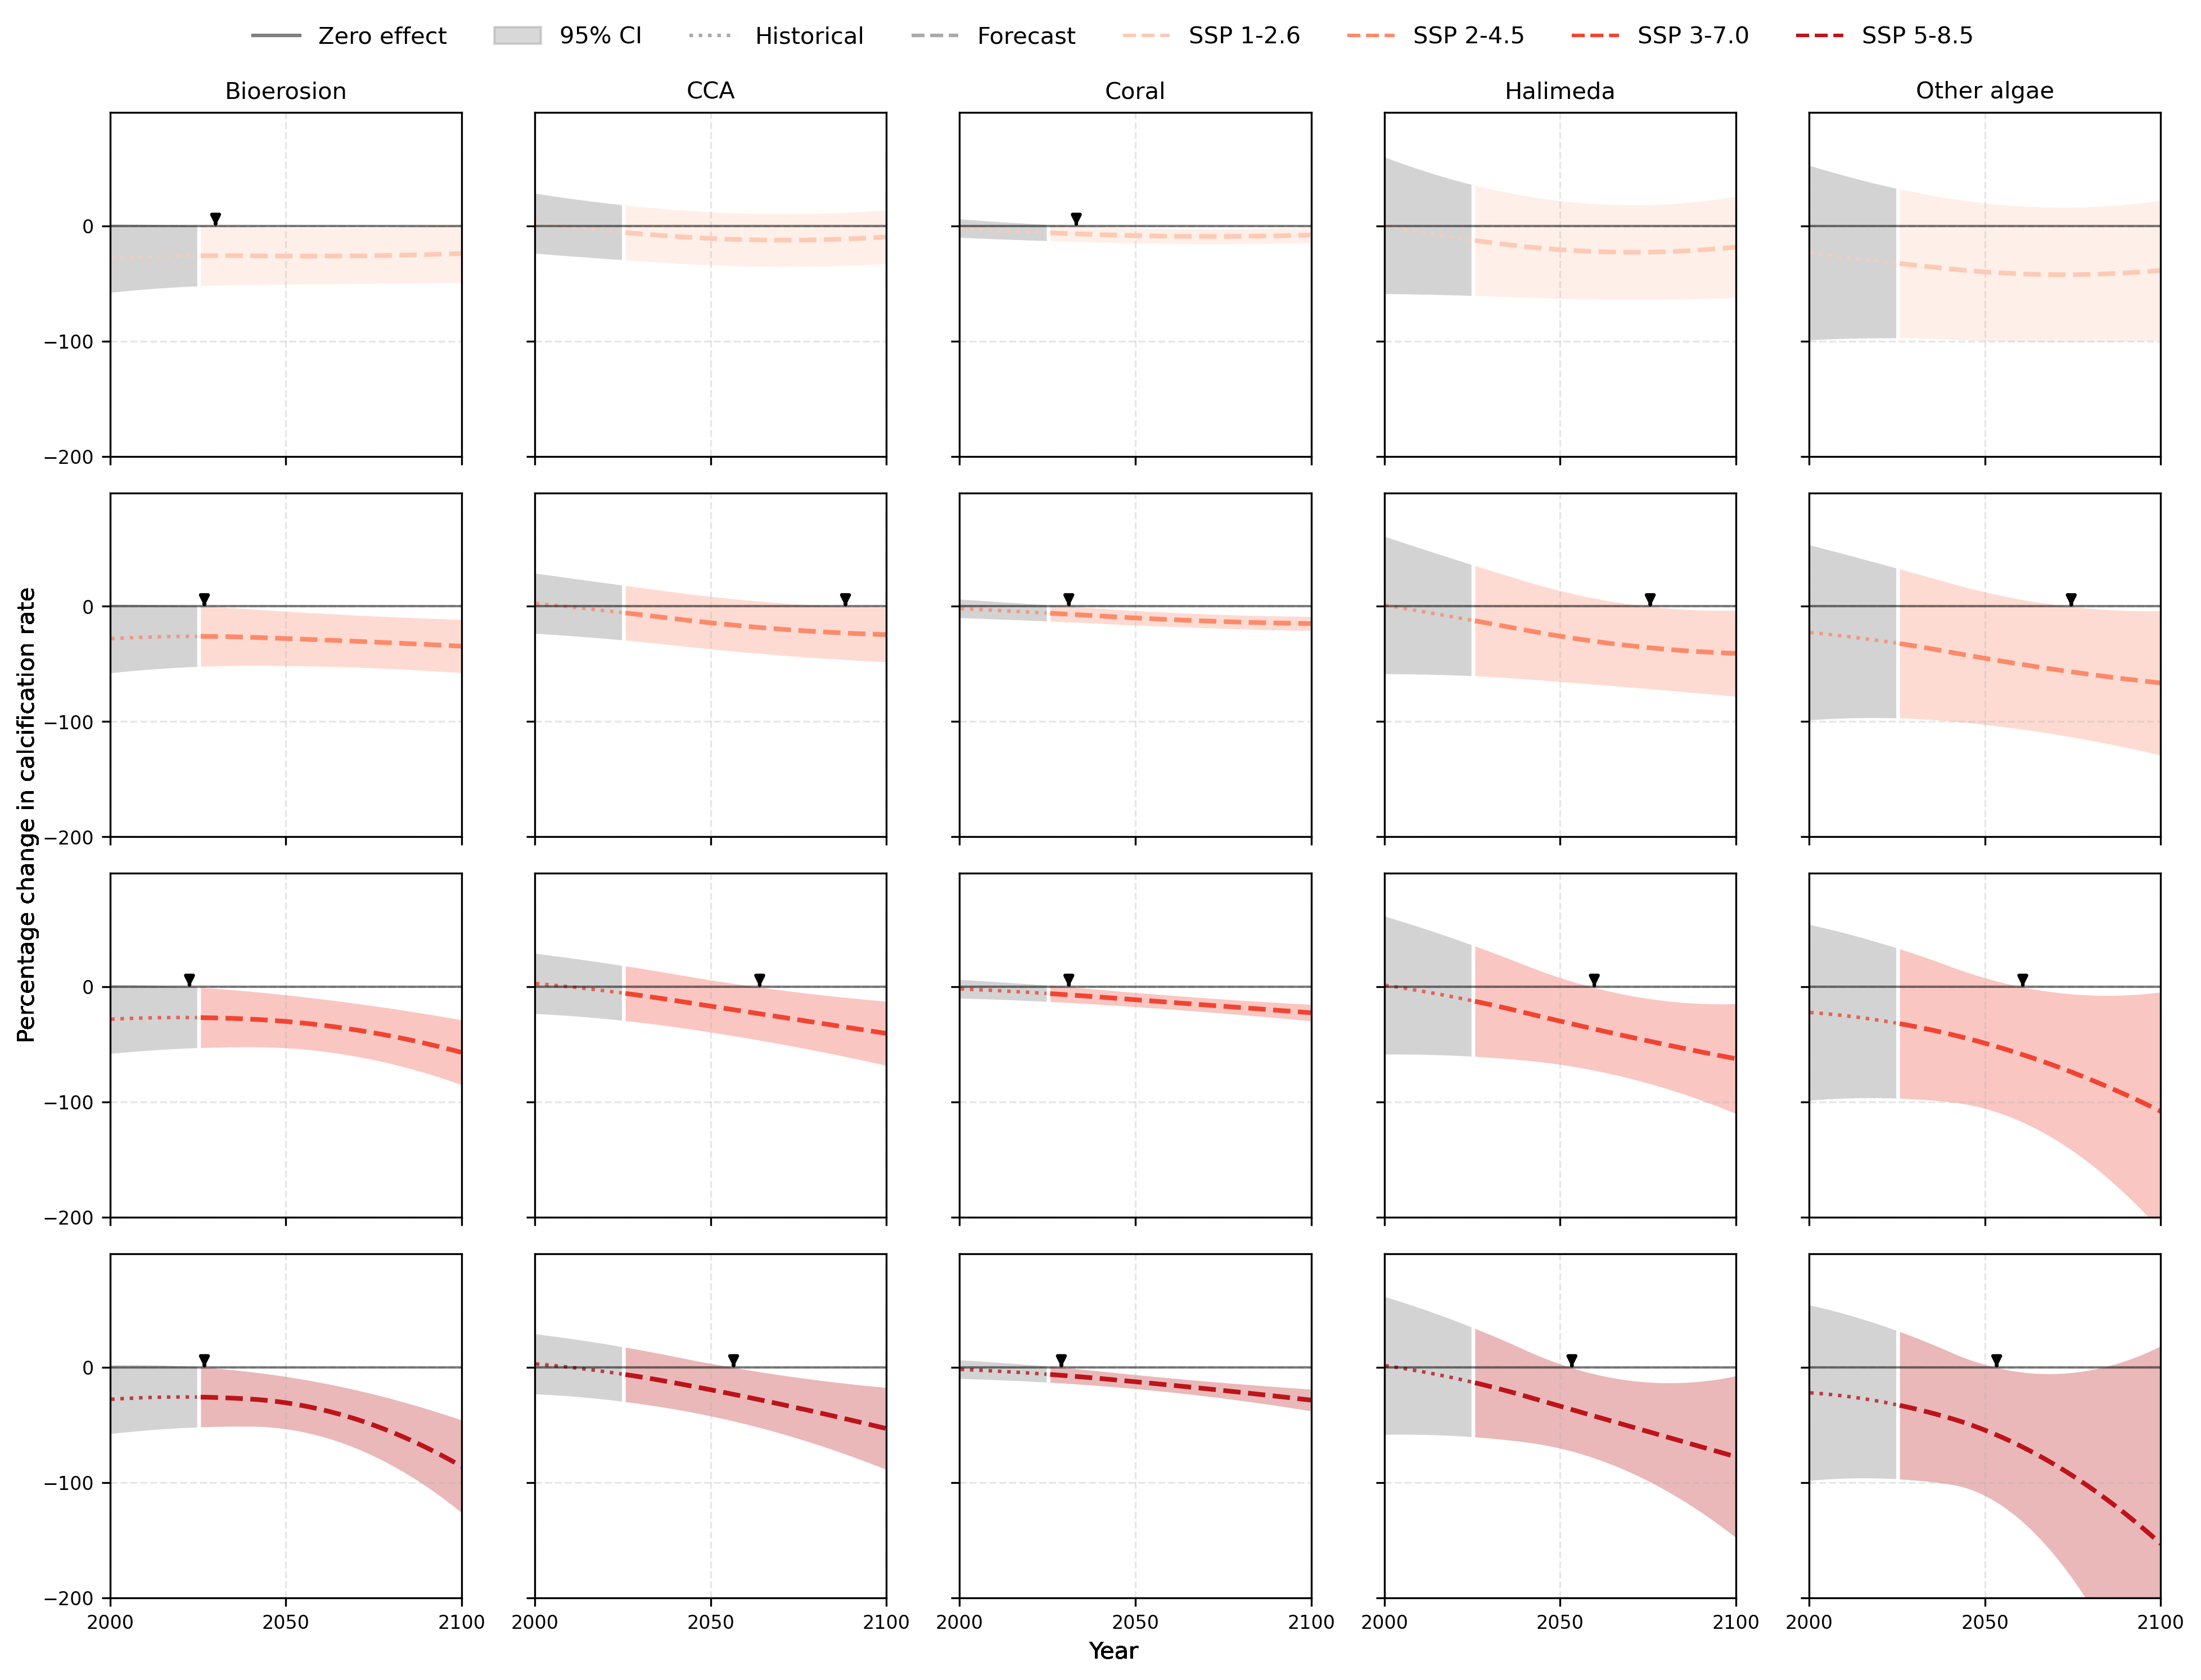

In [147]:
# Call the function with your data
fig, axes = analysis_plot.plot_global_timeseries_grid(
    groups={
        "Bioerosion": predictions_bioerosion_df,
        "CCA": pd.concat([global_anomaly_df, cca_prediction_df], axis=1),
        "Coral": pd.concat([global_anomaly_df, coral_prediction_df], axis=1),
        "Halimeda": pd.concat([global_anomaly_df, halimeda_prediction_df], axis=1),
        "Other algae": pd.concat(
            [global_anomaly_df, other_algae_prediction_df], axis=1
        ),
    },
    figsize=(13, 10),
    dpi=300,
)

plt.show()

# Burning embers plots

#### General processing

In [220]:
all_preds_df = pd.concat([global_anomaly_df, coral_prediction_df], axis=1)[
    join_cols
].copy()
for predictions_df, core_grouping in zip(
    [
        pd.concat([global_anomaly_df, coral_prediction_df], axis=1),
        pd.concat([global_anomaly_df, cca_prediction_df], axis=1),
        pd.concat([global_anomaly_df, other_algae_prediction_df], axis=1),
        pd.concat([global_anomaly_df, halimeda_prediction_df], axis=1),
    ],
    ["Coral", "CCA", "Other algae", "Halimeda"],
):
    # append "_{core_grouping}" to the column names in predictions_df which are not in join_cols
    predictions_df = predictions_df.rename(
        columns={
            col: f"{col}_{core_grouping.lower().replace(' ', '_')}"
            for col in predictions_df.columns
            if col not in join_cols
        }
    )
    # Merge the predictions_df with emissions_data on the join_cols
    all_preds_df = pd.merge(
        all_preds_df, predictions_df, how="left", left_on=join_cols, right_on=join_cols
    )
all_preds_df

scenario  time_frame percentile  anomaly_value_ph  anomaly_value_sst  \
0    ssp126        1995       mean          0.000000           0.000000   
1    ssp126        1995        p10         -0.014973          -0.775318   
2    ssp126        1995        p90          0.016695           0.841371   
3    ssp126        2030       mean         -0.065376           0.746557   
4    ssp126        2030        p10         -0.068670           0.510103   
5    ssp126        2030        p90         -0.061734           0.992532   
6    ssp126        2050       mean         -0.090735           1.012837   
7    ssp126        2050        p10         -0.095207           0.681997   
8    ssp126        2050        p90         -0.087339           1.328160   
9    ssp126        2090       mean         -0.085389           1.126883   
10   ssp126        2090        p10         -0.090920           0.688199   
11   ssp126        2090        p90         -0.081668           1.555840   
12   ssp245        1995       mean          0.000000           0.000000   
13   ssp245        1995        p10         -0.014973          -0.775318   
14   ssp245        1995        p90          0.016695           0.841371   
15   ssp245        2030       mean         -0.069216           0.738440   
16   ssp245        2030        p10         -0.072611           0.504939   
17   ssp245        2030        p90         -0.065982           1.004632   
18   ssp245        2050       mean         -0.116822           1.184204   
19   ssp245        2050        p10         -0.121471           0.896435   
20   ssp245        2050        p90         -0.112343           1.527244   
21   ssp245        2090       mean         -0.179005           1.826185   
22   ssp245        2090        p10         -0.186079           1.331970   
23   ssp245        2090        p90         -0.173297           2.328407   
24   ssp370        1995       mean          0.000000           0.000000   
25   ssp370        1995        p10         -0.014973          -0.775318   
26   ssp370        1995        p90          0.016695           0.841371   
27   ssp370        2030       mean         -0.074166           0.704350   
28   ssp370        2030        p10         -0.077865           0.485398   
29   ssp370        2030        p90         -0.070995           0.983838   
30   ssp370        2050       mean         -0.139370           1.269519   
31   ssp370        2050        p10         -0.144514           0.989795   
32   ssp370        2050        p90         -0.134295           1.619746   
33   ssp370        2090       mean         -0.280656           2.585553   
34   ssp370        2090        p10         -0.289678           2.047158   
35   ssp370        2090        p90         -0.272628           3.181072   
36   ssp585        1995       mean          0.000000           0.000000   
37   ssp585        1995        p10         -0.014973          -0.775318   
38   ssp585        1995        p90          0.016695           0.841371   
39   ssp585        2030       mean         -0.075318           0.819823   
40   ssp585        2030        p10         -0.078902           0.585447   
41   ssp585        2030        p90         -0.071935           1.089704   
42   ssp585        2050       mean         -0.154074           1.515750   
43   ssp585        2050        p10         -0.159908           1.128145   
44   ssp585        2050        p90         -0.148260           1.955172   
45   ssp585        2090       mean         -0.369377           3.301326   
46   ssp585        2090        p10         -0.379987           2.497992   
47   ssp585        2090        p90         -0.359845           4.085569   

    pred_coral  se_coral  ci.lb_coral  ci.ub_coral  pi.lb_coral  ...  \
0    -1.152737  4.237683    -9.458443     7.152968   -59.184361  ...   
1     1.027540  4.603129    -7.994427    10.049508   -57.110919  ...   
2    -3.587624  3.923073   -11.276706     4.101459   -61.534207  ...   
3    -6.529844  3.512253   -13.413734  

In [157]:
# TODO: finish plotting this
### combine all predictions into a single dataframe
join_cols = [
    "scenario",
    "time_frame",
    "percentile",
    "anomaly_value_ph",
    "anomaly_value_sst",
]

all_preds_df = pd.concat([global_anomaly_df, coral_prediction_df], axis=1)[
    join_cols
].copy()
for predictions_df, core_grouping in zip(
    [
        pd.concat([global_anomaly_df, coral_prediction_df], axis=1),
        pd.concat([global_anomaly_df, cca_prediction_df], axis=1),
        pd.concat([global_anomaly_df, other_algae_prediction_df], axis=1),
        pd.concat([global_anomaly_df, halimeda_prediction_df], axis=1),
    ],
    ["Coral", "CCA", "Other algae", "Halimeda"],
):
    # append "_{core_grouping}" to the column names in predictions_df which are not in join_cols
    predictions_df = predictions_df.rename(
        columns={
            col: f"{col}_{core_grouping.lower().replace(' ', '_')}"
            for col in predictions_df.columns
            if col not in join_cols
        }
    )
    # Merge the predictions_df with emissions_data on the join_cols
    all_preds_df = pd.merge(
        all_preds_df, predictions_df, how="left", left_on=join_cols, right_on=join_cols
    )


### reshape the data into long form
long_preds_df = all_preds_df.melt(
    id_vars=join_cols, var_name="metric", value_name="value"
)

# extract the core_grouping (e.g., coral, cca, halimeda) from the metric column
long_preds_df["core_grouping"] = long_preds_df["metric"].str.extract(
    r"_(coral|cca|other_algae|halimeda)$"
)[0]
# remove the core_grouping suffix from the metric column
long_preds_df["metric"] = long_preds_df["metric"].str.replace(
    r"_(coral|cca|other_algae|halimeda)$", "", regex=True
)
# pivot the table to have prediction metrics as columns
reshaped_preds_df = long_preds_df.pivot_table(
    index=join_cols + ["core_grouping"], columns="metric", values="value"
).reset_index()

# order by core_grouping
reshaped_preds_df["core_grouping"] = pd.Categorical(
    reshaped_preds_df["core_grouping"],
    categories=["coral", "cca", "other_algae", "halimeda"],
    ordered=True,
)
reshaped_preds_df = reshaped_preds_df.sort_values(
    by=["core_grouping", "scenario", "time_frame"]
)

category_map = {
    "coral": "Coral",
    "cca": "CCA",
    "other_algae": "Other algae",
    "halimeda": "Halimeda",
}
reshaped_preds_df["core_grouping"] = reshaped_preds_df["core_grouping"].map(
    category_map
)

In [158]:
reshaped_preds_df


metric scenario  time_frame percentile  anomaly_value_ph  anomaly_value_sst  \
1        ssp126        1995       mean          0.000000           0.000000   
5        ssp126        1995        p10         -0.014973          -0.775318   
9        ssp126        1995        p90          0.016695           0.841371   
13       ssp126        2030       mean         -0.065376           0.746557   
17       ssp126        2030        p10         -0.068670           0.510103   
..          ...         ...        ...               ...                ...   
174      ssp585        2050        p10         -0.159908           1.128145   
178      ssp585        2050        p90         -0.148260           1.955172   
182      ssp585        2090       mean         -0.369377           3.301326   
186      ssp585        2090        p10         -0.379987           2.497992   
190      ssp585        2090        p90         -0.359845           4.085569   

metric core_grouping       ci.lb      ci.ub       pi.lb      pi.ub       pred  \
1              Coral   -9.458443   7.152968  -59.184361  56.878886  -1.152737   
5              Coral   -7.994427  10.049508  -57.110919  59.166000   1.027540   
9              Coral  -11.276706   4.101459  -61.534207  54.358960  -3.587624   
13             Coral  -13.413734   0.354045  -64.375090  51.315402  -6.529844   
17             Coral  -12.842449   1.153536  -63.703393  52.014479  -5.844457   
..               ...         ...        ...         ...        ...        ...   
174         Halimeda  -68.043465   4.943881 -158.533778  95.434194 -31.549792   
178         Halimeda  -73.919330   1.056574 -163.704671  90.841915 -36.431378   
182         Halimeda -125.638291 -12.174514 -203.113898  65.301092 -68.906403   
186         Halimeda -113.823546 -20.908416 -197.563715  62.831752 -67.365981   
190         Halimeda -137.937586  -3.685565 -209.732581  68.109430 -70.811575   

metric         se  
1        4.237683  
5        4.603129  
9        3.923073  
13       3.512253  
17       3.570470  
..            ...  
174     18.619563  
178     19.126858  
182     28.945373  
186     23.703275  
190     34.248594  

[192 rows x 12 columns]

In [159]:
pd.concat([reshaped_preds_df, bioerosion_data], axis=0, ignore_index=True)

scenario  time_frame percentile  anomaly_value_ph  anomaly_value_sst  \
0     ssp126        1995       mean          0.000000           0.000000   
1     ssp126        1995        p10         -0.014973          -0.775318   
2     ssp126        1995        p90          0.016695           0.841371   
3     ssp126        2030       mean         -0.065376           0.746557   
4     ssp126        2030        p10         -0.068670           0.510103   
..       ...         ...        ...               ...                ...   
235   ssp585        2050        p10         -0.155315           1.189093   
236   ssp585        2050        p90         -0.139904           2.107062   
237   ssp585        2090       mean         -0.354124           3.448575   
238   ssp585        2090        p10         -0.367526           2.535822   
239   ssp585        2090        p90         -0.343075           4.230651   

    core_grouping       ci.lb      ci.ub       pi.lb      pi.ub       pred  \
0           Coral   -9.458443   7.152968  -59.184361  56.878886  -1.152737   
1           Coral   -7.994427  10.049508  -57.110919  59.166000   1.027540   
2           Coral  -11.276706   4.101459  -61.534207  54.358960  -3.587624   
3           Coral  -13.413734   0.354045  -64.375090  51.315402  -6.529844   
4           Coral  -12.842449   1.153536  -63.703393  52.014479  -5.844457   
..            ...         ...        ...         ...        ...        ...   
235    Bioerosion  -55.498934 -10.570168 -119.060215  52.991113 -33.034551   
236    Bioerosion  -51.193147  -4.472969 -114.096956  58.430840 -27.833058   
237    Bioerosion -103.476589 -36.027883 -159.379789  19.875317 -69.752236   
238    Bioerosion  -94.426628 -37.540850 -153.760525  21.793047 -65.983739   
239    Bioerosion -110.975746 -33.296357 -163.810956  19.538853 -72.136052   

            se  
0     4.237683  
1     4.603129  
2     3.923073  
3     3.512253  
4     3.570470  
..         ...  
235  11.461631  
236  11.918632  
237  17.206619  
238  14.511945  
239  19.816535  

[240 rows x 12 columns]

In [119]:
### add bioerosion data
bioerosion_data = pd.read_csv(config.tmp_data_dir / "bioerosion_predictions.csv")
# append the bioerosion data to the reshaped predictions dataframe
# reshaped_preds_df = pd.concat(
#     [reshaped_preds_df, bioerosion_data], axis=0, ignore_index=True
# )

#### Plotting against SSP

In [222]:
reshaped_preds_df


metric scenario  time_frame percentile  anomaly_value_ph  anomaly_value_sst  \
1        ssp126        1995       mean          0.000000           0.000000   
5        ssp126        1995        p10         -0.014973          -0.775318   
9        ssp126        1995        p90          0.016695           0.841371   
13       ssp126        2030       mean         -0.065376           0.746557   
17       ssp126        2030        p10         -0.068670           0.510103   
..          ...         ...        ...               ...                ...   
174      ssp585        2050        p10         -0.159908           1.128145   
178      ssp585        2050        p90         -0.148260           1.955172   
182      ssp585        2090       mean         -0.369377           3.301326   
186      ssp585        2090        p10         -0.379987           2.497992   
190      ssp585        2090        p90         -0.359845           4.085569   

metric core_grouping       ci.lb      ci.ub       pi.lb      pi.ub       pred  \
1              Coral   -9.458443   7.152968  -59.184361  56.878886  -1.152737   
5              Coral   -7.994427  10.049508  -57.110919  59.166000   1.027540   
9              Coral  -11.276706   4.101459  -61.534207  54.358960  -3.587624   
13             Coral  -13.413734   0.354045  -64.375090  51.315402  -6.529844   
17             Coral  -12.842449   1.153536  -63.703393  52.014479  -5.844457   
..               ...         ...        ...         ...        ...        ...   
174         Halimeda  -68.043465   4.943881 -158.533778  95.434194 -31.549792   
178         Halimeda  -73.919330   1.056574 -163.704671  90.841915 -36.431378   
182         Halimeda -125.638291 -12.174514 -203.113898  65.301092 -68.906403   
186         Halimeda -113.823546 -20.908416 -197.563715  62.831752 -67.365981   
190         Halimeda -137.937586  -3.685565 -209.732581  68.109430 -70.811575   

metric         se  
1        4.237683  
5        4.603129  
9        3.923073  
13       3.512253  
17       3.570470  
..            ...  
174     18.619563  
178     19.126858  
182     28.945373  
186     23.703275  
190     34.248594  

[192 rows x 12 columns]

In [165]:
from calcification.analysis import analysis_utils

### process for plotting against SSP values
plot_preds_ssp = climatology_processing.interpolate_and_extrapolate_predictions(
    reshaped_preds_df.copy()
)

# filter
plot_preds_ssp = plot_preds_ssp[
    ((plot_preds_ssp.time_frame == 2100) | (plot_preds_ssp.time_frame == 2030))
    | (plot_preds_ssp.time_frame == 2050) & (plot_preds_ssp.percentile == "mean")
]
# get present day values
present_day_vals = (
    plot_preds_ssp[plot_preds_ssp.time_frame == 2030]
    .groupby("core_grouping")
    .agg(lambda x: x.mean() if pd.api.types.is_numeric_dtype(x) else x.iloc[0])
    .reset_index()
)
present_day_vals["scenario"] = "Present day"
present_day_vals["certainty"] = 0
# append to plot_preds_ssp
plot_preds_ssp = pd.concat(
    [plot_preds_ssp, present_day_vals], axis=0, ignore_index=True
)
plot_preds_ssp.sort_values(by=["scenario", "core_grouping"], inplace=True)
# drop 2030 time_frames, but keep 2030 for which scenario == 'Present day'
plot_preds_ssp = plot_preds_ssp[
    (plot_preds_ssp.time_frame != 2030) | (plot_preds_ssp.scenario == "Present day")
]
# calculate p-scores and certainty for each prediction
plot_preds_ssp["p_score"] = plot_preds_ssp.apply(
    lambda row: analysis_utils.p_score(row["pred"], row["se"], null_value=0), axis=1
)
plot_preds_ssp["certainty"] = plot_preds_ssp["p_score"].apply(
    analysis_utils.assign_certainty
)

plot_preds_ssp.sort_values(by=["core_grouping", "scenario"], inplace=True)

/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/processing/climatology.py:189: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (core_grouping, scenario, percentile), group_df in df_full.groupby(
/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_21000/371087546.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("core_grouping")


In [166]:
# for each core_grouping iterate over each scenario and format the following information:

# pred pm se (pi.lb, pi.ub)
for core_grouping in plot_preds_ssp.core_grouping.unique():
    print(f"\nCore grouping: {core_grouping}")
    for scenario in plot_preds_ssp.scenario.unique():
        subset = plot_preds_ssp[
            (plot_preds_ssp.core_grouping == core_grouping)
            & (plot_preds_ssp.scenario == scenario)
        ]
        if len(subset) > 0:
            for time_frame in subset.time_frame.unique():
                # if time_frame == 2030:
                #     continue
                time_subset = subset[subset.time_frame == time_frame]
                if len(subset) > 0:
                    pred = time_subset["pred"].values[0]
                    se = time_subset["se"].values[0]
                    ci_lb = time_subset["ci.lb"].values[0]
                    ci_ub = time_subset["ci.ub"].values[0]
                    pi_lb = time_subset["pi.lb"].values[0]
                    pi_ub = time_subset["pi.ub"].values[0]
                    print(f"Scenario: {scenario}, Time frame: {time_frame}")
                    print(f"{pred:.1f} ± {se:.1f} ({ci_lb:.1f}, {ci_ub:.1f})")
                    # print(f"{pred:.1f} ± {se:.1f}, ({ci_lb:.1f}, {ci_ub:.1f}), ({pi_lb:.1f}, {pi_ub:.1f})")


Core grouping: Coral
Scenario: Present day, Time frame: 2030.0
-6.8 ± 3.5 (-13.6, 0.1)
Scenario: ssp126, Time frame: 2050.0
-8.5 ± 3.3 (-15.0, -1.9)
Scenario: ssp126, Time frame: 2100.0
-7.9 ± 3.4 (-14.6, -1.2)
Scenario: ssp245, Time frame: 2050.0
-10.0 ± 3.2 (-16.3, -3.7)
Scenario: ssp245, Time frame: 2100.0
-15.0 ± 3.1 (-21.2, -8.8)
Scenario: ssp370, Time frame: 2050.0
-11.2 ± 3.1 (-17.3, -5.0)
Scenario: ssp370, Time frame: 2100.0
-22.5 ± 3.6 (-29.6, -15.4)
Scenario: ssp585, Time frame: 2050.0
-12.5 ± 3.1 (-18.6, -6.5)
Scenario: ssp585, Time frame: 2100.0
-28.5 ± 4.8 (-37.9, -19.1)

Core grouping: CCA
Scenario: Present day, Time frame: 2030.0
-7.5 ± 12.0 (-30.9, 16.0)
Scenario: ssp126, Time frame: 2050.0
-10.9 ± 11.7 (-33.9, 12.1)
Scenario: ssp126, Time frame: 2100.0
-9.6 ± 11.9 (-32.8, 13.7)
Scenario: ssp245, Time frame: 2050.0
-14.3 ± 11.6 (-37.0, 8.5)
Scenario: ssp245, Time frame: 2100.0
-24.5 ± 12.1 (-48.2, -0.9)
Scenario: ssp370, Time frame: 2050.0
-16.8 ± 11.5 (-39.4, 5.9)
Sce

In [169]:
plot_preds_ssp


core_grouping     scenario percentile  time_frame  anomaly_value_ph  \
48         Coral  Present day       mean      2030.0         -0.071019   
1          Coral       ssp126       mean      2050.0         -0.090735   
2          Coral       ssp126       mean      2100.0         -0.071745   
4          Coral       ssp245       mean      2050.0         -0.116822   
5          Coral       ssp245       mean      2100.0         -0.186606   
7          Coral       ssp370       mean      2050.0         -0.139370   
8          Coral       ssp370       mean      2100.0         -0.317426   
10         Coral       ssp585       mean      2050.0         -0.154074   
11         Coral       ssp585       mean      2100.0         -0.434819   
49           CCA  Present day       mean      2030.0         -0.071019   
13           CCA       ssp126       mean      2050.0         -0.090735   
14           CCA       ssp126       mean      2100.0         -0.071745   
16           CCA       ssp245       mean      2050.0         -0.116822   
17           CCA       ssp245       mean      2100.0         -0.186606   
19           CCA       ssp370       mean      2050.0         -0.139370   
20           CCA       ssp370       mean      2100.0         -0.317426   
22           CCA       ssp585       mean      2050.0         -0.154074   
23           CCA       ssp585       mean      2100.0         -0.434819   
50   Other algae  Present day       mean      2030.0         -0.071019   
25   Other algae       ssp126       mean      2050.0         -0.090735   
26   Other algae       ssp126       mean      2100.0         -0.071745   
28   Other algae       ssp245       mean      2050.0         -0.116822   
29   Other algae       ssp245       mean      2100.0         -0.186606   
31   Other algae       ssp370       mean      2050.0         -0.139370   
32   Other algae       ssp370       mean      2100.0         -0.317426   
34   Other algae       ssp585       mean      2050.0         -0.154074   
35   Other algae       ssp585       mean      2100.0         -0.434819   
51      Halimeda  Present day       mean      2030.0         -0.071019   
37      Halimeda       ssp126       mean      2050.0         -0.090735   
38      Halimeda       ssp126       mean      2100.0         -0.071745   
40      Halimeda       ssp245       mean      2050.0         -0.116822   
41      Halimeda       ssp245       mean      2100.0         -0.186606   
43      Halimeda       ssp370       mean      2050.0         -0.139370   
44      Halimeda       ssp370       mean      2100.0         -0.317426   
46      Halimeda       ssp585       mean      2050.0         -0.154074   
47      Halimeda       ssp585       mean      2100.0         -0.434819   

    anomaly_value_sst       ci.lb      ci.ub       pi.lb       pi.ub  \
48           0.752293  -13.603505   0.051154  -64.614739   51.062388   
1            1.012837  -14.984120  -1.915913  -66.254680   49.354647   
2            1.066760  -14.562754  -1.208261  -65.706205   49.935191   
4            1.184204  -16.335348  -3.745502  -67.818541   47.737690   
5            1.928353  -21.150168  -8.806063  -72.744119   42.787888   
7            1.269519  -17.334266  -5.043325  -68.950820   46.573228   
8            2.949690  -29.630242 -15.361563  -80.366895   35.375090   
10           1.515750  -18.607972  -6.464456  -70.290441   45.218014   
11           3.827589  -37.918271 -19.067115  -86.654179   29.668793   
49           0.752293  -30.931322  15.981890 -124.440993  109.491561   
13           1.012837  -33.933331  12.112245 -127.790568  105.969482   
14           1.066760  -32.837366  13.673234 -126.507035  107.342903   
16           1.184204  -37.038289   8.491889 -131.102737  102.556338   
17           1.928353  -48.185634  -0.871039 -141.532254   92.475582   
19           1.269519  -39.386800   5.885319 -133.555204  100.053723   
20           2.949690  -68.263346 -12.571179 -158.297014   77.462488   
22           1.515750  -42.262571   3.27

Coral [ -6.77617568  -8.45001655  -7.88550742 -10.04042526 -14.97811576
 -11.18879578 -22.49590251 -12.53621372 -28.49269304]
CCA [ -7.47471588 -10.91054319  -9.58206589 -14.27319977 -24.52833623
 -16.7507405  -40.41726271 -19.49198369 -53.19253492]
Other algae [ -34.68856159  -39.92751546  -38.65817156  -45.09515501  -66.47292169
  -48.9246842  -108.0268276   -54.54102954 -153.12576259]
Halimeda [-15.30352859 -20.63271895 -18.3625368  -25.88097238 -40.77079507
 -29.7632917  -62.38661944 -33.73852139 -77.63736316]


/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_21000/1075662525.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])  # Leave space for colorbar and title


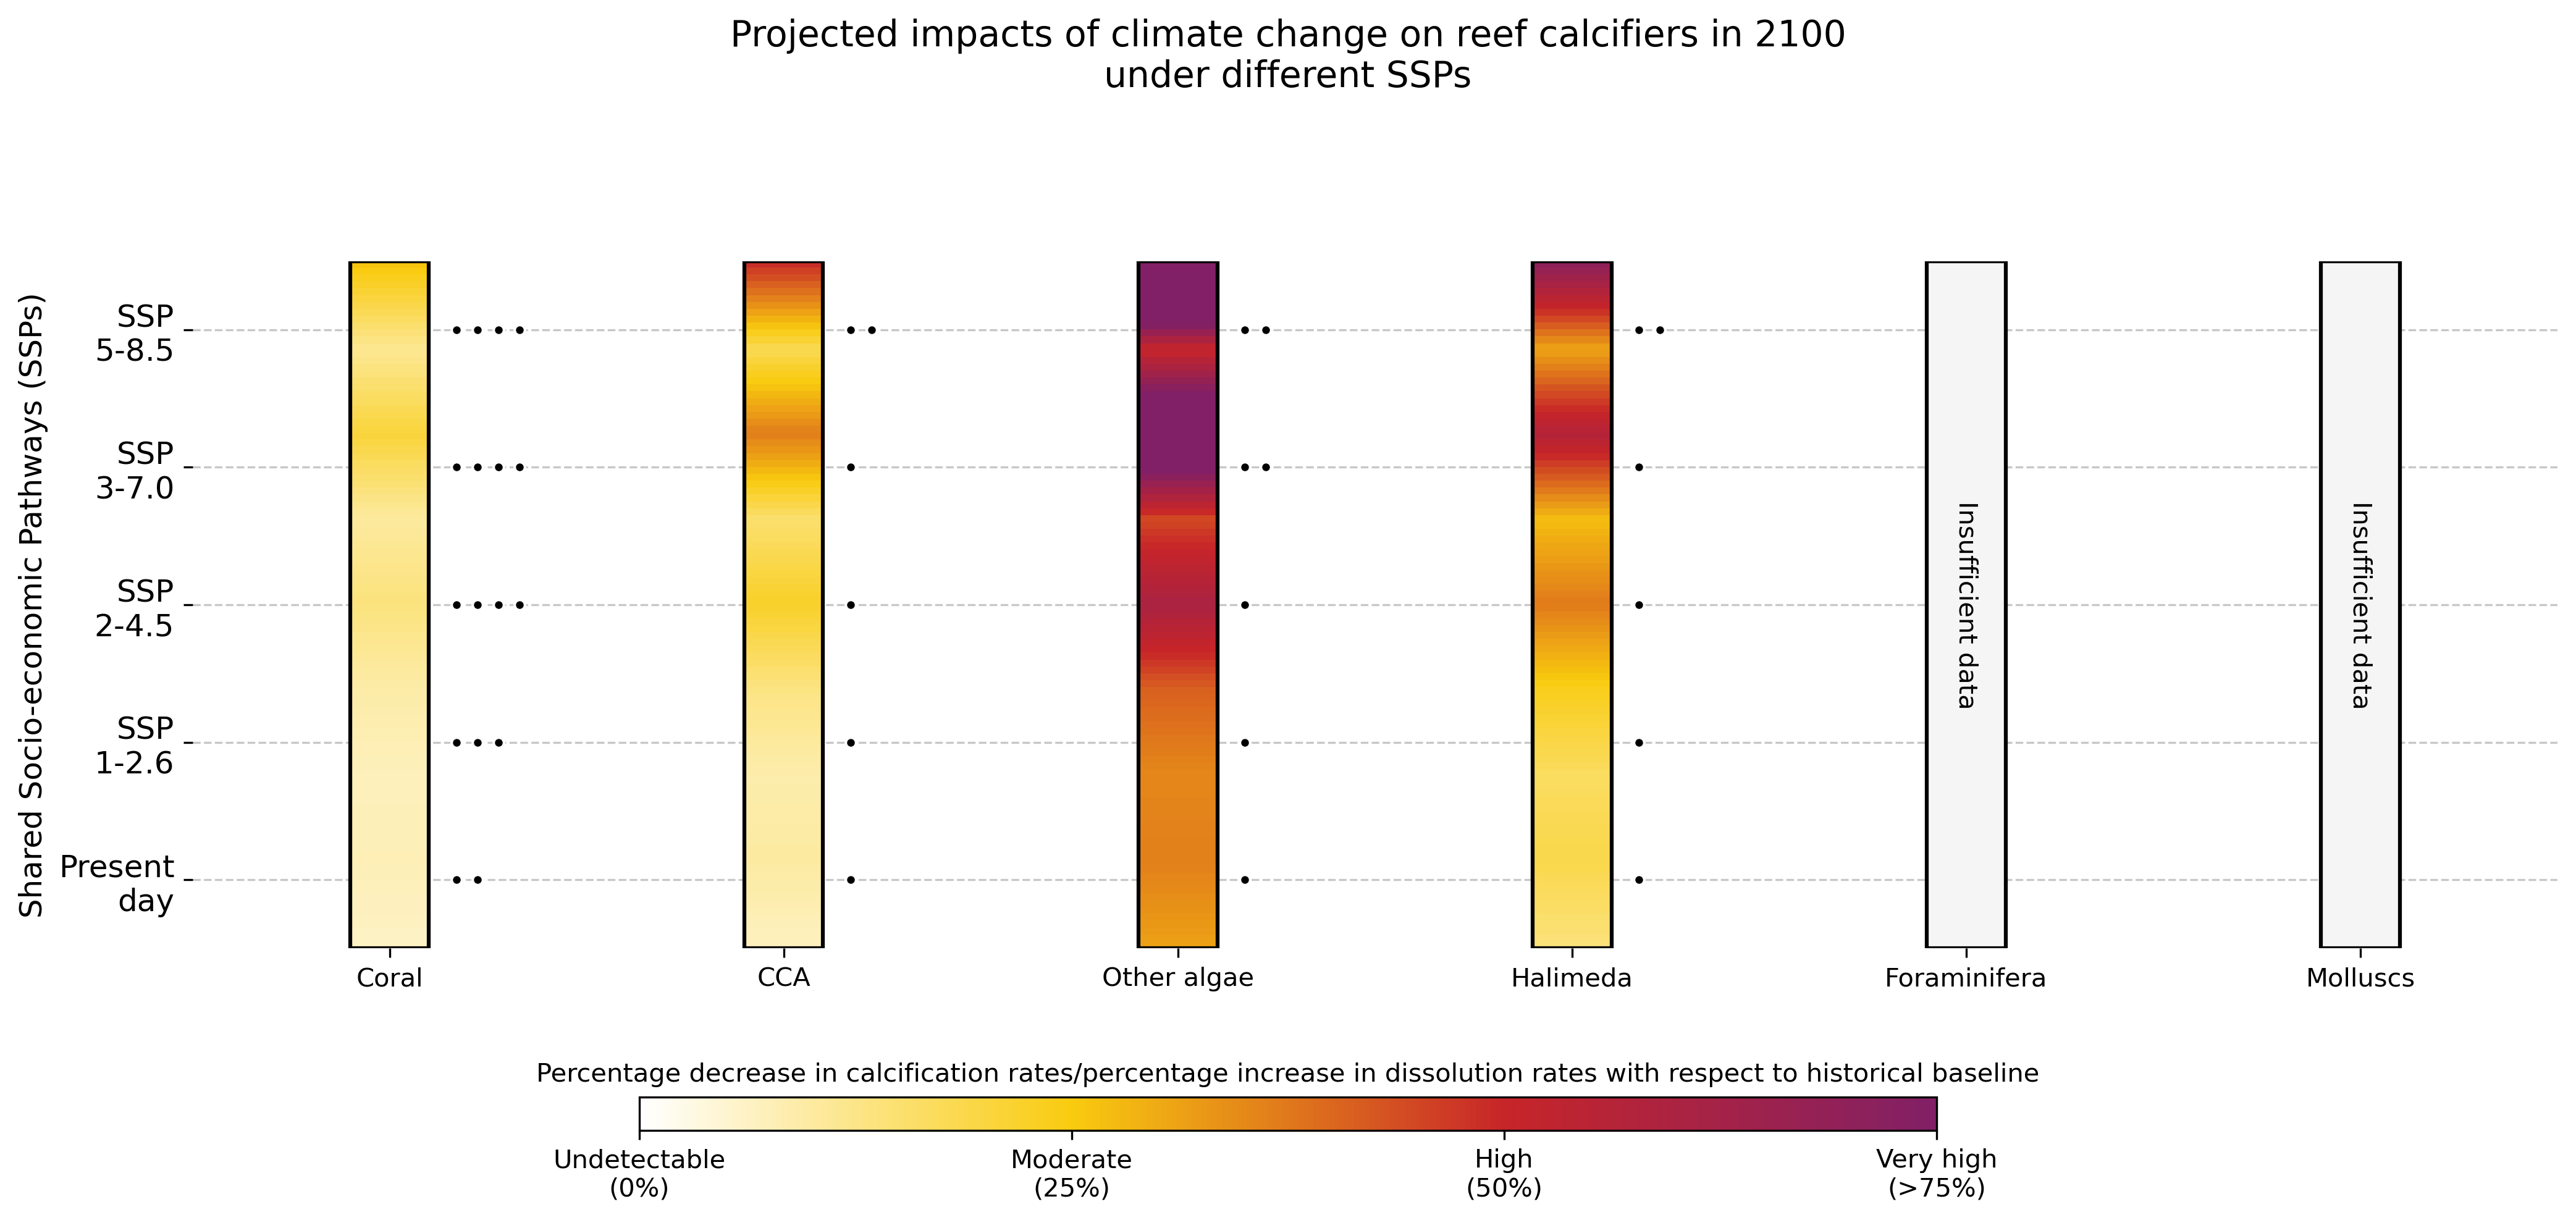

In [168]:
from calcification.plotting import plot_config

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colorbar import ColorbarBase


categories = list(plot_preds_ssp.core_grouping.unique())

scenarios = list(plot_preds_ssp.scenario.unique())
n_categories = len(categories)
n_scenarios = len(scenarios)

# create custom colormap from white → yellow → orange → red → purple
colors = ["#ffffff", "#f9cb0f", "#c72529", "#812066"][::-1]
cmap = LinearSegmentedColormap.from_list("burning_embers", colors, N=256)

cnorm = Normalize(vmin=0, vmax=-75)
n_levels = 100
# create the figure
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)
# remove the axis box
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# add horizontal grid lines behind the bars
ax.yaxis.grid(True, linestyle="--", alpha=0.7, zorder=-20)

insufficient_data_cols = ["Foraminifera", "Molluscs"]

# Draw each vertical bar, shaded by the values of pred
for i, category in enumerate(categories + insufficient_data_cols):
    if category in insufficient_data_cols:
        # plot empty grey bar
        ax.add_patch(
            plt.Rectangle(
                (i - 0.1, 0),  # Bottom-left corner
                0.2,  # Width
                n_scenarios,  # Height
                edgecolor="black",
                facecolor="whitesmoke",
                linewidth=1.5,
                alpha=1,
                zorder=10,
            )
        )
        # add text (rotated) in middle of bar saying "Insufficient data"
        ax.text(
            i,
            n_scenarios / 2,
            "Insufficient data",
            ha="center",
            va="center",
            fontsize=10,
            rotation=270,
            color="black",
            zorder=20,
        )
        continue  # Skip to next iteration

    # Filter data for this category
    category_data = plot_preds_ssp[plot_preds_ssp["core_grouping"] == category]

    if len(category_data) == 0:
        continue  # Skip if no data available for the category

    gradient_values = category_data["pred"].values
    # gradient_values = np.clip(category_data['pred'].values, -50, 0)
    print(category, gradient_values)
    # interpolate gradient values to n points
    gradient_values = np.interp(
        np.linspace(0, len(gradient_values) - 1, n_levels),
        np.arange(len(gradient_values)),
        gradient_values,
    )

    ax.imshow(
        np.atleast_2d(gradient_values[::-1]).T,  # Flip so SSP5-8.5 is at the top
        extent=(i - 0.1, i + 0.1, 0, n_scenarios),
        aspect="auto",
        cmap=cmap,
        norm=cnorm,
        alpha=1,
        zorder=10,
    )
    # Add border around bars
    ax.add_patch(
        plt.Rectangle(
            (i - 0.1, 0),  # Bottom-left corner
            0.2,  # Width
            n_scenarios,  # Height
            edgecolor="black",
            facecolor="none",
            linewidth=1.5,
            zorder=10,
        )
    )

    # Add dots for uncertainty levels
    for j, scenario in enumerate(scenarios):
        # Get certainty value for this category and scenario
        scenario_data = category_data[category_data["scenario"] == scenario]
        if not scenario_data.empty:
            certainty = scenario_data["certainty"].values[0]

            # Calculate positions for up to 4 adjacent dots
            dot_positions = np.linspace(-0.2, 0.2, 4)

            # Plot dots based on certainty level (assuming certainty is a number from 1-4)
            if not np.isnan(certainty):
                num_dots = int(certainty)
                for k in range(num_dots):
                    ax.plot(
                        i + 0.25 + (dot_positions[k] * 0.4),
                        j + 0.5,
                        "o",
                        color="black",
                        markersize=4,
                        alpha=1,
                        markeredgecolor="white",
                    )

# Format axes
ax.set_xlim(-0.5, n_categories + len(insufficient_data_cols) - 0.5)
ax.set_ylim(0, n_scenarios)  # Ensure y-axis spans all scenarios
ax.set_xticks(range(n_categories + len(insufficient_data_cols)))
ax.set_xticklabels(
    categories + insufficient_data_cols, rotation=0, ha="center", fontsize=10
)
ax.set_yticks(np.arange(n_scenarios) + 0.5)  # Center labels between scenario boundaries
ax.set_ylabel("Shared Socio-economic Pathways (SSPs)", fontsize=12)

# Set y-tick labels using your mapping
y_labels = [
    plot_config.SCENARIO_MAP.get(scenario, scenario).replace(" ", "\n")
    for scenario in scenarios
]
ax.set_yticklabels(y_labels, fontsize=12)

# cbar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
# Reverse the colormap
reversed_cmap = cmap.reversed()
cb = ColorbarBase(cax, cmap=reversed_cmap, norm=cnorm, orientation="horizontal")
cb.set_ticks(np.linspace(cnorm.vmin, cnorm.vmax, 4))
# cb.set_ticks(np.linspace(cnorm.vmax, cnorm.vmin, 4))
cb.set_ticklabels(
    ["Undetectable\n(0%)", "Moderate\n(25%)", "High\n(50%)", "Very high\n(>75%)"]
)
cax.set_title(
    "Percentage decrease in calcification rates/percentage increase in dissolution rates with respect to historical baseline",
    fontsize=10,
)

plt.suptitle(
    "Projected impacts of climate change on reef calcifiers in 2100\nunder different SSPs",
    fontsize=14,
    y=1.05,
)
plt.tight_layout(rect=[0, 0.15, 1, 0.95])  # Leave space for colorbar and title
plt.show()

### Plotting against SST

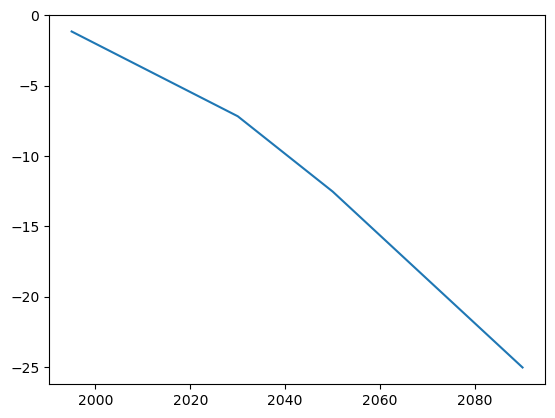

In [197]:
df = pd.concat([clim_df, coral_prediction_df], axis=1)
# select where percentile is mean and scenario is ssp126
df_sst = df[(df["percentile"] == "mean") & (df["scenario"] == "ssp585")]
plt.plot(df_sst["time_frame"], df_sst["pred"])


In [199]:
full_grid

core_grouping scenario  time_frame
0            Coral   ssp126        1995
1            Coral   ssp126        1996
2            Coral   ssp126        1997
3            Coral   ssp126        1998
4            Coral   ssp126        1999
...            ...      ...         ...
1691      Halimeda   ssp585        2096
1692      Halimeda   ssp585        2097
1693      Halimeda   ssp585        2098
1694      Halimeda   ssp585        2099
1695      Halimeda   ssp585        2100

[1696 rows x 3 columns]

In [ ]:
plot_preds_sst = climatology_processing.interpolate_and_extrapolate_predictions(
    reshaped_preds_df.copy()
)

# define new yearly range in order to get full spectrum of predictions.
new_years = np.arange(
    plot_preds_sst["time_frame"].min(), plot_preds_sst["time_frame"].max() + 1
)
new_years_df = pd.DataFrame({"time_frame": new_years})

# create all combinations of core_grouping, scenario, and year
unique_groups = plot_preds_sst[["core_grouping", "scenario"]].drop_duplicates()
full_grid = unique_groups.merge(new_years_df, how="cross")

plot_preds_sst = plot_preds_sst[plot_preds_sst.percentile == "mean"]
# merge full grid with predictions
plot_preds_sst = pd.merge(
    full_grid,
    plot_preds_sst,
    on=["core_grouping", "scenario", "time_frame"],
    how="left",
)

plot_preds_sst["anomaly_value_sst"] = plot_preds_sst.groupby(
    ["core_grouping", "scenario"]
)["anomaly_value_sst"].transform(lambda x: x.interpolate(method="quadratic"))
plot_preds_sst["pred"] = plot_preds_sst.groupby(["core_grouping", "scenario"])[
    "pred"
].transform(lambda x: x.interpolate(method="quadratic"))
plot_preds_sst["se"] = plot_preds_sst.groupby(["core_grouping", "scenario"])[
    "se"
].transform(lambda x: x.interpolate(method="quadratic"))

# sort by core_grouping and scenario
plot_preds_sst.sort_values(by=["core_grouping", "scenario"], inplace=True)

# Calculate p-scores for each prediction
plot_preds_sst["p_score"] = plot_preds_sst.apply(
    lambda row: analysis_utils.p_score(row["pred"], row["se"], null_value=0), axis=1
)
plot_preds_sst["certainty"] = plot_preds_sst["p_score"].apply(
    analysis_utils.assign_certainty
)

/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/processing/climatology.py:189: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (core_grouping, scenario, percentile), group_df in df_full.groupby(
/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_21000/2631263894.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_preds_sst["anomaly_value_sst"] = plot_preds_sst.groupby(
/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_21000/2631263894.py:27: FutureWarning: The default of observed=False is deprecated and will be 

/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_21000/1830408653.py:192: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


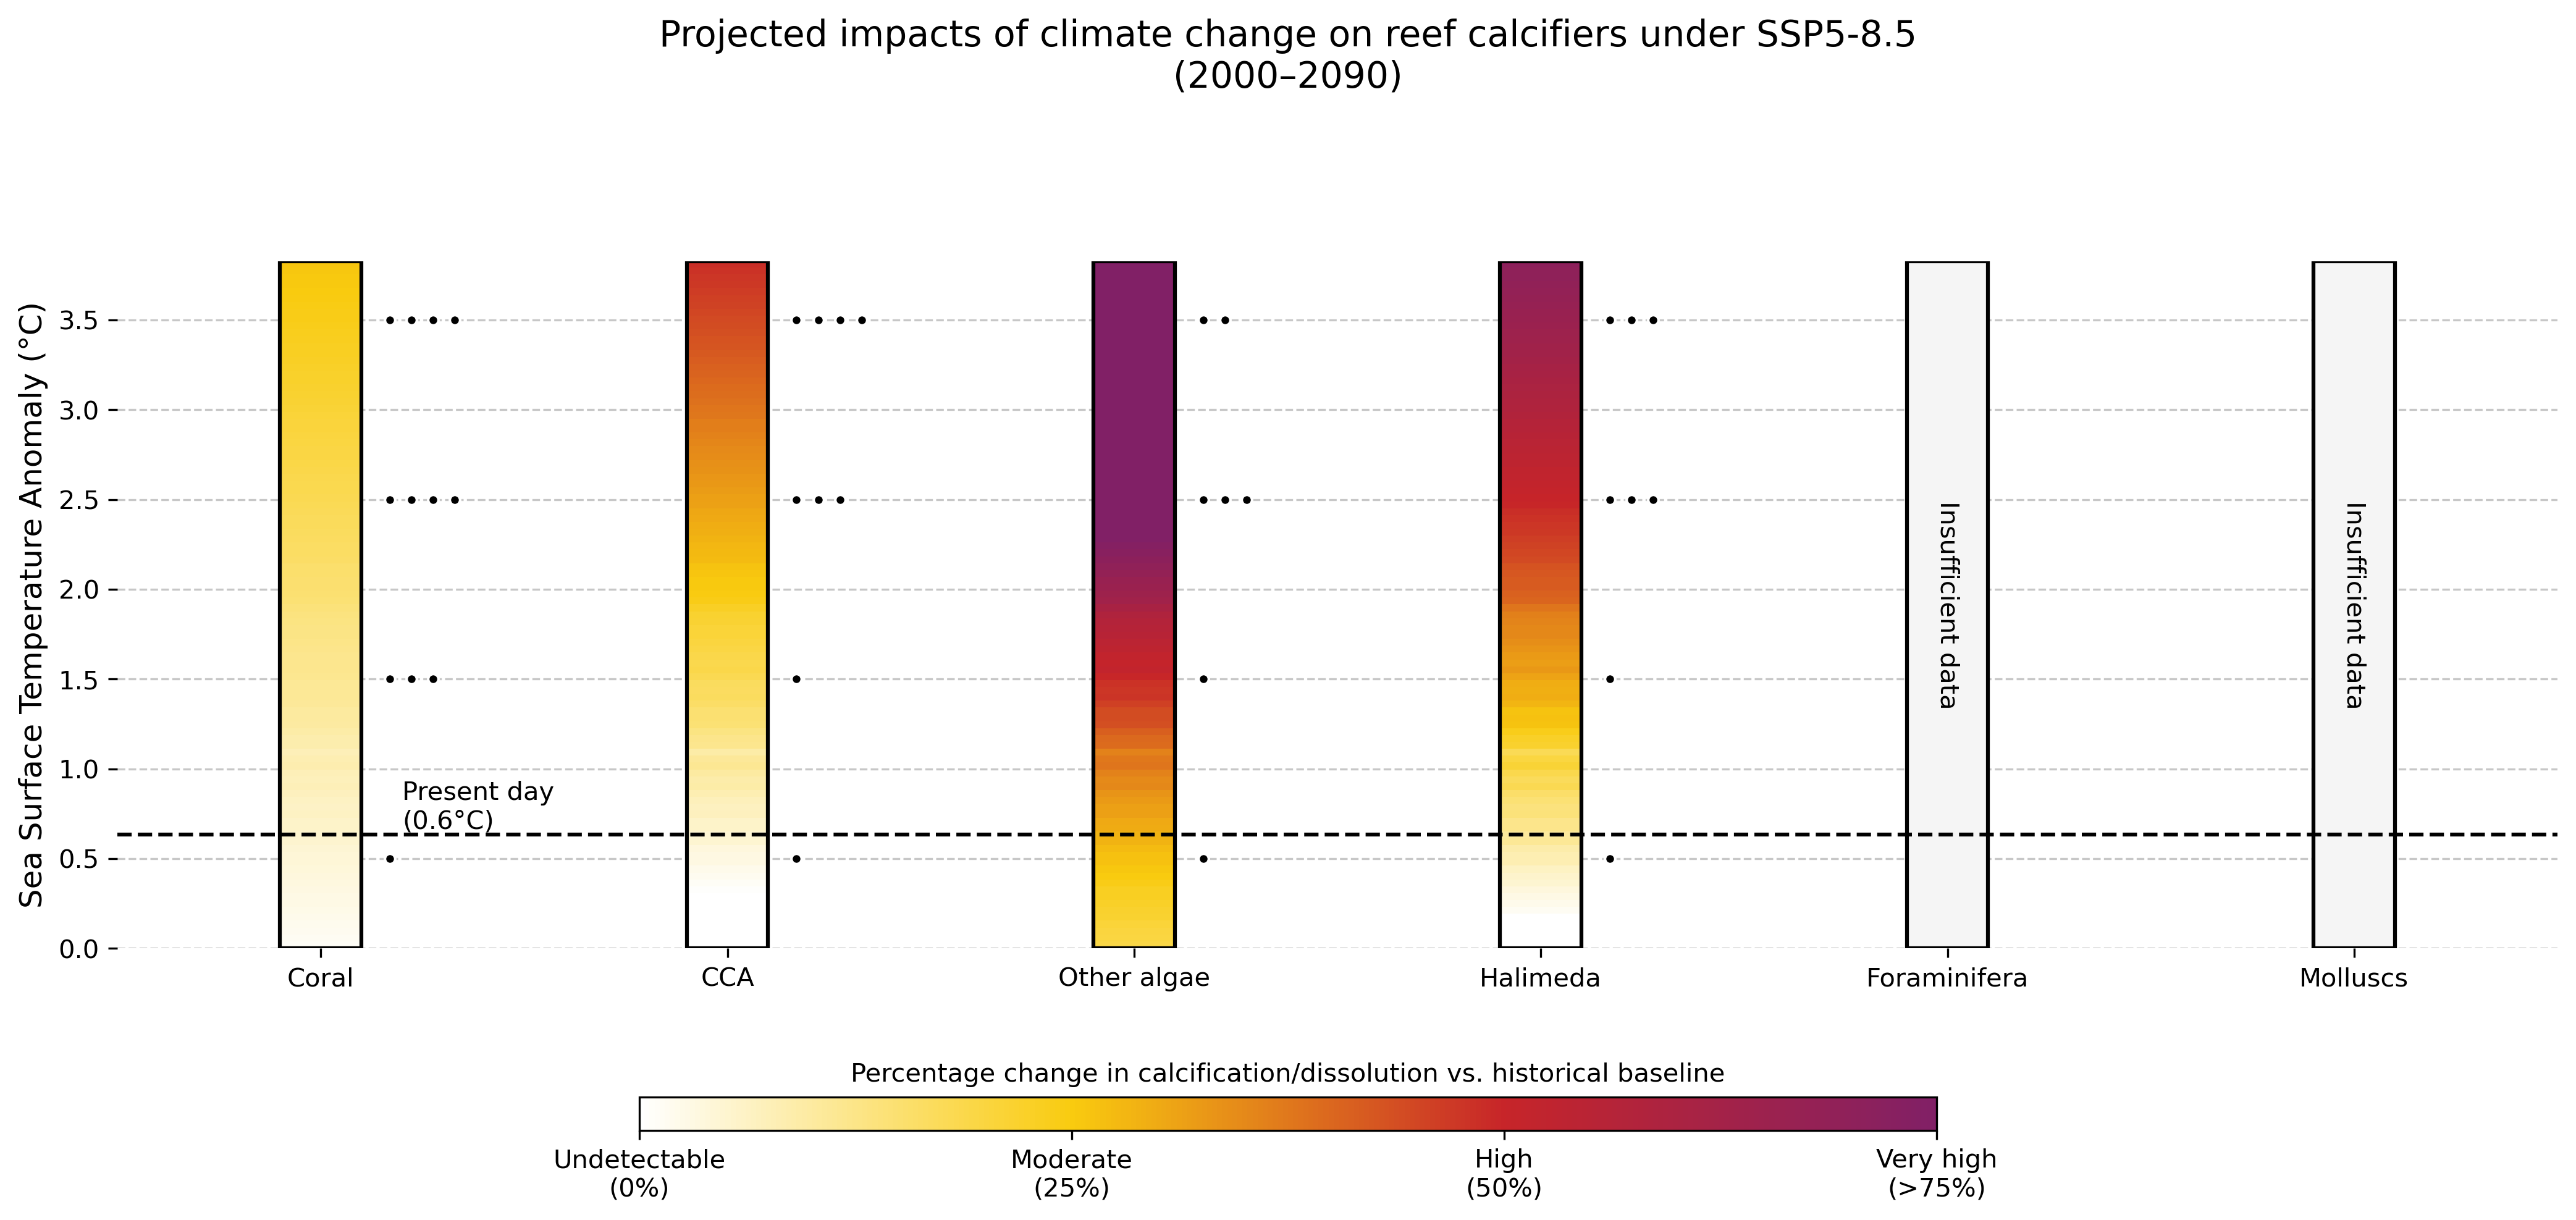

In [179]:
categories = list(plot_preds_sst.core_grouping.unique())
scenarios = list(plot_preds_sst.scenario.unique())
n_categories = len(categories)

# Create custom colormap from white → yellow → orange → red → purple
colors = ["#ffffff", "#f9cb0f", "#c72529", "#812066"][::-1]
cmap = LinearSegmentedColormap.from_list("burning_embers", colors, N=256)

cnorm = Normalize(vmin=0, vmax=-75)  # Adjust based on your pred value range
n_levels = 100

# Extract temperature values for vertical axis - FIXED to properly handle SST
anomaly_value_sst_vals = (
    plot_preds_sst[["time_frame", "anomaly_value_sst"]]
    .drop_duplicates()
    .sort_values("time_frame")
)
# anomaly_value_sst_vals = anomaly_value_sst_vals[(anomaly_value_sst_vals['time_frame'] >= 2000) & (anomaly_value_sst_vals['time_frame'] <= 2090)]

# Convert to numeric and handle any issues - IMPROVED
anomaly_value_sst_vals["anomaly_value_sst"] = pd.to_numeric(
    anomaly_value_sst_vals["anomaly_value_sst"], errors="coerce"
)
anomaly_value_sst_vals = anomaly_value_sst_vals.dropna(subset=["anomaly_value_sst"])
anomaly_value_sst_range = anomaly_value_sst_vals["anomaly_value_sst"].values
n_timeframes = len(anomaly_value_sst_range)

# Create the figure
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)

# Remove the axis box
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(True, linestyle="--", alpha=0.7, zorder=-20)

insufficient_data_cols = ["Foraminifera", "Molluscs"]

# Draw each vertical bar, shaded by the values of pred
for i, category in enumerate(categories + insufficient_data_cols):
    if category in insufficient_data_cols:
        # Plot empty grey bar
        ax.add_patch(
            plt.Rectangle(
                (i - 0.1, anomaly_value_sst_range.min()),  # Bottom-left corner
                0.2,  # Width
                anomaly_value_sst_range.max() - anomaly_value_sst_range.min(),  # Height
                edgecolor="black",
                facecolor="whitesmoke",
                linewidth=1.5,
                alpha=1,
                zorder=10,
            )
        )
        ax.text(
            i,
            (anomaly_value_sst_range.min() + anomaly_value_sst_range.max()) / 2,
            "Insufficient data",
            ha="center",
            va="center",
            fontsize=10,
            rotation=270,
            color="black",
            zorder=20,
        )
        continue

    # Filter and sort data for this category
    category_data = plot_preds_sst[
        plot_preds_sst["core_grouping"] == category
    ].sort_values("anomaly_value_sst")  # FIXED: Sort by SST not timeframe

    if len(category_data) == 0:
        continue

    # Interpolate pred values to match the number of SST levels - FIXED
    interp_preds = np.interp(
        np.linspace(
            anomaly_value_sst_range.min(), anomaly_value_sst_range.max(), n_levels
        ),
        category_data["anomaly_value_sst"].values.astype(float),
        category_data["pred"].values,
    )

    # Draw the gradient bar using imshow - FIXED to use SST range directly
    ax.imshow(
        np.atleast_2d(interp_preds).T[::-1],
        extent=(
            i - 0.1,
            i + 0.1,
            anomaly_value_sst_range.min(),
            anomaly_value_sst_range.max(),
        ),
        aspect="auto",
        cmap=cmap,
        norm=cnorm,
        alpha=1,
        zorder=10,
    )

    # Add border
    ax.add_patch(
        plt.Rectangle(
            (i - 0.1, anomaly_value_sst_range.min()),
            0.2,
            anomaly_value_sst_range.max() - anomaly_value_sst_range.min(),
            edgecolor="black",
            facecolor="none",
            linewidth=1.5,
            zorder=11,
        )
    )
    # Add dots for uncertainty levels for each 1 degree increment
    for j, sst_value in enumerate(
        np.arange(anomaly_value_sst_range.min(), anomaly_value_sst_range.max() + 1, 1)
    ):
        # Get certainty value for this category and SST value
        scenario_data = category_data.iloc[
            (category_data["anomaly_value_sst"] - sst_value).abs().argsort()[:1]
        ]
        if not scenario_data.empty:
            certainty = scenario_data["certainty"].values[0]
            # Calculate positions for up to 4 adjacent dots
            dot_positions = np.linspace(-0.2, 0.2, 4)
            if not np.isnan(certainty):
                num_dots = int(certainty)
                for k in range(num_dots):
                    ax.plot(
                        i + 0.25 + (dot_positions[k] * 0.4),
                        j + 0.5,
                        "o",
                        color="black",
                        markersize=4,
                        alpha=1,
                        markeredgecolor="white",
                    )


# Format axes
ax.set_xlim(-0.5, n_categories + len(insufficient_data_cols) - 0.5)
ax.set_ylim(anomaly_value_sst_range.min(), anomaly_value_sst_range.max())
ax.set_xticks(range(n_categories + len(insufficient_data_cols)))
ax.set_xticklabels(
    categories + insufficient_data_cols, rotation=0, ha="center", fontsize=10
)
ax.set_ylabel("Sea Surface Temperature Anomaly (°C)", fontsize=12)  # FIXED label

# Mark a horizontal line at present day (2025) - FIXED to find correct SST value
present_day_sst = plot_preds_sst[plot_preds_sst.time_frame == 2025][
    "anomaly_value_sst"
].mean()
ax.axhline(
    y=present_day_sst,
    color="black",
    linestyle="--",
    linewidth=1.5,
    label="Present day (2025)",
    zorder=20,
)
# Annotate line with text
ax.text(
    0.2,
    present_day_sst + 0.15,
    f"Present day\n({present_day_sst:.1f}°C)",
    color="black",
    fontsize=10,
    ha="left",
    va="center",
    rotation=0,
    zorder=20,
)

# Colorbar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
reversed_cmap = cmap.reversed()
cb = ColorbarBase(cax, cmap=reversed_cmap, norm=cnorm, orientation="horizontal")
cb.set_ticks(np.linspace(cnorm.vmin, cnorm.vmax, 4))
cb.set_ticklabels(
    ["Undetectable\n(0%)", "Moderate\n(25%)", "High\n(50%)", "Very high\n(>75%)"]
)
cax.set_title(
    "Percentage change in calcification/dissolution vs. historical baseline",
    fontsize=10,
)

plt.suptitle(
    "Projected impacts of climate change on reef calcifiers under SSP5-8.5\n(2000–2090)",
    fontsize=14,
    y=1.05,
)
plt.tight_layout(rect=[0, 0.15, 1, 0.95])
plt.show()

### Plotting against temperature with SSP annotation

In [ ]:
data_df.core_grouping.value_counts()

Category: Coral, Column Position: 0
Category: CCA, Column Position: 1
Category: Other algae, Column Position: 2
Category: Halimeda, Column Position: 3
Category: Foraminifera/Molluscs, Column Position: 4


/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_21000/2361628335.py:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 1])


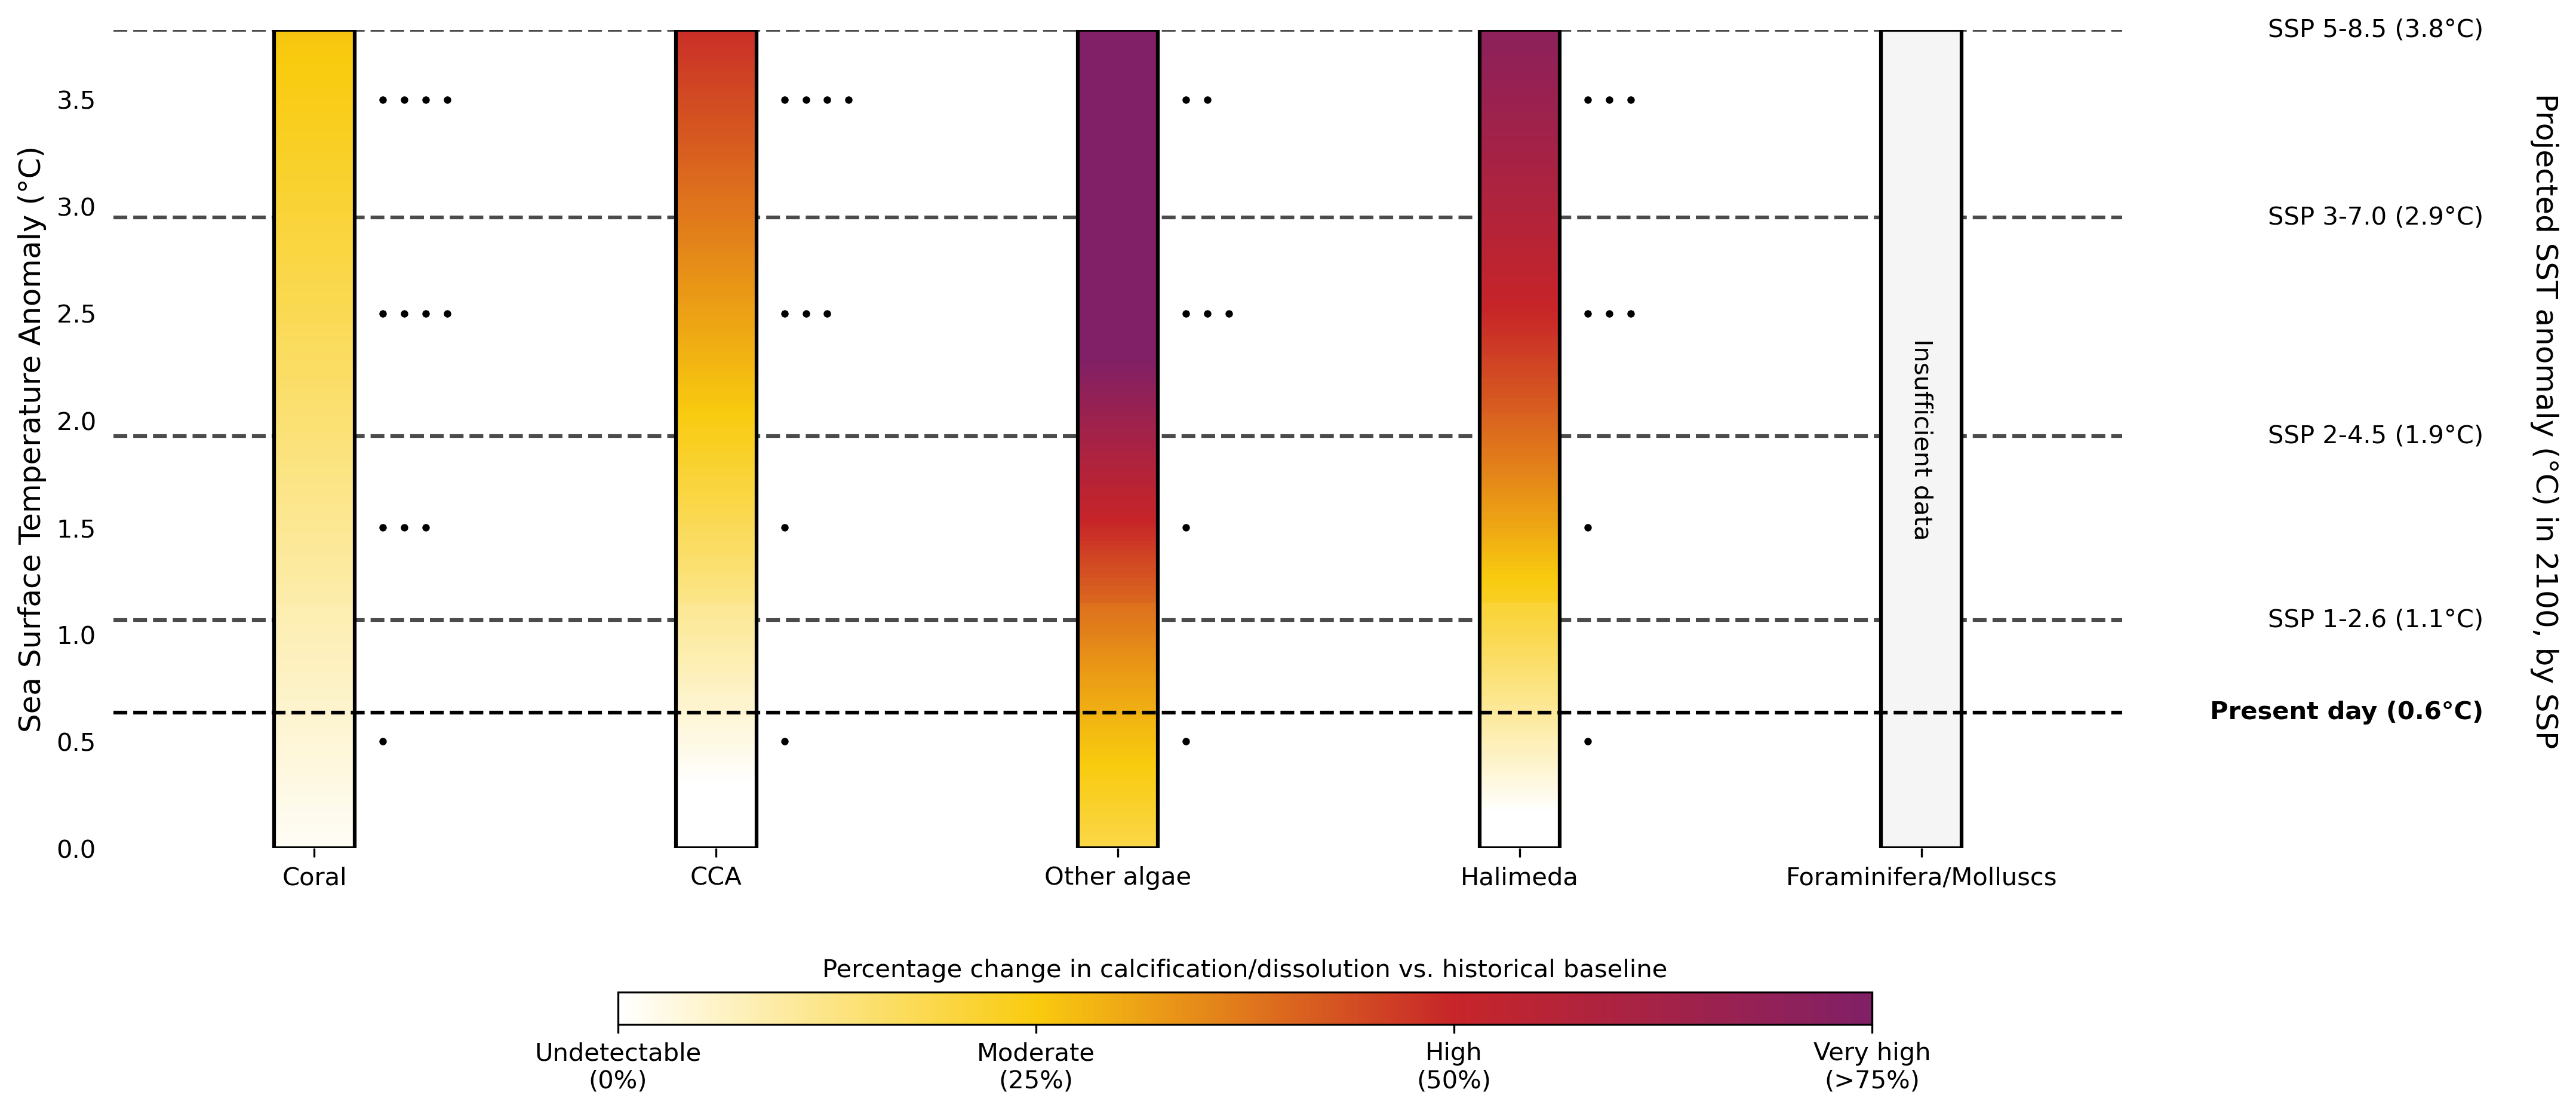

In [ ]:
plot_preds_sst = climatology_processing.interpolate_and_extrapolate_predictions(
    reshaped_preds_df.copy()
)

# define new yearly range in order to get full spectrum of predictions.
new_years = np.arange(
    plot_preds_sst["time_frame"].min(), plot_preds_sst["time_frame"].max() + 1
)
new_years_df = pd.DataFrame({"time_frame": new_years})

# create all combinations of core_grouping, scenario, and year
unique_groups = plot_preds_sst[["core_grouping", "scenario"]].drop_duplicates()
full_grid = unique_groups.merge(new_years_df, how="cross")

plot_preds_sst = plot_preds_sst[plot_preds_sst.percentile == "mean"]
# merge full grid with predictions
plot_preds_sst = pd.merge(
    full_grid,
    plot_preds_sst,
    on=["core_grouping", "scenario", "time_frame"],
    how="left",
)

plot_preds_sst["anomaly_value_sst"] = plot_preds_sst.groupby(
    ["core_grouping", "scenario"]
)["anomaly_value_sst"].transform(lambda x: x.interpolate(method="quadratic"))
plot_preds_sst["pred"] = plot_preds_sst.groupby(["core_grouping", "scenario"])[
    "pred"
].transform(lambda x: x.interpolate(method="quadratic"))
plot_preds_sst["se"] = plot_preds_sst.groupby(["core_grouping", "scenario"])[
    "se"
].transform(lambda x: x.interpolate(method="quadratic"))

# sort by core_grouping and scenario
plot_preds_sst.sort_values(by=["core_grouping", "scenario"], inplace=True)

# Calculate p-scores for each prediction
plot_preds_sst["p_score"] = plot_preds_sst.apply(
    lambda row: analysis_utils.p_score(row["pred"], row["se"], null_value=0), axis=1
)
plot_preds_sst["certainty"] = plot_preds_sst["p_score"].apply(
    analysis_utils.assign_certainty
)

categories = list(plot_preds_sst.core_grouping.unique())
scenarios = list(plot_preds_sst.scenario.unique())
n_categories = len(categories)

# Create custom colormap from white → yellow → orange → red → purple
colors = ["#ffffff", "#f9cb0f", "#c72529", "#812066"][::-1]
cmap = LinearSegmentedColormap.from_list("burning_embers", colors, N=256)

cnorm = Normalize(vmin=0, vmax=-75)  # Adjust based on your pred value range
n_levels = 200

# Extract temperature values for vertical axis
anomaly_value_sst_vals = plot_preds_sst[plot_preds_sst.scenario == "ssp585"]
# Convert to numeric and handle any issues
anomaly_value_sst_vals.loc[:, "anomaly_value_sst"] = pd.to_numeric(
    anomaly_value_sst_vals["anomaly_value_sst"], errors="coerce"
)
anomaly_value_sst_vals = anomaly_value_sst_vals.dropna(subset=["anomaly_value_sst"])
anomaly_value_sst_range = anomaly_value_sst_vals["anomaly_value_sst"].values

# Create the figure
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)

# Remove the axis box
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

insufficient_data_cols = ["Foraminifera/Molluscs"]

# Initialize column placement
col_placement = 0
gap_after_coral = 0.3  # Define the extra gap size after Coral

# First, determine indices for all columns including the gap
column_positions = []
for i, category in enumerate(categories + insufficient_data_cols):
    if (
        i > 0 and i < len(categories) and categories[i] == "Coral"
    ):  # Add gap before Coral
        col_placement += gap_after_coral

    column_positions.append(col_placement)
    col_placement += 1  # Standard spacing between columns

# Now draw each vertical bar using the precalculated positions
for i, category in enumerate(categories + insufficient_data_cols):
    col_position = column_positions[i]
    print(f"Category: {category}, Column Position: {col_position}")

    if category in insufficient_data_cols:
        # Plot empty grey bar
        ax.add_patch(
            plt.Rectangle(
                (
                    col_position - 0.1,
                    anomaly_value_sst_range.min(),
                ),  # Bottom-left corner
                0.2,  # Width
                anomaly_value_sst_range.max() - anomaly_value_sst_range.min(),  # Height
                edgecolor="black",
                facecolor="whitesmoke",
                linewidth=1.5,
                alpha=1,
                zorder=10,
            )
        )
        ax.text(
            col_position,
            (anomaly_value_sst_range.min() + anomaly_value_sst_range.max()) / 2,
            "Insufficient data",
            ha="center",
            va="center",
            fontsize=10,
            rotation=270,
            color="black",
            zorder=20,
        )
        continue

    # Filter and sort data for this category
    category_data = plot_preds_sst[plot_preds_sst["core_grouping"] == category]
    if len(category_data) == 0:
        continue

    # Interpolate pred values to match the number of SST levels
    interp_preds = np.interp(
        np.linspace(
            anomaly_value_sst_range.min(), anomaly_value_sst_range.max(), n_levels
        ),
        category_data["anomaly_value_sst"].values.astype(float),
        category_data["pred"].values,
    )

    ax.imshow(
        np.atleast_2d(interp_preds).T[::-1],
        extent=(
            col_position - 0.1,
            col_position + 0.1,
            anomaly_value_sst_range.min(),
            anomaly_value_sst_range.max(),
        ),
        aspect="auto",
        cmap=cmap,
        norm=cnorm,
        alpha=1,
        zorder=10,
    )  # gradient bar

    # Add border
    ax.add_patch(
        plt.Rectangle(
            (col_position - 0.1, anomaly_value_sst_range.min()),
            0.2,
            anomaly_value_sst_range.max() - anomaly_value_sst_range.min(),
            edgecolor="black",
            facecolor="none",
            linewidth=1.5,
            zorder=11,
        )
    )

    # Add dots for uncertainty levels for each 1 degree increment
    for j, sst_value in enumerate(
        np.arange(anomaly_value_sst_range.min(), anomaly_value_sst_range.max() + 1, 1)
    ):
        # Get certainty value for this category and SST value
        scenario_data = category_data.iloc[
            (category_data["anomaly_value_sst"] - sst_value).abs().argsort()[:1]
        ]
        if not scenario_data.empty:
            certainty = scenario_data["certainty"].values[0]
            # Calculate positions for up to 4 adjacent dots
            dot_positions = np.linspace(-0.2, 0.2, 4)
            if not np.isnan(certainty):
                num_dots = int(certainty)
                for k in range(num_dots):
                    ax.plot(
                        col_position + 0.25 + (dot_positions[k] * 0.4),
                        j + 0.5,
                        "o",
                        color="black",
                        markersize=4,
                        alpha=1,
                        markeredgecolor="white",
                    )

# Format axes - update to use the last column position
ax.set_xlim(-0.5, column_positions[-1] + 0.5)
ax.set_ylim(anomaly_value_sst_range.min(), anomaly_value_sst_range.max())
ax.set_xticks(column_positions)
ax.set_xticklabels(
    categories + insufficient_data_cols, rotation=0, ha="center", fontsize=10
)
ax.set_ylabel("Sea Surface Temperature Anomaly (°C)", fontsize=12)
# turn off y ticks (but not their labels)
ax.tick_params(
    axis="y", which="both", left=False, right=False, labelleft=True, labelright=False
)

# Mark a horizontal line at present day (2025)
present_day_sst = plot_preds_sst[plot_preds_sst.time_frame == 2025][
    "anomaly_value_sst"
].mean()
ax.axhline(
    y=present_day_sst,
    color="black",
    linestyle="--",
    linewidth=1.5,
    label="Present day (2025)",
    zorder=20,
)
# Annotate line with text
last_col_pos = column_positions[-1]
ax.text(
    last_col_pos + 1.4,
    present_day_sst,
    f"Present day ({present_day_sst:.1f}°C)",
    color="black",
    fontsize=10,
    ha="right",
    va="center",
    rotation=0,
    zorder=20,
    fontweight="bold",
)

# Colorbar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
reversed_cmap = cmap.reversed()
cb = ColorbarBase(cax, cmap=reversed_cmap, norm=cnorm, orientation="horizontal")
cb.set_ticks(np.linspace(cnorm.vmin, cnorm.vmax, 4))
cb.set_ticklabels(
    ["Undetectable\n(0%)", "Moderate\n(25%)", "High\n(50%)", "Very high\n(>75%)"]
)
cax.set_title(
    "Percentage change in calcification/dissolution vs. historical baseline",
    fontsize=10,
)

plt.tight_layout(rect=[0, 0.15, 1, 1])

### adding in SSP annotation
for ssp in plot_preds_sst.scenario.unique():
    # get sst at 2100
    ssp_df = plot_preds_sst[plot_preds_sst.scenario == ssp]
    ssp_df = ssp_df[(ssp_df.time_frame == 2100) & (ssp_df.percentile == "mean")]
    ssp_temp = ssp_df.anomaly_value_sst.mean()
    # plot horizontal line at ssp_temp
    ax.axhline(
        y=ssp_temp,
        color="black",
        linestyle="--",
        linewidth=1.5,
        label=f"{ssp} (2100)",
        zorder=-20,
        alpha=0.7,
    )
    # Annotate line with text
    ax.text(
        last_col_pos + 1.4,
        ssp_temp,
        f"{plot_config.SCENARIO_MAP[ssp]} ({ssp_temp:.1f}°C)",
        color="black",
        fontsize=10,
        ha="right",
        va="center",
        rotation=0,
        zorder=20,
    )

# add second vertical axis annotation
ax.text(
    last_col_pos + 1.55,
    2,
    "Projected SST anomaly (°C) in 2100, by SSP",
    color="black",
    fontsize=12,
    ha="center",
    va="center",
    rotation=270,
    zorder=20,
)

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
plt.show()

### Plot against atmospheric CO2

#### Emissions data

In [170]:
emissions_fp = (
    config.climatology_data_dir / "SUPPLEMENT_DataTables_Meinshausen_6May2020.xlsx"
)
scenario_names = [
    scenario_name.replace(" ", "")
    for scenario_name in list(plot_config.SCENARIO_MAP.values())
]
emissions_data = climatology_processing.get_emissions_data_from_file(
    config.climatology_data_dir / "SUPPLEMENT_DataTables_Meinshausen_6May2020.xlsx",
    scenario_names,
)

In [205]:
emissions_data

year    SSP1-2.6    SSP2-4.5     SSP3-7.0     SSP5-8.5
203  1950  312.820984  312.820984   312.820984   312.820984
204  1951  313.013977  313.013977   313.013977   313.013977
205  1952   313.34198   313.34198    313.34198    313.34198
206  1953   313.72998   313.72998    313.72998    313.72998
207  1954  314.094971  314.094971   314.094971   314.094971
..    ...         ...         ...          ...          ...
131  2146  412.714996  623.984985  1210.889893  1696.479858
132  2147  412.287994  624.550964  1217.089966  1706.819946
133  2148  411.877991  625.119019   1223.22998  1717.079956
134  2149  411.485016  625.687012  1229.299927  1727.239868
135  2150  411.109009  626.257019  1235.319946  1737.319946

[201 rows x 5 columns]

In [ ]:
plot_preds_585 = climatology_processing.interpolate_and_extrapolate_predictions(
    reshaped_preds_df.copy()
)
plot_preds_585

/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/processing/climatology.py:189: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (core_grouping, scenario, percentile), group_df in df_full.groupby(


core_grouping scenario percentile  time_frame  anomaly_value_ph  \
0            Coral   ssp126       mean        1995          0.000000   
1            Coral   ssp126       mean        1996         -0.002192   
2            Coral   ssp126       mean        1997         -0.004365   
3            Coral   ssp126       mean        1998         -0.006519   
4            Coral   ssp126       mean        1999         -0.008654   
...            ...      ...        ...         ...               ...   
1691      Halimeda   ssp585       mean        2096         -0.408084   
1692      Halimeda   ssp585       mean        2097         -0.414698   
1693      Halimeda   ssp585       mean        2098         -0.421359   
1694      Halimeda   ssp585       mean        2099         -0.428066   
1695      Halimeda   ssp585       mean        2100         -0.434819   

      anomaly_value_sst       ci.lb     ci.ub       pi.lb      pi.ub  \
0              0.000000   -9.458443  7.152968  -59.184361  56.878886   
1              0.026179   -9.590502  6.910102  -59.364364  56.683963   
2              0.052072   -9.721441  6.670095  -59.542503  56.491156   
3              0.077680   -9.851259  6.432947  -59.718777  56.300465   
4              0.103003   -9.979956  6.198659  -59.893186  56.111889   
...                 ...         ...       ...         ...        ...   
1691           3.613250 -138.556047 -9.739768 -210.993058  62.697243   
1692           3.666356 -140.826102 -9.215172 -212.344887  62.303612   
1693           3.719781 -143.129614 -8.656633 -213.707755  61.921508   
1694           3.773525 -145.466581 -8.064150 -215.081662  61.550931   
1695           3.827589 -147.837004 -7.437722 -216.466607  61.191881   

           pred         se  
0     -1.152737   4.237683  
1     -1.340200   4.209415  
2     -1.525673   4.181591  
3     -1.709156   4.154211  
4     -1.890649   4.127274  
...         ...        ...  
1691 -74.147907  32.861900  
1692 -75.020637  33.574834  
1693 -75.893123  34.304962  
1694 -76.765365  35.052285  
1695 -77.637363  35.816801  

[1696 rows x 12 columns]

/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_21000/1372133179.py:217: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.15, 1, 0.95])


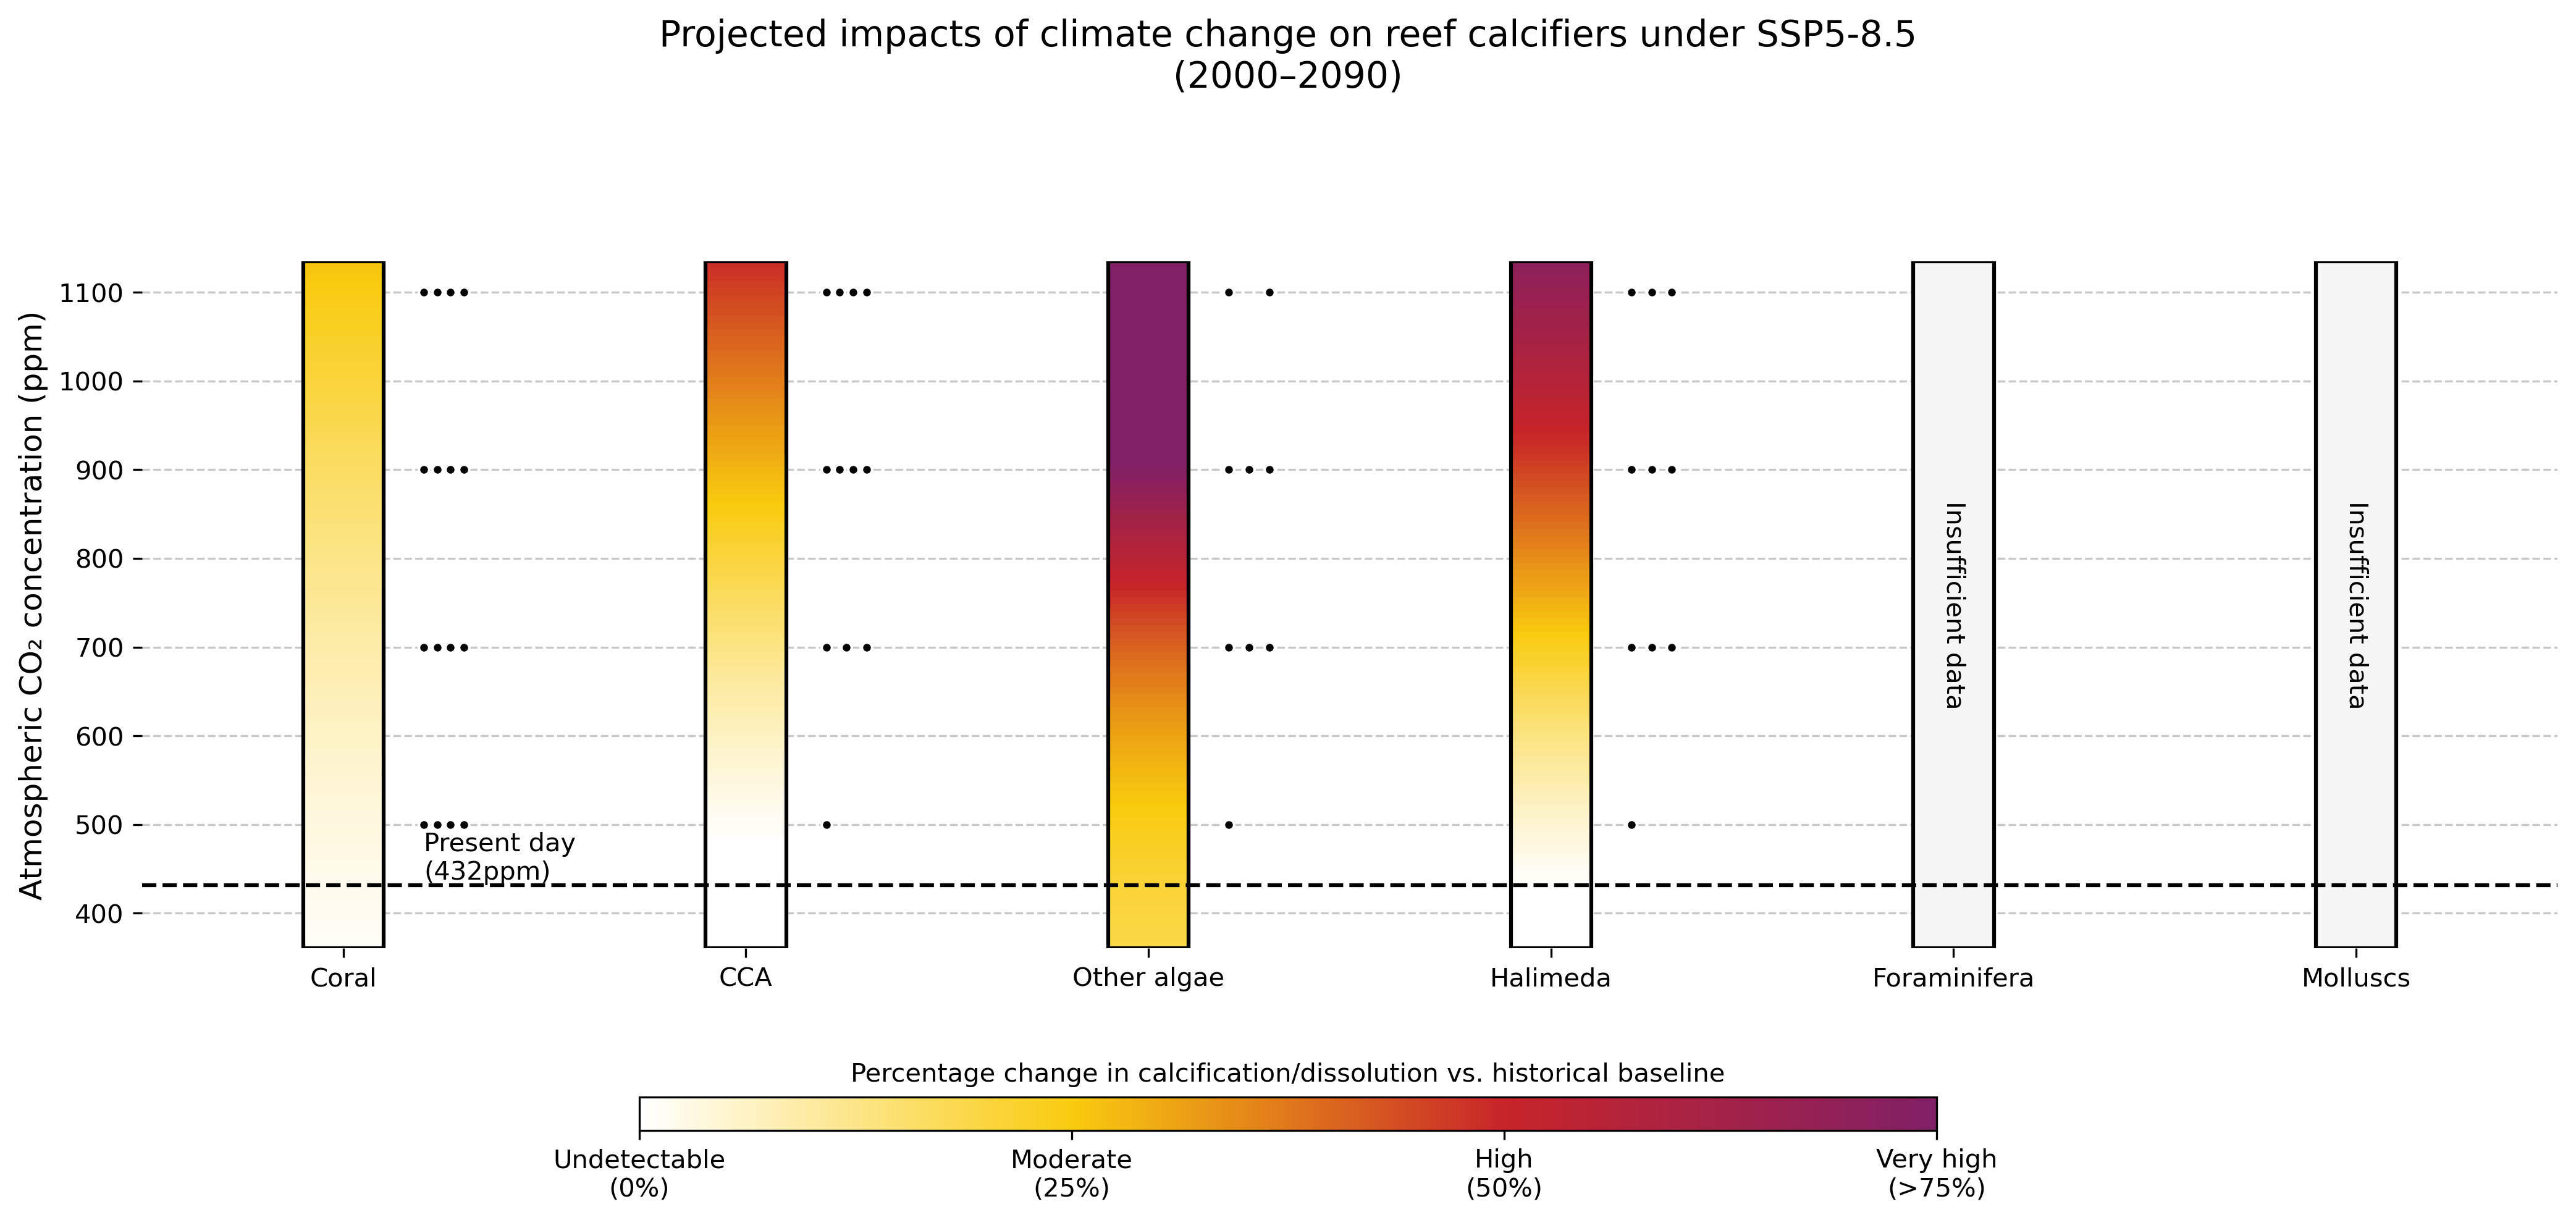

In [297]:
plot_preds_585 = climatology_processing.interpolate_and_extrapolate_predictions(
    reshaped_preds_df.copy()
)
plot_preds_585 = plot_preds_585[plot_preds_585.scenario == "ssp585"]
# Rename emissions for consistency
emissions_585 = emissions_data[["year", "SSP5-8.5"]].rename(columns={"SSP5-8.5": "co2"})

# Merge co2 into predictions
emissions_predictions = pd.merge(
    plot_preds_585, emissions_585, left_on="time_frame", right_on="year", how="left"
)
emissions_predictions.drop(
    columns="year", inplace=True
)  # drop extra year column if needed
emissions_predictions.sort_values(by="core_grouping", inplace=True)


# calculate p-scores
emissions_predictions["p_score"] = emissions_predictions.apply(
    lambda row: analysis_utils.p_score(row["pred"], row["se"], null_value=0), axis=1
)
emissions_predictions["certainty"] = emissions_predictions["p_score"].apply(
    analysis_utils.assign_certainty
)

# Setup
categories = list(emissions_predictions.core_grouping.unique())
scenarios = list(emissions_predictions.scenario.unique())
n_categories = len(categories)

# Create custom colormap from white → yellow → orange → red → purple
colors = ["#ffffff", "#f9cb0f", "#c72529", "#812066"][::-1]
cmap = LinearSegmentedColormap.from_list("burning_embers", colors, N=256)

cnorm = Normalize(vmin=0, vmax=-75)  # Adjust based on your pred value range
n_levels = 100

# Extract CO₂ values for the vertical axis
co2_vals = (
    emissions_predictions[["time_frame", "co2"]]
    .drop_duplicates()
    .sort_values("time_frame")
)
co2_vals = co2_vals["co2"].astype(float, errors="ignore")
n_timeframes = len(co2_vals)

# Create the figure
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)

# Remove the axis box
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(True, linestyle="--", alpha=0.7, zorder=-20)

insufficient_data_cols = ["Foraminifera", "Molluscs"]

# Draw each vertical bar, shaded by the values of pred
for i, category in enumerate(categories + insufficient_data_cols):
    if category in insufficient_data_cols:
        # Plot empty grey bar
        ax.add_patch(
            plt.Rectangle(
                (i - 0.1, co2_vals.min()),  # Bottom-left corner
                0.2,  # Width
                co2_vals.max() - co2_vals.min(),  # Height
                edgecolor="black",
                facecolor="whitesmoke",
                linewidth=1.5,
                alpha=1,
                zorder=10,
            )
        )
        ax.text(
            i,
            (co2_vals.min() + co2_vals.max()) / 2,
            "Insufficient data",
            ha="center",
            va="center",
            fontsize=10,
            rotation=270,
            color="black",
            zorder=20,
        )
        continue

    # Filter and sort data for this category
    category_data = emissions_predictions[
        emissions_predictions["core_grouping"] == category
    ].sort_values("time_frame")

    if len(category_data) == 0:
        continue

    # Interpolate pred values to match the number of co2 levels
    interp_preds = np.interp(
        np.linspace(0, len(category_data) - 1, n_levels),
        np.arange(len(category_data)),
        category_data["pred"].values,
    )

    # Interpolate co2 to match gradient height
    interp_co2 = np.interp(
        np.linspace(0, len(category_data) - 1, n_levels),
        np.arange(len(category_data)),
        category_data["co2"].values.astype(float),
    )

    # Draw the gradient bar using imshow
    ax.imshow(
        np.atleast_2d(interp_preds[::-1]).T,  # flip so early years at bottom
        extent=(i - 0.1, i + 0.1, interp_co2.min(), interp_co2.max()),
        aspect="auto",
        cmap=cmap,
        norm=cnorm,
        alpha=1,
        zorder=10,
    )

    # Add border
    ax.add_patch(
        plt.Rectangle(
            (i - 0.1, interp_co2.min()),
            0.2,
            interp_co2.max() - interp_co2.min(),
            edgecolor="black",
            facecolor="none",
            linewidth=1.5,
            zorder=11,
        )
    )

    # Add dots for uncertainty levels for each 200 ppm increment
    for co2_level in np.arange(300, co2_vals.max() + 200, 200):
        # Find the closest data point for the current CO₂ level
        closest_data = category_data.iloc[
            (category_data["co2"] - co2_level).abs().argsort()[:1]
        ]
        if not closest_data.empty:
            certainty = closest_data["certainty"].values[0]
            if not np.isnan(certainty):
                # Calculate positions for up to 4 adjacent dots
                dot_positions = np.linspace(-0.05, 0.05, int(certainty))
                for dot_pos in dot_positions:
                    ax.plot(
                        i + 0.25 + dot_pos,
                        co2_level,
                        "o",
                        color="black",
                        markersize=4,
                        alpha=1,
                        markeredgecolor="white",
                    )
            else:
                print(
                    f"Certainty is NaN for category: {category}, CO₂ level: {co2_level}"
                )
        else:
            print(
                f"No closest data found for category: {category}, CO₂ level: {co2_level}"
            )

# Format axes
ax.set_xlim(-0.5, n_categories + len(insufficient_data_cols) - 0.5)
ax.set_ylim(co2_vals.min(), co2_vals.max())
ax.set_xticks(range(n_categories + len(insufficient_data_cols)))
ax.set_xticklabels(
    categories + insufficient_data_cols, rotation=0, ha="center", fontsize=10
)
ax.set_ylabel("Atmospheric CO₂ concentration (ppm)", fontsize=12)

# mark a horizontal line at present day (2025)
present_day_index = np.where(
    co2_vals
    == emissions_predictions[emissions_predictions.time_frame == 2025].co2.iloc[0]
)[0][0]
ax.axhline(
    y=co2_vals.iloc[present_day_index],
    color="black",
    linestyle="--",
    linewidth=1.5,
    label="Present day (2025)",
    zorder=20,
)
# annotate line with text
ax.text(
    0.2,
    co2_vals.iloc[present_day_index] + 30,
    f"Present day\n({co2_vals.iloc[present_day_index]:.0f}ppm)",
    color="black",
    fontsize=10,
    ha="left",
    va="center",
    rotation=0,
    zorder=20,
)

# Colorbar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
reversed_cmap = cmap.reversed()
cb = ColorbarBase(cax, cmap=reversed_cmap, norm=cnorm, orientation="horizontal")
cb.set_ticks(np.linspace(cnorm.vmin, cnorm.vmax, 4))
cb.set_ticklabels(
    ["Undetectable\n(0%)", "Moderate\n(25%)", "High\n(50%)", "Very high\n(>75%)"]
)
cax.set_title(
    "Percentage change in calcification/dissolution vs. historical baseline",
    fontsize=10,
)

plt.suptitle(
    "Projected impacts of climate change on reef calcifiers under SSP5-8.5\n(2000–2090)",
    fontsize=14,
    y=1.05,
)
plt.tight_layout(rect=[0, 0.15, 1, 0.95])
plt.show()


In [249]:
reshaped_preds_df


metric scenario  time_frame percentile  anomaly_value_ph  anomaly_value_sst  \
1        ssp126        1995       mean          0.000000           0.000000   
5        ssp126        1995        p10         -0.014973          -0.775318   
9        ssp126        1995        p90          0.016695           0.841371   
13       ssp126        2030       mean         -0.065376           0.746557   
17       ssp126        2030        p10         -0.068670           0.510103   
..          ...         ...        ...               ...                ...   
174      ssp585        2050        p10         -0.159908           1.128145   
178      ssp585        2050        p90         -0.148260           1.955172   
182      ssp585        2090       mean         -0.369377           3.301326   
186      ssp585        2090        p10         -0.379987           2.497992   
190      ssp585        2090        p90         -0.359845           4.085569   

metric core_grouping       ci.lb      ci.ub       pi.lb      pi.ub       pred  \
1              Coral   -9.458443   7.152968  -59.184361  56.878886  -1.152737   
5              Coral   -7.994427  10.049508  -57.110919  59.166000   1.027540   
9              Coral  -11.276706   4.101459  -61.534207  54.358960  -3.587624   
13             Coral  -13.413734   0.354045  -64.375090  51.315402  -6.529844   
17             Coral  -12.842449   1.153536  -63.703393  52.014479  -5.844457   
..               ...         ...        ...         ...        ...        ...   
174         Halimeda  -68.043465   4.943881 -158.533778  95.434194 -31.549792   
178         Halimeda  -73.919330   1.056574 -163.704671  90.841915 -36.431378   
182         Halimeda -125.638291 -12.174514 -203.113898  65.301092 -68.906403   
186         Halimeda -113.823546 -20.908416 -197.563715  62.831752 -67.365981   
190         Halimeda -137.937586  -3.685565 -209.732581  68.109430 -70.811575   

metric         se  
1        4.237683  
5        4.603129  
9        3.923073  
13       3.512253  
17       3.570470  
..            ...  
174     18.619563  
178     19.126858  
182     28.945373  
186     23.703275  
190     34.248594  

[192 rows x 12 columns]

In [296]:
reshaped_preds_df


metric scenario  time_frame percentile  anomaly_value_ph  anomaly_value_sst  \
1        ssp126        1995       mean          0.000000           0.000000   
5        ssp126        1995        p10         -0.014973          -0.775318   
9        ssp126        1995        p90          0.016695           0.841371   
13       ssp126        2030       mean         -0.065376           0.746557   
17       ssp126        2030        p10         -0.068670           0.510103   
..          ...         ...        ...               ...                ...   
174      ssp585        2050        p10         -0.159908           1.128145   
178      ssp585        2050        p90         -0.148260           1.955172   
182      ssp585        2090       mean         -0.369377           3.301326   
186      ssp585        2090        p10         -0.379987           2.497992   
190      ssp585        2090        p90         -0.359845           4.085569   

metric core_grouping       ci.lb      ci.ub       pi.lb      pi.ub       pred  \
1              Coral   -9.458443   7.152968  -59.184361  56.878886  -1.152737   
5              Coral   -7.994427  10.049508  -57.110919  59.166000   1.027540   
9              Coral  -11.276706   4.101459  -61.534207  54.358960  -3.587624   
13             Coral  -13.413734   0.354045  -64.375090  51.315402  -6.529844   
17             Coral  -12.842449   1.153536  -63.703393  52.014479  -5.844457   
..               ...         ...        ...         ...        ...        ...   
174         Halimeda  -68.043465   4.943881 -158.533778  95.434194 -31.549792   
178         Halimeda  -73.919330   1.056574 -163.704671  90.841915 -36.431378   
182         Halimeda -125.638291 -12.174514 -203.113898  65.301092 -68.906403   
186         Halimeda -113.823546 -20.908416 -197.563715  62.831752 -67.365981   
190         Halimeda -137.937586  -3.685565 -209.732581  68.109430 -70.811575   

metric         se  
1        4.237683  
5        4.603129  
9        3.923073  
13       3.512253  
17       3.570470  
..            ...  
174     18.619563  
178     19.126858  
182     28.945373  
186     23.703275  
190     34.248594  

[192 rows x 12 columns]

In [301]:
analysis_plot.BurningEmbersPlotter(reshaped_preds_df).plot()

/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/plotting/analysis.py:1440: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.yaxis.grid(True, linestyle="--", alpha=0.7, zorder=-20)
/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/plotting/analysis.py:1458: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  def _get_number_of_bars(self, categories):


(<Figure size 4200x1800 with 2 Axes>, <Axes: ylabel='SST anomaly (°C)'>)

Error in callback <function _draw_all_if_interactive at 0x3347728e0> (for post_execute), with arguments args (),kwargs {}:


ValueError: minvalue must be less than or equal to maxvalue

ValueError: minvalue must be less than or equal to maxvalue

<Figure size 4200x1800 with 2 Axes>